

# Carga de base de datos y Limpieza

Instalar paquetes y librerias

In [ ]:
import pandas as pd

In [ ]:
!python --version


Python 3.12.11


In [ ]:
!pip freeze > requirements.txt


1.Promedio diario de residuos sólidos urbanos recolectados por estado de la Republica Mexicana

In [ ]:
df_residuos_edo = pd.read_excel("1.Promedio diario de residuos sólidos urbanos recolectados Edo.xlsx")
edo_nombre = df_residuos_edo['Estado'].unique()
df_residuos_edo = df_residuos_edo[df_residuos_edo['Año'] == 2020]
df_historico_residuos = pd.read_excel("1.Promedio diario de residuos sólidos urbanos recolectados Edo.xlsx")
df_residuos_edo.head()

Año                Estado  \
160  2020        Aguascalientes   
161  2020       Baja California   
162  2020   Baja California Sur   
163  2020              Campeche   
164  2020  Coahuila de Zaragoza   

     Promedio diario de residuos sólidos urbanos recolectados  
160                                            1022718         
161                                            3264039         
162                                            1105823         
163                                             601994         
164                                            2628920

2. Poblacion Economicamente Activa por Estado de la Republica Mexicana

In [ ]:
df_pea = pd.read_csv('2.pea.csv', encoding='latin-1')
#Eliminar filas vacias
df_pea = df_pea.dropna(how='all')
#Estandarizar nombre de columnas
df_pea = df_pea.rename(columns={'estado':"Estado"})
#Insertar columna con el anio de la informacion
df_pea['Año'] = 2020
#Agrupar informacion por Estado
df_municipios = df_pea[df_pea['id_municipio']!=0]
pea_edo = df_municipios.groupby('Estado')[['pea']].sum().reset_index()
pea_edo['Año'] = 2020
#Nuevo dataframe para pea pea_edo
#Ver el nombre de los estados para estandarizar
pea_edo.head()



Estado      pea   Año
0       Aguascalientes   706930  2020
1      Baja California  2010898  2020
2  Baja California Sur   427280  2020
3                 CDMX  5099957  2020
4             Campeche   462607  2020

3. Grado de educacion por estado de la republica

In [ ]:
df_educacion = pd.read_csv('3. educacion 2020.csv', encoding='latin-1')
df_educacion = df_educacion.rename(columns={'estado':"Estado"})
df_educacion = df_educacion.groupby('Estado')[['grado_escolar']].sum().reset_index()
df_educacion['Año'] = 2020
df_educacion.head()


Estado  grado_escolar   Año
0       Aguascalientes          10.35  2020
1      Baja California          10.20  2020
2  Baja California Sur          10.34  2020
3                 CDMX          11.48  2020
4             Campeche           9.63  2020

4. Indice de desarrollo humano por entidad de la republica

In [ ]:
df_idh = pd.read_csv('4. indice desarrollo humano 2020.csv', encoding='latin-1')
df_idh = df_idh.rename(columns={'estado':"Estado"})
df_idh['Año'] = 2020
df_idh_edo = df_idh.groupby('Estado')[['idh']].mean().reset_index()
df_idh_edo['Año'] = 2020
edo_nombre = df_idh_edo['Estado'].unique()
df_idh_edo.head()

Estado     idh   Año
0       Aguascalientes  0.7930  2020
1      Baja California  0.7930  2020
2  Baja California Sur  0.7655  2020
3                 CDMX  0.8170  2020
4             Campeche  0.7530  2020

5. PIB por entidad de la republica Mexicana

In [ ]:
df_pib = pd.read_excel("5. PIBE_2.xlsx")
columnas_fechas = [col for col in df_pib.columns if col != 'Estado']
df_pib = pd.melt(df_pib,
                 id_vars=['Estado'],
                 value_vars=columnas_fechas,
                 var_name='Año',
                 value_name='PIB'
                 )
df_pib = df_pib[df_pib['Año'] == 2020]
df_pib['Estado'] = df_pib['Estado'].str.lstrip()
edo_nombre = df_pib['Estado'].unique()
df_pib.head()

Estado   Año         PIB
544        Aguascalientes  2020  204820.383
545       Baja California  2020  554008.043
546   Baja California Sur  2020  121901.971
547              Campeche  2020  481969.908
548  Coahuila de Zaragoza  2020  535908.391

6. Poblacion y Edad por entidad federativa

In [ ]:
df_poblacion = pd.read_excel("6. poblacion edad 2020.xlsx")
df_poblacion = df_poblacion.groupby('Estado')[['Poblacion']].sum().reset_index()
df_poblacion['Año'] = 2020
df_poblacion.head()

Estado  Poblacion   Año
0       Aguascalientes  1,425,607  2020
1      Baja California  3,769,020  2020
2  Baja California Sur    798,447  2020
3             Campeche    928,363  2020
4              Chiapas  5,543,828  2020

7. Vivienda por entidad federativa

In [ ]:
df_vivienda = pd.read_csv("7. vivienda 2020.csv", encoding='latin-1')
df_vivienda = df_vivienda.rename(columns={'estado':"Estado"})
df_vivienda = df_vivienda.groupby('Estado')[['tot_viv_hab']].sum().reset_index()
df_vivienda['Año'] = 2020
df_vivienda.head()

Estado  tot_viv_hab   Año
0       Aguascalientes       386671  2020
1      Baja California      1149563  2020
2  Baja California Sur       240660  2020
3                 CDMX      2757433  2020
4             Campeche       260824  2020

8. Disponibilidad del servicio de recolección de residuos sólidos urbanos por Estado (info tambien disponible por municipio)

In [ ]:
df_disp_reco = pd.read_excel("8. disponibilidad del servicio de recolección de residuos sólidos urbanos.xlsx")
df_disp_reco = df_disp_reco.rename(columns={'Entidad Federativa':"Estado"})
df_disp_reco = df_disp_reco.rename(columns={'Municipio/\nDemarcación territorial':"Municipio"})
df_disp_reco = df_disp_reco.rename(columns={'Con servicio\nde recolección\nde residuos\nsólidos urbanos':"Con servicios de recoleccion residuos solidos urbanos"})
df_disp_reco = df_disp_reco.rename(columns={'Sin servicio\nde recolección\nde residuos\nsólidos urbanos':"Sin servicios de recoleccion residuos solidos urbanos"})
df_disp_reco = df_disp_reco.rename(columns={'No \nespecificado':"Servicios de Recoleccion:No especificado"})
df_disp_reco = df_disp_reco.groupby('Estado')[['Con servicios de recoleccion residuos solidos urbanos','Sin servicios de recoleccion residuos solidos urbanos','Servicios de Recoleccion:No especificado']].sum().reset_index()
df_disp_reco['Año'] = 2020
df_disp_reco.head()

Estado  Con servicios de recoleccion residuos solidos urbanos  \
0       Aguascalientes                                                 11       
1      Baja California                                                  6       
2  Baja California Sur                                                  5       
3             Campeche                                                 11       
4              Chiapas                                                122       

   Sin servicios de recoleccion residuos solidos urbanos  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  2       

   Servicios de Recoleccion:No especificado   Año  
0                                         0  2020  
1                                         0  2020  
2                                         0  2020  
3                                         1  2020  
4                                         0  2020

9. Promedio diario de residuos sólidos urbanos recolectados según sistema de recolección

In [ ]:
df_sist_reco = pd.read_excel("9. Promedio diario de residuos sólidos urbanos recolectados según sistema de recolección.xlsx")
df_sist_reco = df_sist_reco.rename(columns={'Entidad Federativa':"Estado"})
df_sist_reco = df_sist_reco.rename(columns={'Municipio/\nDemarcación territorial':"Municipio"})
df_sist_reco = df_sist_reco.rename(columns={'Cantidad\npromedio diaria\nde residuos\nsólidos urbanos\nrecolectados':"Cantidad promedio diaria de residuos solidos urbanos recolectados"})
df_sist_reco = df_sist_reco.rename(columns={'Sistema de recolección Casa\npor casa':"Sistema de recoleccion casa por casa"})
df_sist_reco = df_sist_reco.rename(columns={'Sistema de recolección En un punto\nde recolección\nestablecido':"Sistema de recoleccion En un punto de recoleccion"})
df_sist_reco = df_sist_reco.rename(columns={'Sistema de recolección Sistema de \ncontenedores':"Sistema de recoleccion Sistema de contenedores"})
columnas = ['Cantidad promedio diaria de residuos solidos urbanos recolectados','Sistema de recoleccion casa por casa','Sistema de recoleccion En un punto de recoleccion','Sistema de recoleccion Sistema de contenedores']
df_sist_reco[columnas] = df_sist_reco[columnas].apply(pd.to_numeric, errors='coerce')
df_sist_reco = df_sist_reco.groupby('Estado')[['Cantidad promedio diaria de residuos solidos urbanos recolectados','Sistema de recoleccion casa por casa','Sistema de recoleccion En un punto de recoleccion','Sistema de recoleccion Sistema de contenedores']].sum().reset_index()
df_sist_reco['Año'] = 2020
df_sist_reco.head()

Estado  \
0       Aguascalientes   
1      Baja California   
2  Baja California Sur   
3             Campeche   
4              Chiapas   

   Cantidad promedio diaria de residuos solidos urbanos recolectados  \
0                                          1022718.0                   
1                                          3264039.0                   
2                                          1105823.0                   
3                                           601994.0                   
4                                          3186689.0                   

   Sistema de recoleccion casa por casa  \
0                               7640.00   
1                            3085192.22   
2                            1065238.54   
3                             492471.70   
4                             369482.00   

   Sistema de recoleccion En un punto de recoleccion  \
0                                           14630.00   
1                                           79618.00   
2                                           29094.46   
3                                           93823.50   
4                                         2283900.25   

   Sistema de recoleccion Sistema de contenedores   Año  
0                                      1000448.00  2020  
1                                        99228.78  2020  
2                                        11490.00  2020  
3                                        15698.80  2020  
4                                       533306.75  2020

10. Vehículos utilizados en la recolección de residuos sólidos urbanos 2020


In [ ]:
df_vehiculos = pd.read_excel("10. Vehículos utilizados en la recolección de residuos sólidos urbanos.xlsx")
df_vehiculos = df_vehiculos.rename(columns={'Total':"Total Vehiculos"})
df_vehiculos = df_vehiculos.rename(columns={'Otro':"Vehiculos: Otro"})
columnas = ['Total Vehiculos','Vehículo con compactador','Vehículo con caja abierta','Vehiculos: Otro']
df_vehiculos[columnas] = df_vehiculos[columnas].apply(pd.to_numeric, errors='coerce')
df_vehiculos = df_vehiculos.groupby('Estado')[['Total Vehiculos','Vehículo con compactador','Vehículo con caja abierta','Vehiculos: Otro']].sum().reset_index()
df_vehiculos['Año'] = 2020
df_vehiculos.head()

Estado  Total Vehiculos  Vehículo con compactador  \
0       Aguascalientes            106.0                      85.0   
1      Baja California            488.0                     382.0   
2  Baja California Sur            151.0                      92.0   
3             Campeche             48.0                      36.0   
4              Chiapas            400.0                     221.0   

   Vehículo con caja abierta  Vehiculos: Otro   Año  
0                       13.0              8.0  2020  
1                       60.0             46.0  2020  
2                       47.0             12.0  2020  
3                       10.0              2.0  2020  
4                      172.0              7.0  2020

11. Municipios y demarcaciones territoriales que operan centros de acopio de materiales reciclables y número de centros según tipo de retribución a cambio de los materiales

In [ ]:
df_centro_reciclaje = pd.read_excel("11. Municipios operan centros de acopio de materiales reciclables y número de centros según tipo de retribución a cambio de los materiales.xlsx")
df_centro_reciclaje = df_centro_reciclaje.rename(columns={'Entidad Federativa':"Estado"})
df_centro_reciclaje = df_centro_reciclaje.rename(columns={'Municipio/\nDemarcación territorial':"Municipio"})
df_centro_reciclaje = df_centro_reciclaje.rename(columns={'Municipios o\ndemarcaciones\nterritoriales\nque operan\ncentros\nde acopio':"Municipios que operan centros de acopio"})
df_centro_reciclaje = df_centro_reciclaje.rename(columns={'Centros\nde acopio':"Cantidad Centros de acopio"})
columnas = ['Municipios que operan centros de acopio','Cantidad Centros de acopio']
df_centro_reciclaje[columnas] = df_centro_reciclaje[columnas].apply(pd.to_numeric, errors='coerce')
df_centro_reciclaje = df_centro_reciclaje.groupby('Estado')[['Municipios que operan centros de acopio','Cantidad Centros de acopio']].sum().reset_index()
df_centro_reciclaje['Año'] = 2020
df_centro_reciclaje.head()

Estado  Municipios que operan centros de acopio  \
0       Aguascalientes                                      1.0   
1      Baja California                                      0.0   
2  Baja California Sur                                      1.0   
3             Campeche                                      0.0   
4              Chiapas                                      1.0   

   Cantidad Centros de acopio   Año  
0                        10.0  2020  
1                         0.0  2020  
2                         2.0  2020  
3                         0.0  2020  
4                         1.0  2020

12. Municipios y demarcaciones territoriales que operan centros de acopio de materiales reciclables y promedio diario de materiales recibidos según tipo de material

In [ ]:
df_mat_rec = pd.read_excel("12. centros de acopio de materiales reciclables y promedio diario de materiales recibidos.xlsx")
df_mat_rec = df_mat_rec.rename(columns={'Papel y cartón Kg':"Prom Diario Mat Rec recibidos:Papel y cartón Kg"})
df_mat_rec = df_mat_rec.rename(columns={'PET Kg':"Prom Diario Mat Rec recibidos:PET Kg"})
df_mat_rec = df_mat_rec.rename(columns={'Otros plásticos Kg':"Prom Diario Mat Rec recibidos:Otros plásticos Kg"})
df_mat_rec = df_mat_rec.rename(columns={'Aluminio Kg':"Prom Diario Mat Rec recibidos:Aluminio Kg"})
df_mat_rec = df_mat_rec.rename(columns={'Fierro, lámina, acero Kg':"Prom Diario Mat Rec recibidos:Fierro, lámina, acero Kg"})
df_mat_rec = df_mat_rec.rename(columns={'Cobre, bronce, plomo Kg':"Prom Diario Mat Rec recibidos:Cobre, bronce, plomo Kg"})
df_mat_rec = df_mat_rec.rename(columns={'Vidrio Kg':"Prom Diario Mat Rec recibidos:Vidrio Kg"})
df_mat_rec = df_mat_rec.rename(columns={'Eléctricos y electrónicos Kg':"Prom Diario Mat Rec recibidos:Eléctricos y electrónicos Kg"})
df_mat_rec = df_mat_rec.rename(columns={'Pilas y baterías Kg':"Prom Diario Mat Rec recibidos: Pilas y baterías Kg"})
df_mat_rec = df_mat_rec.rename(columns={'Llantas Kg':"Prom Diario Mat Rec recibidos:Llantas Kg"})
df_mat_rec = df_mat_rec.rename(columns={'Otro Kg':"Prom Diario Mat Rec recibidos:Otro Kg"})
columnas = ['Municipios o demarcaciones territoriales que operan centros de acopio','Centros de acopio ','Cantidad promedio diaria de materiales reciclables recibidos (kilogramos)','Prom Diario Mat Rec recibidos:Papel y cartón Kg','Prom Diario Mat Rec recibidos:PET Kg','Prom Diario Mat Rec recibidos:Otros plásticos Kg','Prom Diario Mat Rec recibidos:Aluminio Kg','Prom Diario Mat Rec recibidos:Fierro, lámina, acero Kg','Prom Diario Mat Rec recibidos:Cobre, bronce, plomo Kg','Prom Diario Mat Rec recibidos:Vidrio Kg','Prom Diario Mat Rec recibidos:Eléctricos y electrónicos Kg','Prom Diario Mat Rec recibidos: Pilas y baterías Kg','Prom Diario Mat Rec recibidos:Llantas Kg','Prom Diario Mat Rec recibidos:Otro Kg']
df_mat_rec[columnas] = df_mat_rec[columnas].apply(pd.to_numeric, errors='coerce')
df_mat_rec = df_mat_rec.groupby('Estado')[['Cantidad promedio diaria de materiales reciclables recibidos (kilogramos)','Prom Diario Mat Rec recibidos:Papel y cartón Kg','Prom Diario Mat Rec recibidos:PET Kg','Prom Diario Mat Rec recibidos:Otros plásticos Kg','Prom Diario Mat Rec recibidos:Aluminio Kg','Prom Diario Mat Rec recibidos:Fierro, lámina, acero Kg','Prom Diario Mat Rec recibidos:Cobre, bronce, plomo Kg','Prom Diario Mat Rec recibidos:Vidrio Kg','Prom Diario Mat Rec recibidos:Eléctricos y electrónicos Kg','Prom Diario Mat Rec recibidos: Pilas y baterías Kg','Prom Diario Mat Rec recibidos:Llantas Kg','Prom Diario Mat Rec recibidos:Otro Kg']].sum().reset_index()
df_mat_rec['Año'] = 2020
df_mat_rec.head()

Estado  \
0       Aguascalientes   
1      Baja California   
2  Baja California Sur   
3             Campeche   
4              Chiapas   

   Cantidad promedio diaria de materiales reciclables recibidos (kilogramos)  \
0                                             1039.0                           
1                                                0.0                           
2                                              113.0                           
3                                                0.0                           
4                                              108.0                           

   Prom Diario Mat Rec recibidos:Papel y cartón Kg  \
0                                            450.0   
1                                              0.0   
2                                             20.0   
3                                              0.0   
4                                             10.0   

   Prom Diario Mat Rec recibidos:PET Kg  \
0                                  60.0   
1                                   0.0   
2                                  26.0   
3                                   0.0   
4                                  30.0   

   Prom Diario Mat Rec recibidos:Otros plásticos Kg  \
0                                             120.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   Prom Diario Mat Rec recibidos:Aluminio Kg  \
0                                        5.0   
1                                        0.0   
2                                        2.0   
3                                        0.0   
4                                        0.0   

   Prom Diario Mat Rec recibidos:Fierro, lámina, acero Kg  \
0                                               38.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   Prom Diario Mat Rec recibidos:Cobre, bronce, plomo Kg  \
0                                                1.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   Prom Diario Mat Rec recibidos:Vidrio Kg  \
0                                     80.0   
1                                      0.0   
2                                     20.0   
3                                      0.0   
4                                      0.0   

   Prom Diario Mat Rec recibidos:Eléctricos y electrónicos Kg  \
0                                              260.0            
1                                                0.0            
2                                               40.0            
3                                                0.0            
4                                                0.0            

   Prom Diario Mat Rec recibidos: Pilas y baterías Kg  \
0                                                0.0    
1                                                0.0    
2                                                3.0    
3                                                0.0    
4                                                8.0    

   Prom Diario Mat Rec recibidos:Llantas Kg  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Prom Diario Mat Rec recibidos:Otro Kg   Año  
0                                   25.0  2020  
1                                    0.0  2020  
2    

13. Promedio diario de residuos sólidos urbanos recolectados de manera selectiva, por municipio o demarcación territorial según destino y tipo de residuo

In [ ]:
df_res_sel = pd.read_excel("13. Promedio diario de residuos sólidos urbanos recolectados de manera selectiva.xlsx")
columnas= ['Cantidad promedio diaria de residuos recolectados de manera selectiva','Destino: Estación de transferencia Orgánicos','Destino: Estación de transferencia Inorgánicos','Destino: Planta de tratamiento Orgánicos','Destino: Planta de tratamiento Inorgánicos','Destino: Venta o donación Orgánicos','Destino: Venta o donación Inorgánicos','Destino: Sitio de disposición final Orgánicos','Destino: Sitio de disposición final Inorgánicos','Destino: Otro destino Orgánicos','Destino: Otro destino Inorgánicos','Destino: No especificado']
df_res_sel[columnas] = df_res_sel[columnas].apply(pd.to_numeric, errors='coerce')
df_res_sel = df_res_sel.groupby('Estado')[['Cantidad promedio diaria de residuos recolectados de manera selectiva','Destino: Estación de transferencia Orgánicos','Destino: Estación de transferencia Inorgánicos','Destino: Planta de tratamiento Orgánicos','Destino: Planta de tratamiento Inorgánicos','Destino: Venta o donación Orgánicos','Destino: Venta o donación Inorgánicos','Destino: Sitio de disposición final Orgánicos','Destino: Sitio de disposición final Inorgánicos','Destino: Otro destino Orgánicos','Destino: Otro destino Inorgánicos','Destino: No especificado']].sum().reset_index()
df_res_sel['Año'] = 2020
df_res_sel.head()

Estado  \
0       Aguascalientes   
1      Baja California   
2  Baja California Sur   
3             Campeche   
4              Chiapas   

   Cantidad promedio diaria de residuos recolectados de manera selectiva  \
0                                               76.0                       
1                                                0.0                       
2                                                0.0                       
3                                                0.0                       
4                                            50250.0                       

   Destino: Estación de transferencia Orgánicos  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Destino: Estación de transferencia Inorgánicos  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Destino: Planta de tratamiento Orgánicos  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Destino: Planta de tratamiento Inorgánicos  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Destino: Venta o donación Orgánicos  Destino: Venta o donación Inorgánicos  \
0                                  0.0                                   76.0   
1                                  0.0                                    0.0   
2                                  0.0                                    0.0   
3                                  0.0                                    0.0   
4                               3000.0                                    0.0   

   Destino: Sitio de disposición final Orgánicos  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                        22100.0   

   Destino: Sitio de disposición final Inorgánicos  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                          25150.0   

   Destino: Otro destino Orgánicos  Destino: Otro destino Inorgánicos  \
0                              0.0                                0.0   
1                              0.0                                0.0   
2                              0.0                                0.0   
3                              0.0                                0.0   
4                              0.0                                0.0   

   Destino: No especificado   Año  
0                       0.0  2020  
1                       0.0  2020  
2                       0.0  2020  
3                       0.0  2020  
4                       0.0  2020

14. Municipios y demarcaciones territoriales que envían residuos a estaciones de transferencia y número de estaciones, según funciones de la estación

In [ ]:
df_est_fun = pd.read_excel("14. estaciones de transferencia y funcion.xlsx")
columnas = ['Municipios o demarcaciones territoriales que envían residuos a estaciones de  transferencia','Estaciones de transferencia','Funcion Est transf: Sólo trasvase','Funcion Est transf: Selección o separación','Funcion Est transf: Compactación','Funcion Est transf: Almacenamiento temporal','Funcion Est transf: Trituración','Funcion Est transf: Otra']
df_est_fun[columnas] = df_est_fun[columnas].apply(pd.to_numeric, errors='coerce')
df_est_fun = df_est_fun.groupby('Estado')[['Municipios o demarcaciones territoriales que envían residuos a estaciones de  transferencia','Estaciones de transferencia','Funcion Est transf: Sólo trasvase','Funcion Est transf: Selección o separación','Funcion Est transf: Compactación','Funcion Est transf: Almacenamiento temporal','Funcion Est transf: Trituración','Funcion Est transf: Otra']].sum().reset_index()
df_est_fun['Año'] = 2020
df_est_fun.head()

Estado  \
0       Aguascalientes   
1      Baja California   
2  Baja California Sur   
3             Campeche   
4              Chiapas   

   Municipios o demarcaciones territoriales que envían residuos a estaciones de  transferencia  \
0                                                7.0                                             
1                                                4.0                                             
2                                                0.0                                             
3                                                0.0                                             
4                                                4.0                                             

   Estaciones de transferencia  Funcion Est transf: Sólo trasvase  \
0                          5.0                                1.0   
1                          6.0                                5.0   
2                          0.0                                0.0   
3                          0.0                                0.0   
4                          5.0                                0.0   

   Funcion Est transf: Selección o separación  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         5.0   

   Funcion Est transf: Compactación  \
0                               2.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   

   Funcion Est transf: Almacenamiento temporal  \
0                                          2.0   
1                                          1.0   
2                                          0.0   
3                                          0.0   
4                                          4.0   

   Funcion Est transf: Trituración  Funcion Est transf: Otra   Año  
0                              0.0                       0.0  2020  
1                              0.0                       0.0  2020  
2                              0.0                       0.0  2020  
3                              0.0                       0.0  2020  
4                              0.0                       0.0  2020

15. Estaciones de transferencia con separación de residuos sólidos urbanos y promedio diario de materiales clasificados, por municipio o demarcación territorial según tipo de material

In [ ]:
df_sep_res = pd.read_excel("15. Estaciones de transferencia con separación de RSU materiales clasificados.xlsx")
df_sep_res = df_sep_res.rename(columns={'Entidad Federativa':"Estado"})
columnas = ['Estaciones de transferencia con separación de residuos','Cantidad promedio diaria de materiales clasificados (kilogramos)','Prom Dia Mat Clas:Papel y cartón Kg','Prom Dia Mat Clas:PET Kg','Prom Dia Mat Clas:Otros plásticos Kg','Prom Dia Mat Clas:Aluminio Kg','Prom Dia Mat Clas:Fierro, lámina, acero Kg','Prom Dia Mat Clas:Cobre, bronce, plomo Kg','Prom Dia Mat Clas:Vidrio Kg','Prom Dia Mat Clas:Eléctricos y electrónicos Kg','Prom Dia Mat Clas:Materia orgánica Kg','Prom Dia Mat Clas:Otro material Kg']
df_sep_res[columnas] = df_sep_res[columnas].apply(pd.to_numeric, errors='coerce')
df_sep_res = df_sep_res.groupby('Estado')[['Estaciones de transferencia con separación de residuos','Cantidad promedio diaria de materiales clasificados (kilogramos)','Prom Dia Mat Clas:Papel y cartón Kg','Prom Dia Mat Clas:PET Kg','Prom Dia Mat Clas:Otros plásticos Kg','Prom Dia Mat Clas:Aluminio Kg','Prom Dia Mat Clas:Fierro, lámina, acero Kg','Prom Dia Mat Clas:Cobre, bronce, plomo Kg','Prom Dia Mat Clas:Vidrio Kg','Prom Dia Mat Clas:Eléctricos y electrónicos Kg','Prom Dia Mat Clas:Materia orgánica Kg','Prom Dia Mat Clas:Otro material Kg']].sum().reset_index()
df_sep_res['Año'] = 2020
df_sep_res.head()

Estado  \
0       Aguascalientes   
1      Baja California   
2  Baja California Sur   
3             Campeche   
4              Chiapas   

   Estaciones de transferencia con separación de residuos  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                5.0        

   Cantidad promedio diaria de materiales clasificados (kilogramos)  \
0                                                0.0                  
1                                                0.0                  
2                                                0.0                  
3                                                0.0                  
4                                              699.0                  

   Prom Dia Mat Clas:Papel y cartón Kg  Prom Dia Mat Clas:PET Kg  \
0                                  0.0                       0.0   
1                                  0.0                       0.0   
2                                  0.0                       0.0   
3                                  0.0                       0.0   
4                                191.0                     251.0   

   Prom Dia Mat Clas:Otros plásticos Kg  Prom Dia Mat Clas:Aluminio Kg  \
0                                   0.0                            0.0   
1                                   0.0                            0.0   
2                                   0.0                            0.0   
3                                   0.0                            0.0   
4                                 120.0                           15.0   

   Prom Dia Mat Clas:Fierro, lámina, acero Kg  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                        76.0   

   Prom Dia Mat Clas:Cobre, bronce, plomo Kg  Prom Dia Mat Clas:Vidrio Kg  \
0                                        0.0                          0.0   
1                                        0.0                          0.0   
2                                        0.0                          0.0   
3                                        0.0                          0.0   
4                                       10.0                         26.0   

   Prom Dia Mat Clas:Eléctricos y electrónicos Kg  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                            10.0   

   Prom Dia Mat Clas:Materia orgánica Kg  Prom Dia Mat Clas:Otro material Kg  \
0                                    0.0                                 0.0   
1                                    0.0                                 0.0   
2                                    0.0                                 0.0   
3                                    0.0                                 0.0   
4                                    0.0                                 0.0   

    Año  
0  2020  
1  2020  
2  2020  
3  2020  
4  2020

16. Estaciones de transferencia de residuos sólidos urbanos, por municipio o demarcación territorial según régimen de gestión

In [ ]:
df_est_gest = pd.read_excel("16. Estaciones de transferencia de RSU según régimen de gestión.xlsx")
df_est_gest = df_est_gest.rename(columns={'Entidad Federativa':"Estado"})
columnas = ['Estaciones de transferencia','Régimen de gestión: Sector público','Régimen de gestión: Sector privado','Régimen de gestión: Sector social','Régimen de gestión: Mixto']
df_est_gest[columnas] = df_est_gest[columnas].apply(pd.to_numeric, errors='coerce')
df_est_gest = df_est_gest.groupby('Estado')[['Régimen de gestión: Sector público','Régimen de gestión: Sector privado','Régimen de gestión: Sector social','Régimen de gestión: Mixto']].sum().reset_index()
df_est_gest['Año'] = 2020
df_est_gest.head()

Estado  Régimen de gestión: Sector público  \
0       Aguascalientes                                 5.0   
1      Baja California                                 5.0   
2  Baja California Sur                                 0.0   
3             Campeche                                 0.0   
4              Chiapas                                 4.0   

   Régimen de gestión: Sector privado  Régimen de gestión: Sector social  \
0                                 0.0                                0.0   
1                                 1.0                                0.0   
2                                 0.0                                0.0   
3                                 0.0                                0.0   
4                                 1.0                                0.0   

   Régimen de gestión: Mixto   Año  
0                        0.0  2020  
1                        0.0  2020  
2                        0.0  2020  
3                        0.0  2020  
4                        0.0  2020

17. Municipios y demarcaciones territoriales que envían residuos a plantas de tratamiento y número de plantas, según procesos de la planta

In [ ]:
df_tratamiento = pd.read_excel("17. Envio residuos a plantas de tratamiento y número de plantas, según procesos de la planta.xlsx")
columnas = ['Municipios o demarcaciones territoriales que envían residuos a plantas de tratamiento','Cantidad Plantas de tratamiento','Procesos Planta Trat: Separación','Proceso Planta Trat: Trituración','Proceso Planta Trat: Compactación','Proceso Planta Trat: Composteo','Proceso Planta Trat: Digestión anaerobio','Proceso Planta Trat: Otro proceso']
df_tratamiento[columnas] = df_tratamiento[columnas].apply(pd.to_numeric, errors='coerce')
df_tratamiento = df_tratamiento.groupby('Estado')[['Municipios o demarcaciones territoriales que envían residuos a plantas de tratamiento','Cantidad Plantas de tratamiento','Procesos Planta Trat: Separación','Proceso Planta Trat: Trituración','Proceso Planta Trat: Compactación','Proceso Planta Trat: Composteo','Proceso Planta Trat: Digestión anaerobio','Proceso Planta Trat: Otro proceso']].sum().reset_index()
df_tratamiento['Año'] = 2020
df_tratamiento.head()

Estado  \
0       Aguascalientes   
1      Baja California   
2  Baja California Sur   
3             Campeche   
4              Chiapas   

   Municipios o demarcaciones territoriales que envían residuos a plantas de tratamiento  \
0                                                0.0                                       
1                                                0.0                                       
2                                                0.0                                       
3                                                0.0                                       
4                                                0.0                                       

   Cantidad Plantas de tratamiento  Procesos Planta Trat: Separación  \
0                              0.0                               0.0   
1                              0.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               0.0   
4                              0.0                               0.0   

   Proceso Planta Trat: Trituración  Proceso Planta Trat: Compactación  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                0.0   
3                               0.0                                0.0   
4                               0.0                                0.0   

   Proceso Planta Trat: Composteo  Proceso Planta Trat: Digestión anaerobio  \
0                             0.0                                       0.0   
1                             0.0                                       0.0   
2                             0.0                                       0.0   
3                             0.0                                       0.0   
4                             0.0                                       0.0   

   Proceso Planta Trat: Otro proceso   Año  
0                                0.0  2020  
1                                0.0  2020  
2                                0.0  2020  
3                                0.0  2020  
4                                0.0  2020

18. Promedio diario de residuos sólidos urbanos enviados a plantas de tratamiento y materiales recuperados, por municipio o demarcación territorial según tipo de material

In [ ]:
df_trat_rec = pd.read_excel("18. Promedio diario de RUS plantas de tratamiento y materiales recuperados.xlsx")
columnas = ['Cantidad promedio diaria de residuos enviados a planta de tratamiento','Cantidad promedio diaria de materiales recuperados en planta de tratamiento','Tipo de material Recuperado Plant Trat: Papel y cartón','Tipo de material Recuperado Plant Trat: PET','Tipo de material Recuperado Plant Trat: Otros plásticos','Tipo de material Recuperado Plant Trat: Aluminio','Tipo de material Recuperado Plant Trat: Fierro, lámina, acero','Tipo de material Recuperado Plant Trat: Cobre, bronce, plomo','Tipo de material Recuperado Plant Trat: Vidrio','Tipo de material Recuperado Plant Trat: Eléctricos y electrónicos','Tipo de material Recuperado Plant Trat: Materia orgánica','Tipo de material Recuperado Plant Trat: Otro material']
df_trat_rec[columnas] = df_trat_rec[columnas].apply(pd.to_numeric, errors='coerce')
df_trat_rec = df_trat_rec.groupby('Estado')[['Cantidad promedio diaria de residuos enviados a planta de tratamiento','Cantidad promedio diaria de materiales recuperados en planta de tratamiento','Tipo de material Recuperado Plant Trat: Papel y cartón','Tipo de material Recuperado Plant Trat: PET','Tipo de material Recuperado Plant Trat: Otros plásticos','Tipo de material Recuperado Plant Trat: Aluminio','Tipo de material Recuperado Plant Trat: Fierro, lámina, acero','Tipo de material Recuperado Plant Trat: Cobre, bronce, plomo','Tipo de material Recuperado Plant Trat: Vidrio','Tipo de material Recuperado Plant Trat: Eléctricos y electrónicos','Tipo de material Recuperado Plant Trat: Materia orgánica','Tipo de material Recuperado Plant Trat: Otro material']].sum().reset_index()
df_trat_rec['Año'] = 2020
df_trat_rec.head()

Estado  \
0       Aguascalientes   
1      Baja California   
2  Baja California Sur   
3             Campeche   
4              Chiapas   

   Cantidad promedio diaria de residuos enviados a planta de tratamiento  \
0                                                0.0                       
1                                                0.0                       
2                                                0.0                       
3                                                0.0                       
4                                                0.0                       

   Cantidad promedio diaria de materiales recuperados en planta de tratamiento  \
0                                                0.0                             
1                                                0.0                             
2                                                0.0                             
3                                                0.0                             
4                                                0.0                             

   Tipo de material Recuperado Plant Trat: Papel y cartón  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   Tipo de material Recuperado Plant Trat: PET  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Tipo de material Recuperado Plant Trat: Otros plásticos  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   Tipo de material Recuperado Plant Trat: Aluminio  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   Tipo de material Recuperado Plant Trat: Fierro, lámina, acero  \
0                                                0.0               
1                                                0.0               
2                                                0.0               
3                                                0.0               
4                                                0.0               

   Tipo de material Recuperado Plant Trat: Cobre, bronce, plomo  \
0                                                0.0              
1                                                0.0              
2                                                0.0              
3                                                0.0              
4                                                0.0              

   Tipo de material Recuperado Plant Trat: Vidrio  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Tipo de material Recuperado Plant Trat: Eléctricos y electrónicos  \
0                                                0.0                   
1                                                0.0                   
2                                                0.0                   
3                                                0.0                   
4                                             

19. Plantas de tratamiento de residuos sólidos urbanos, por municipio o demarcación territorial según régimen de gestión

In [ ]:
df_trat_gest = pd.read_excel("19. Plantas de tratamiento RSU según régimen de gestión.xlsx")
columnas= ['Plantas de tratamiento','Régimen de gestión: Sector público','Régimen de gestión: Sector privado','Régimen de gestión: Sector social','Régimen de gestión: Mixto']
df_trat_gest[columnas] = df_trat_gest[columnas].apply(pd.to_numeric, errors='coerce')
df_trat_gest = df_trat_gest.groupby('Estado')[['Régimen de gestión: Sector público','Régimen de gestión: Sector privado','Régimen de gestión: Sector social','Régimen de gestión: Mixto']].sum().reset_index()
df_trat_gest['Año'] = 2020
df_trat_gest.head()

Estado  Régimen de gestión: Sector público  \
0       Aguascalientes                                 0.0   
1      Baja California                                 0.0   
2  Baja California Sur                                 0.0   
3             Campeche                                 0.0   
4              Chiapas                                 0.0   

   Régimen de gestión: Sector privado  Régimen de gestión: Sector social  \
0                                 0.0                                0.0   
1                                 0.0                                0.0   
2                                 0.0                                0.0   
3                                 0.0                                0.0   
4                                 0.0                                0.0   

   Régimen de gestión: Mixto   Año  
0                        0.0  2020  
1                        0.0  2020  
2                        0.0  2020  
3                        0.0  2020  
4                        0.0  2020

20. Sitios de disposición final de residuos sólidos urbanos, por municipio o demarcación territorial según tipo de propiedad del predio donde se ubica el sitio

In [ ]:
df_disp_predio = pd.read_excel("20. Sitios de disposición final de RSU según tipo de propiedad del predio donde se ubica el sitio.xlsx")
columnas = ['Cantidad Sitios de disposición final','Sit Dis Final Tipo de propiedad del predio: Municipal','Sit Dis Final Tipo de propiedad del predio: Estatal','Sit Dis Final Tipo de propiedad del predio: Federal','Sit Dis Final Tipo de propiedad del predio: Privada','Sit Dis Final Tipo de propiedad del predio: Social','Sit Dis Final Tipo de propiedad del predio: No especificado']
df_disp_predio[columnas] = df_disp_predio[columnas].apply(pd.to_numeric, errors='coerce')
df_disp_predio = df_disp_predio.groupby('Estado')[['Cantidad Sitios de disposición final','Sit Dis Final Tipo de propiedad del predio: Municipal','Sit Dis Final Tipo de propiedad del predio: Estatal','Sit Dis Final Tipo de propiedad del predio: Federal','Sit Dis Final Tipo de propiedad del predio: Privada','Sit Dis Final Tipo de propiedad del predio: Social','Sit Dis Final Tipo de propiedad del predio: No especificado']].sum().reset_index()
df_disp_predio['Año'] = 2020
df_disp_predio.head()

Estado  Cantidad Sitios de disposición final  \
0       Aguascalientes                                   1.0   
1      Baja California                                  21.0   
2  Baja California Sur                                  32.0   
3             Campeche                                  12.0   
4              Chiapas                                 122.0   

   Sit Dis Final Tipo de propiedad del predio: Municipal  \
0                                                1.0       
1                                                7.0       
2                                               24.0       
3                                               11.0       
4                                               89.0       

   Sit Dis Final Tipo de propiedad del predio: Estatal  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Sit Dis Final Tipo de propiedad del predio: Federal  \
0                                                0.0     
1                                                1.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Sit Dis Final Tipo de propiedad del predio: Privada  \
0                                                0.0     
1                                               12.0     
2                                                0.0     
3                                                0.0     
4                                               23.0     

   Sit Dis Final Tipo de propiedad del predio: Social  \
0                                                0.0    
1                                                0.0    
2                                                8.0    
3                                                0.0    
4                                                7.0    

   Sit Dis Final Tipo de propiedad del predio: No especificado   Año  
0                                                0.0            2020  
1                                                1.0            2020  
2                                                0.0            2020  
3                                                1.0            2020  
4                                                3.0            2020

21. Sitios de disposición final de residuos sólidos urbanos, por municipio o demarcación territorial según régimen de gestión

In [ ]:
df_disp_regimen = pd.read_excel("21. Sitios de disposición final RSU régimen de gestión.xlsx")
columnas = ['Sitios de disposición final','Régimen de gestión: Sector público','Régimen de gestión: Sector privado','Régimen de gestión: Sector social','Régimen de gestión: Mixto']
df_disp_regimen[columnas] = df_disp_regimen[columnas].apply(pd.to_numeric, errors='coerce')
df_disp_regimen = df_disp_regimen.groupby('Estado')[['Régimen de gestión: Sector público','Régimen de gestión: Sector privado','Régimen de gestión: Sector social','Régimen de gestión: Mixto']].sum().reset_index()
df_disp_regimen['Año'] = 2020
df_disp_regimen.head()

Estado  Régimen de gestión: Sector público  \
0       Aguascalientes                                 1.0   
1      Baja California                                16.0   
2  Baja California Sur                                32.0   
3             Campeche                                10.0   
4              Chiapas                               112.0   

   Régimen de gestión: Sector privado  Régimen de gestión: Sector social  \
0                                 0.0                                0.0   
1                                 5.0                                0.0   
2                                 0.0                                0.0   
3                                 2.0                                0.0   
4                                 7.0                                3.0   

   Régimen de gestión: Mixto   Año  
0                        0.0  2020  
1                        0.0  2020  
2                        0.0  2020  
3                        0.0  2020  
4                        0.0  2020

22. Municipios y demarcaciones territoriales con programas de difusión de información sobre la gestión de los residuos sólidos urbanos, según tema de difusión

In [ ]:
df_difusion = pd.read_excel("22. Programas de difusión de información sobre la gestión de los residuos sólidos urbanos.xlsx")
columnas = ['Municipios o demarcaciones territoriales con programas de difusión','Tema de difusión: Reglamento del servicio público de limpia','Tema de difusión: Rutas y horarios de recolección', 'Tema de difusión: Educación ambiental','Tema de difusión: Separación de residuos','Tema de difusión: Reducir, reutilizar, reciclar, retornar y reparar residuos','Tema de difusión: Manejo de residuos COVID','Tema de difusión: Otro']
df_difusion[columnas] = df_difusion[columnas].apply(pd.to_numeric, errors='coerce')
df_difusion = df_difusion.groupby('Estado')[['Municipios o demarcaciones territoriales con programas de difusión','Tema de difusión: Reglamento del servicio público de limpia','Tema de difusión: Rutas y horarios de recolección', 'Tema de difusión: Educación ambiental','Tema de difusión: Separación de residuos','Tema de difusión: Reducir, reutilizar, reciclar, retornar y reparar residuos','Tema de difusión: Manejo de residuos COVID','Tema de difusión: Otro']].sum().reset_index()
df_difusion['Año'] = 2020
df_difusion.head()

Estado  \
0       Aguascalientes   
1      Baja California   
2  Baja California Sur   
3             Campeche   
4              Chiapas   

   Municipios o demarcaciones territoriales con programas de difusión  \
0                                                4.0                    
1                                                1.0                    
2                                                3.0                    
3                                                2.0                    
4                                               22.0                    

   Tema de difusión: Reglamento del servicio público de limpia  \
0                                                2.0             
1                                                1.0             
2                                                2.0             
3                                                1.0             
4                                                7.0             

   Tema de difusión: Rutas y horarios de recolección  \
0                                                2.0   
1                                                1.0   
2                                                3.0   
3                                                2.0   
4                                               19.0   

   Tema de difusión: Educación ambiental  \
0                                    2.0   
1                                    1.0   
2                                    1.0   
3                                    0.0   
4                                    7.0   

   Tema de difusión: Separación de residuos  \
0                                       3.0   
1                                       0.0   
2                                       2.0   
3                                       0.0   
4                                      10.0   

   Tema de difusión: Reducir, reutilizar, reciclar, retornar y reparar residuos  \
0                                                3.0                              
1                                                1.0                              
2                                                1.0                              
3                                                0.0                              
4                                                8.0                              

   Tema de difusión: Manejo de residuos COVID  Tema de difusión: Otro   Año  
0                                         2.0                     0.0  2020  
1                                         1.0                     0.0  2020  
2                                         3.0                     0.0  2020  
3                                         2.0                     0.0  2020  
4                                        10.0                     0.0  2020

Estandarizar Dataframes

In [ ]:
estandar_estados = {
    "cdmx": "Ciudad de México",
    "ciudad de mexico": "Ciudad de México",
    "ciudad de méxico": "Ciudad de México",
    "mexico": "Estado de México",
    "edomex": "Estado de México",
    "méxico": "Estado de México",
}

In [ ]:
def estadarizar_estados(columna_estado):
  columna_estado = columna_estado.str.lower().str.strip()
  columna_estado = columna_estado.replace(estandar_estados)
  columna_estado = columna_estado.str.title()
  return columna_estado

In [ ]:
dataframes = [df_residuos_edo,pea_edo,df_educacion,df_idh_edo,df_pib,df_poblacion,df_vivienda,df_disp_reco,df_sist_reco,df_vehiculos,df_centro_reciclaje,df_mat_rec,df_res_sel,df_est_fun,df_sep_res,df_est_gest,df_tratamiento,df_trat_rec,df_trat_gest,df_disp_predio,df_disp_regimen,df_difusion,]
elementos = len(dataframes)
print(elementos)

22


In [ ]:
for df in dataframes:
  if'Estado' in df.columns:
    df['Estado'] = estadarizar_estados(df['Estado'])
  else:
    print(f"No se encontro la columna 'Estado' en el dataframe {df}")

In [ ]:
nombres_estados = set()
for df in dataframes:
  if 'Estado' in df.columns:
      nombres_estados.update(df['Estado'].unique())

print("Nombres de estados estandarizados:",sorted(nombres_estados))
numero_estados = len(nombres_estados)
print("Numero de estados estandarizados:",numero_estados)

Nombres de estados estandarizados: ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad De México', 'Coahuila De Zaragoza', 'Colima', 'Durango', 'Estado De México', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán De Ocampo', 'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz De Ignacio De La Llave', 'Yucatán', 'Zacatecas']
Numero de estados estandarizados: 32


Consolidar Dataframes

In [ ]:
from functools import reduce

In [ ]:
def combinar(df1, df2):
    return pd.merge(df1, df2, on=['Estado', 'Año'], how='outer')
df_final = reduce(combinar, dataframes)

# Verificar dimensiones
print(f"Filas: {df_final.shape[0]}, Columnas: {df_final.shape[1]}")

# Listar todas las columnas
print(df_final.columns.tolist())

df_final.head()

Filas: 32, Columnas: 113
['Año', 'Estado', 'Promedio diario de residuos sólidos urbanos recolectados', 'pea', 'grado_escolar', 'idh', 'PIB', 'Poblacion', 'tot_viv_hab', 'Con servicios de recoleccion residuos solidos urbanos', 'Sin servicios de recoleccion residuos solidos urbanos', 'Servicios de Recoleccion:No especificado', 'Cantidad promedio diaria de residuos solidos urbanos recolectados', 'Sistema de recoleccion casa por casa', 'Sistema de recoleccion En un punto de recoleccion', 'Sistema de recoleccion Sistema de contenedores', 'Total Vehiculos', 'Vehículo con compactador', 'Vehículo con caja abierta', 'Vehiculos: Otro', 'Municipios que operan centros de acopio', 'Cantidad Centros de acopio', 'Cantidad promedio diaria de materiales reciclables recibidos (kilogramos)', 'Prom Diario Mat Rec recibidos:Papel y cartón Kg', 'Prom Diario Mat Rec recibidos:PET Kg', 'Prom Diario Mat Rec recibidos:Otros plásticos Kg', 'Prom Diario Mat Rec recibidos:Aluminio Kg', 'Prom Diario Mat Rec recibid

Año               Estado  \
0  2020       Aguascalientes   
1  2020      Baja California   
2  2020  Baja California Sur   
3  2020             Campeche   
4  2020              Chiapas   

   Promedio diario de residuos sólidos urbanos recolectados      pea  \
0                                            1022718          706930   
1                                            3264039         2010898   
2                                            1105823          427280   
3                                             601994          462607   
4                                            3186689         2501341   

   grado_escolar     idh         PIB  Poblacion  tot_viv_hab  \
0          10.35  0.7930  204820.383  1,425,607       386671   
1          10.20  0.7930  554008.043  3,769,020      1149563   
2          10.34  0.7655  121901.971    798,447       240660   
3           9.63  0.7530  481969.908    928,363       260824   
4           7.78  0.6480  254446.976  5,543,828      1351630   

   Con servicios de recoleccion residuos solidos urbanos  ...  \
0                                                 11      ...   
1                                                  6      ...   
2                                                  5      ...   
3                                                 11      ...   
4                                                122      ...   

   Régimen de gestión: Sector social  Régimen de gestión: Mixto  \
0                                0.0                        0.0   
1                                0.0                        0.0   
2                                0.0                        0.0   
3                                0.0                        0.0   
4                                3.0                        0.0   

   Municipios o demarcaciones territoriales con programas de difusión  \
0                                                4.0                    
1                                                1.0                    
2                                                3.0                    
3                                                2.0                    
4                                               22.0                    

   Tema de difusión: Reglamento del servicio público de limpia  \
0                                                2.0             
1                                                1.0             
2                                                2.0             
3                                                1.0             
4                                                7.0             

   Tema de difusión: Rutas y horarios de recolección  \
0                                                2.0   
1                                                1.0   
2                                                3.0   
3                                                2.0   
4                                               19.0   

   Tema de difusión: Educación ambiental  \
0                                    2.0   
1                                    1.0   
2                                    1.0   
3                                    0.0   
4                                    7.0   

   Tema de difusión: Separación de residuos  \
0                                       3.0   
1                                       0.0   
2                                       2.0   
3                                       0.0   
4                                      10.0   

   Tema de difusión: Reducir, reutilizar, reciclar, retornar y reparar residuos  \
0                                                3.0                              
1                                                1.0                              
2                                                1.0                              
3                                                0.0                              
4                                                8.0           

In [ ]:
df_final.to_csv('datos_consolidados.csv', index=False, encoding='utf-8')

# ANALISIS DE DATOS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('datos_consolidados.csv', encoding='utf-8')
df.fillna(0)

df.head()

Año               Estado  \
0  2020       Aguascalientes   
1  2020      Baja California   
2  2020  Baja California Sur   
3  2020             Campeche   
4  2020              Chiapas   

   Promedio diario de residuos sólidos urbanos recolectados      pea  \
0                                            1022718          706930   
1                                            3264039         2010898   
2                                            1105823          427280   
3                                             601994          462607   
4                                            3186689         2501341   

   grado_escolar     idh         PIB  Poblacion  tot_viv_hab  \
0          10.35  0.7930  204820.383  1425607.0       386671   
1          10.20  0.7930  554008.043  3769020.0      1149563   
2          10.34  0.7655  121901.971   798447.0       240660   
3           9.63  0.7530  481969.908   928363.0       260824   
4           7.78  0.6480  254446.976  5543828.0      1351630   

   Con servicios de recoleccion residuos solidos urbanos  ...  \
0                                                 11      ...   
1                                                  6      ...   
2                                                  5      ...   
3                                                 11      ...   
4                                                122      ...   

   Régimen de gestión: Sector social  Régimen de gestión: Mixto  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  3                          0   

   Municipios o demarcaciones territoriales con programas de difusión  \
0                                                  4                    
1                                                  1                    
2                                                  3                    
3                                                  2                    
4                                                 22                    

   Tema de difusión: Reglamento del servicio público de limpia  \
0                                                  2             
1                                                  1             
2                                                  2             
3                                                  1             
4                                                  7             

   Tema de difusión: Rutas y horarios de recolección  \
0                                                  2   
1                                                  1   
2                                                  3   
3                                                  2   
4                                                 19   

   Tema de difusión: Educación ambiental  \
0                                      2   
1                                      1   
2                                      1   
3                                      0   
4                                      7   

   Tema de difusión: Separación de residuos  \
0                                         3   
1                                         0   
2                                         2   
3                                         0   
4                                        10   

   Tema de difusión: Reducir, reutilizar, reciclar, retornar y reparar residuos  \
0                                                  3                              
1                                                  1                              
2                                                  1                              
3                                                  0                              
4                                                  8           

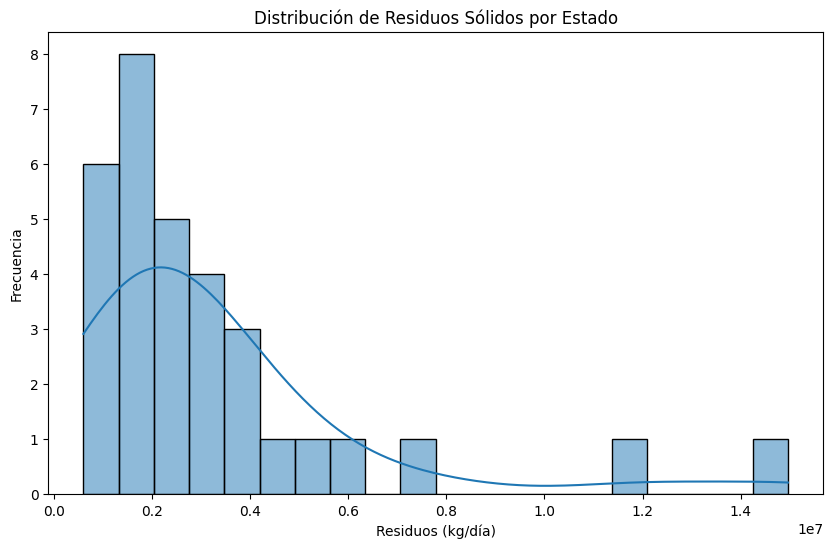

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Promedio diario de residuos sólidos urbanos recolectados', bins=20, kde=True)
plt.title('Distribución de Residuos Sólidos por Estado')
plt.xlabel('Residuos (kg/día)')
plt.ylabel('Frecuencia')
plt.savefig('histograma_distribucion_residuos_estado.png')
plt.show()

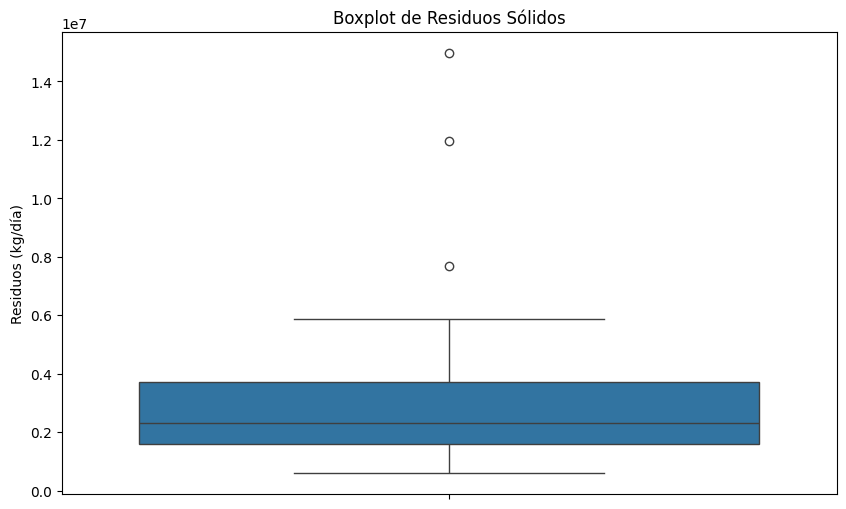

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Promedio diario de residuos sólidos urbanos recolectados')
plt.title('Boxplot de Residuos Sólidos')
plt.ylabel('Residuos (kg/día)')
plt.savefig('boxplot_residuos_estado.png')
plt.show()

<ipython-input-5-1635017966>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_estados, x='Estado', y='Promedio diario de residuos sólidos urbanos recolectados', palette='viridis')


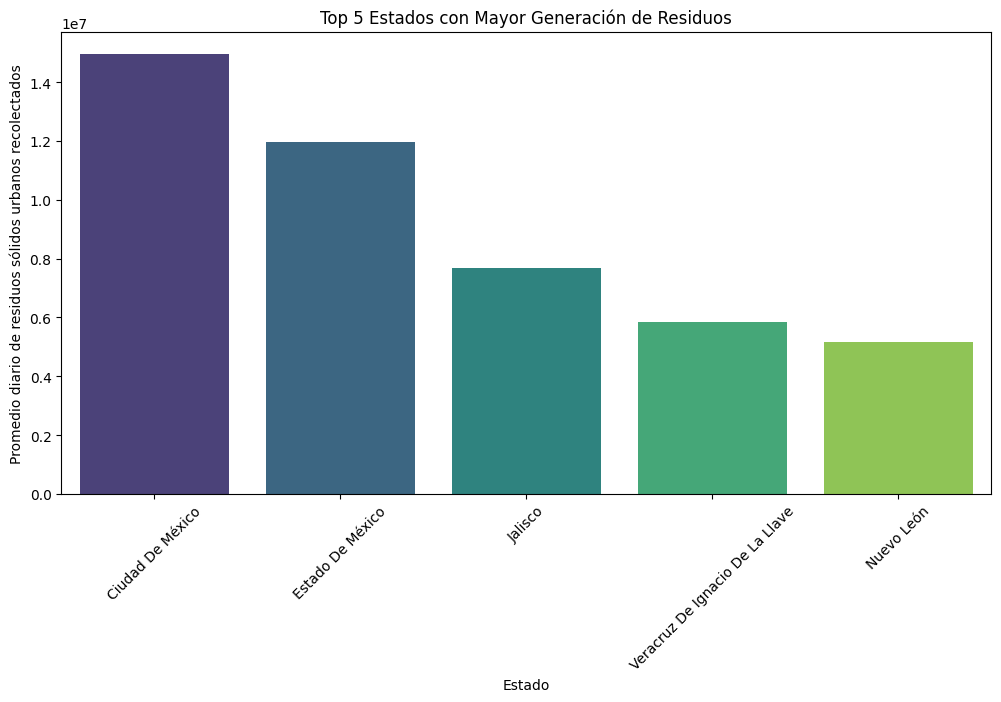

In [ ]:
# Top 5 estados con más residuos
top_estados = df.nlargest(5, 'Promedio diario de residuos sólidos urbanos recolectados')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_estados, x='Estado', y='Promedio diario de residuos sólidos urbanos recolectados', palette='viridis')
plt.title('Top 5 Estados con Mayor Generación de Residuos')
plt.xticks(rotation=45)
plt.savefig("Top 5 estados.png", bbox_inches='tight', dpi=300)  # PNG con alta resolución
plt.show()

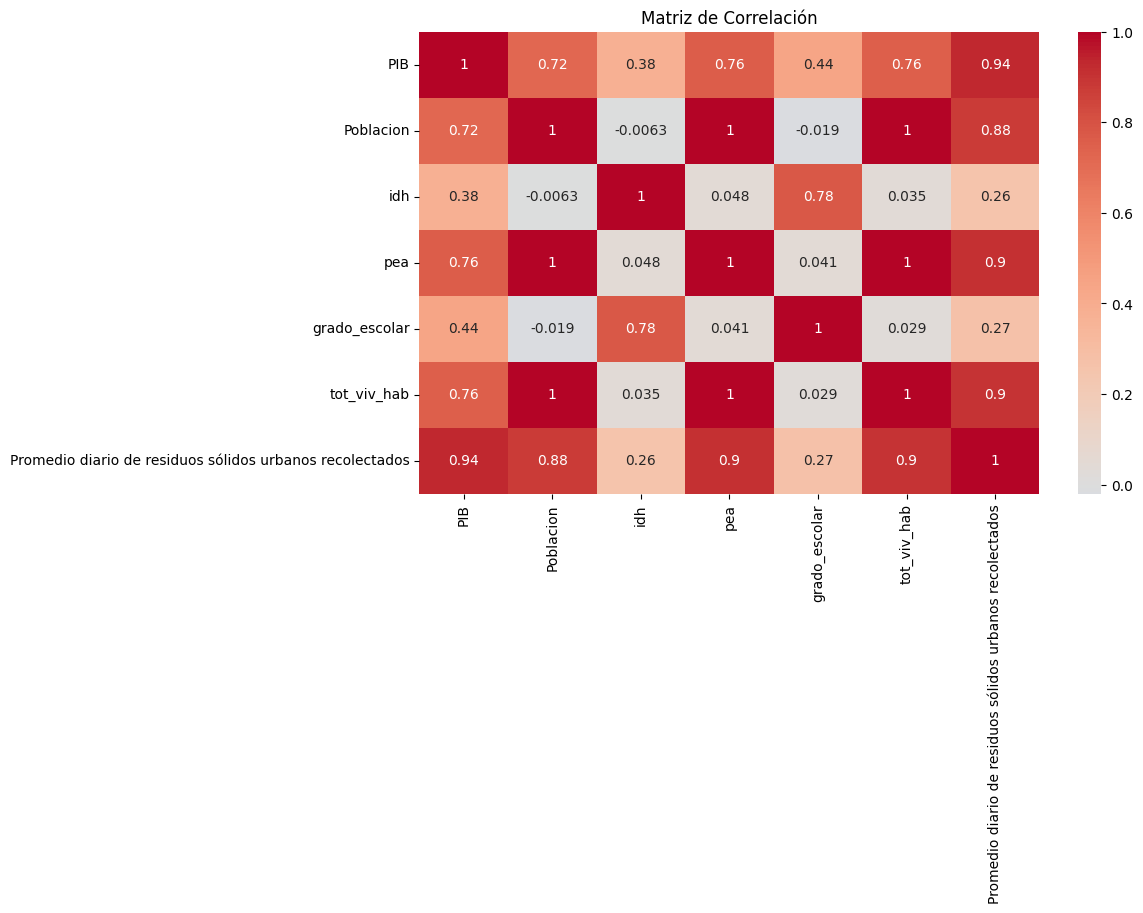

In [ ]:
corr_matrix = df[['PIB', 'Poblacion', 'idh','pea','grado_escolar','tot_viv_hab', 'Promedio diario de residuos sólidos urbanos recolectados']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.savefig("heatmap variables.png", bbox_inches='tight', dpi=300)  # PNG con alta resolución
plt.show()

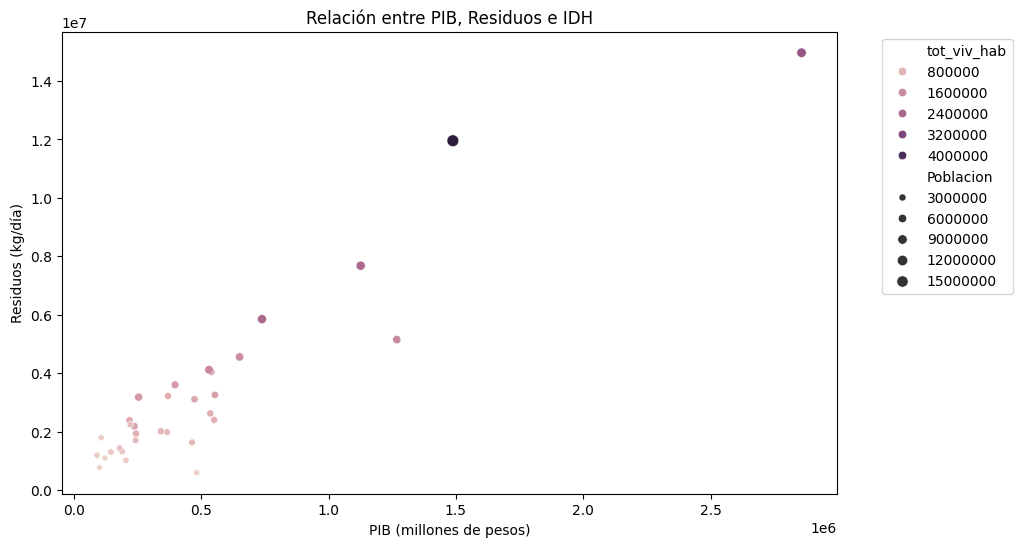

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PIB', y='Promedio diario de residuos sólidos urbanos recolectados', hue='tot_viv_hab', size='Poblacion')
plt.title('Relación entre PIB, Residuos e IDH')
plt.xlabel('PIB (millones de pesos)')
plt.ylabel('Residuos (kg/día)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

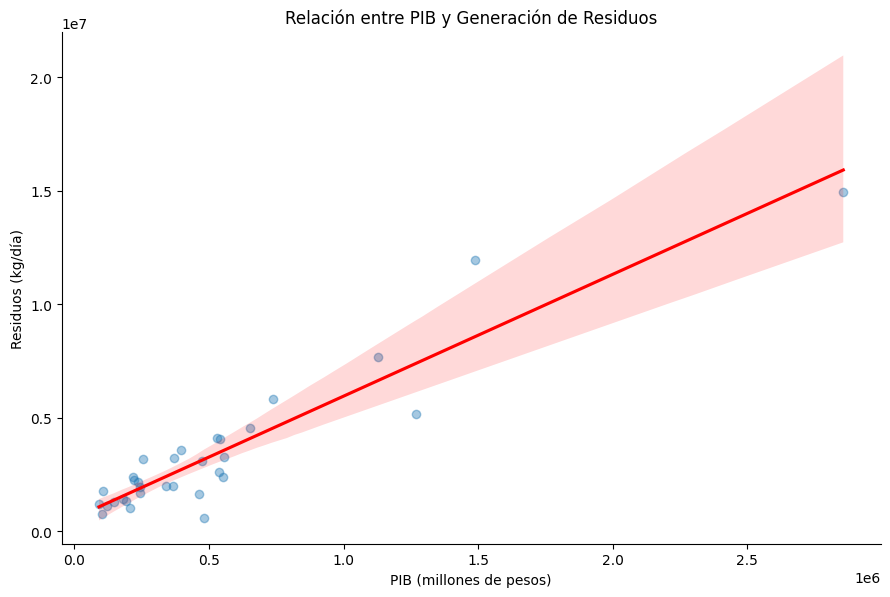

In [ ]:
sns.lmplot(data=df,
           x='PIB',
           y='Promedio diario de residuos sólidos urbanos recolectados',
           height=6,
           aspect=1.5,
           line_kws={'color': 'red'},
           scatter_kws={'alpha': 0.4})
plt.title('Relación entre PIB y Generación de Residuos')
plt.xlabel('PIB (millones de pesos)')
plt.ylabel('Residuos (kg/día)')
plt.show()

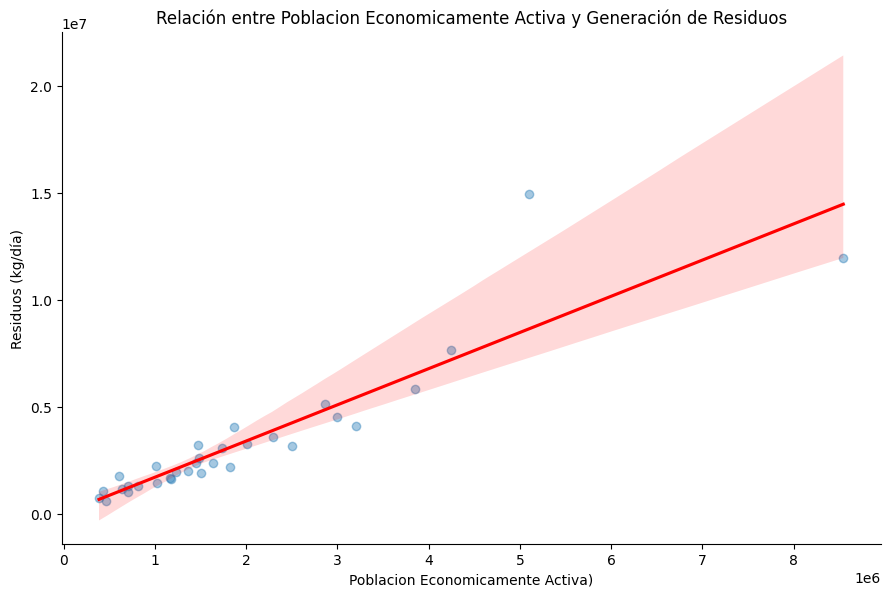

In [ ]:
sns.lmplot(data=df,
           x='pea',
           y='Promedio diario de residuos sólidos urbanos recolectados',
           height=6,
           aspect=1.5,
           line_kws={'color': 'red'},
           scatter_kws={'alpha': 0.4})
plt.title('Relación entre Poblacion Economicamente Activa y Generación de Residuos')
plt.xlabel('Poblacion Economicamente Activa)')
plt.ylabel('Residuos (kg/día)')
plt.show()

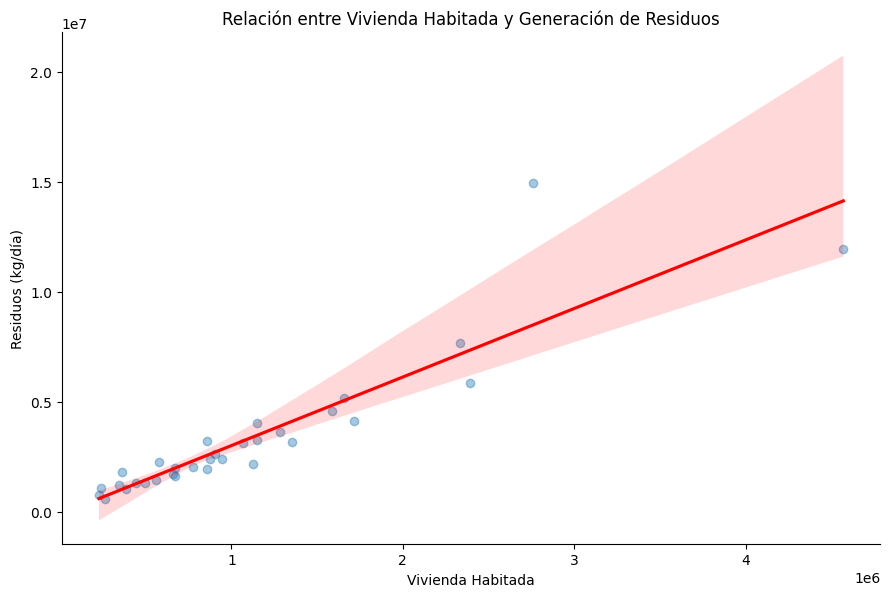

In [ ]:
sns.lmplot(data=df,
           x='tot_viv_hab',
           y='Promedio diario de residuos sólidos urbanos recolectados',
           height=6,
           aspect=1.5,
           line_kws={'color': 'red'},
           scatter_kws={'alpha': 0.4})
plt.title('Relación entre Vivienda Habitada y Generación de Residuos')
plt.xlabel('Vivienda Habitada')
plt.ylabel('Residuos (kg/día)')
plt.show()

ValueError: could not convert string to float: '1,425,607'

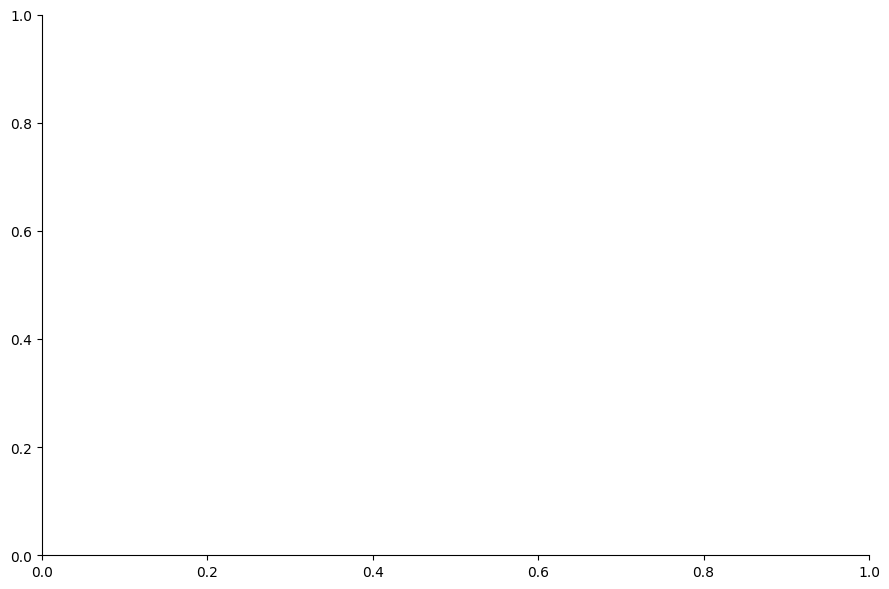

In [ ]:
sns.lmplot(data=df,
           x='Poblacion',
           y='Promedio diario de residuos sólidos urbanos recolectados',
           height=6,
           aspect=1.5,
           line_kws={'color': 'red'},
           scatter_kws={'alpha': 0.4})
plt.title('Relación entre Poblacion y Generación de Residuos')
plt.xlabel('Poblacion')
plt.ylabel('Residuos (kg/día)')
plt.show()

<Figure size 1200x1200 with 0 Axes>

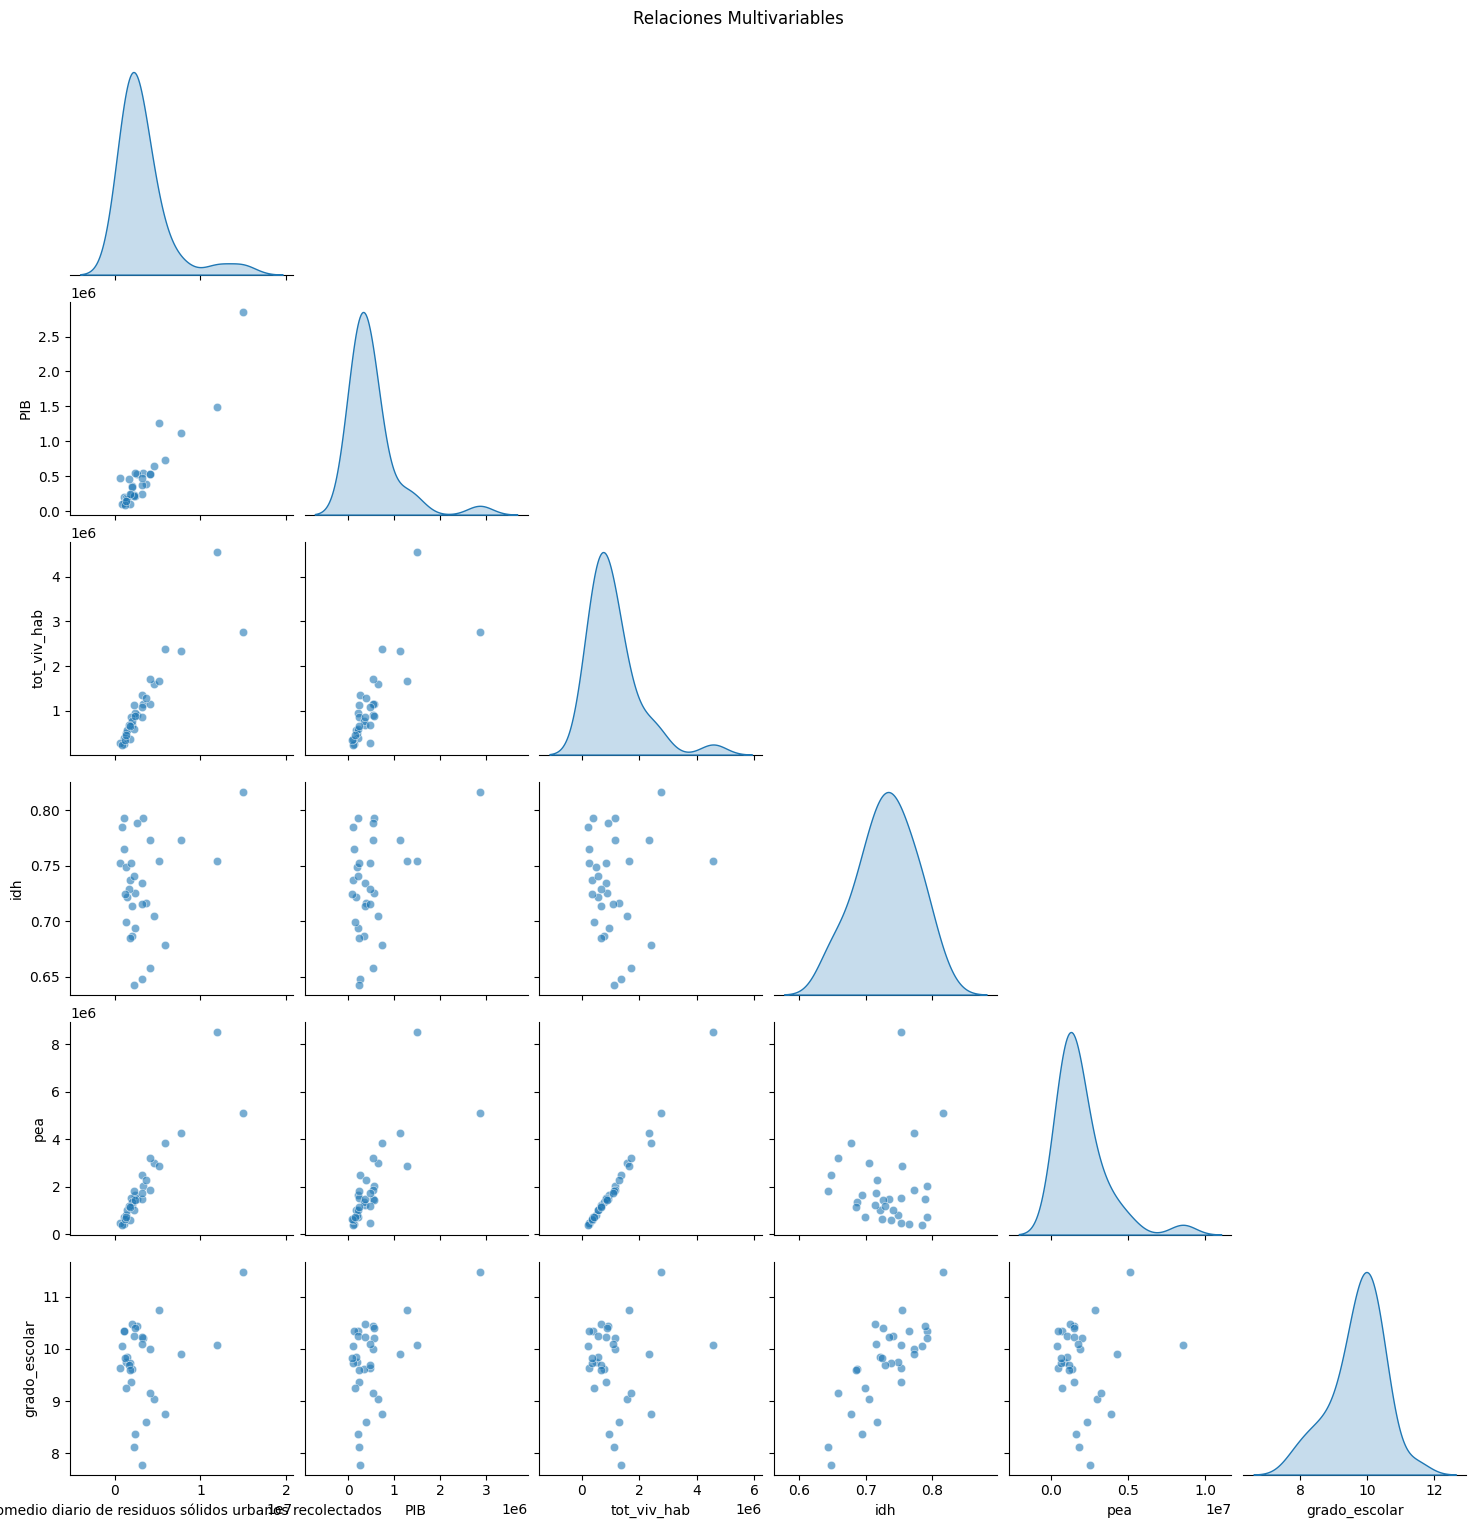

In [ ]:
variables1 = ['Promedio diario de residuos sólidos urbanos recolectados','PIB', 'Poblacion', 'tot_viv_hab','idh','pea','grado_escolar']
plt.figure(figsize=(12, 12))
sns.pairplot(df[variables1],
             diag_kind='kde',  # Histograma o densidad ('kde')
             plot_kws={'alpha': 0.6},
             corner=True)  # Solo muestra la mitad inferior
plt.suptitle('Relaciones Multivariables', y=1.02)
plt.savefig("pairplot variables.png", bbox_inches='tight', dpi=300)  # PNG con alta resolución
plt.show()

In [ ]:
# Calcular correlaciones con una variable objetivo
target_corr = df[variables1].corr()[['Promedio diario de residuos sólidos urbanos recolectados']].sort_values(by='Promedio diario de residuos sólidos urbanos recolectados', ascending=False)

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=target_corr.index,
            y='Promedio diario de residuos sólidos urbanos recolectados',
            data=target_corr,
            palette='viridis')
plt.axhline(0, color='black', linestyle='--')
plt.title('Correlación con Generación de Residuos')
plt.ylabel('Coeficiente de Correlación')
plt.xticks(rotation=90)
plt.savefig("correlacion variables.png", bbox_inches='tight', dpi=300)  # PNG con alta resolución
plt.show()

ValueError: could not convert string to float: '1,425,607'

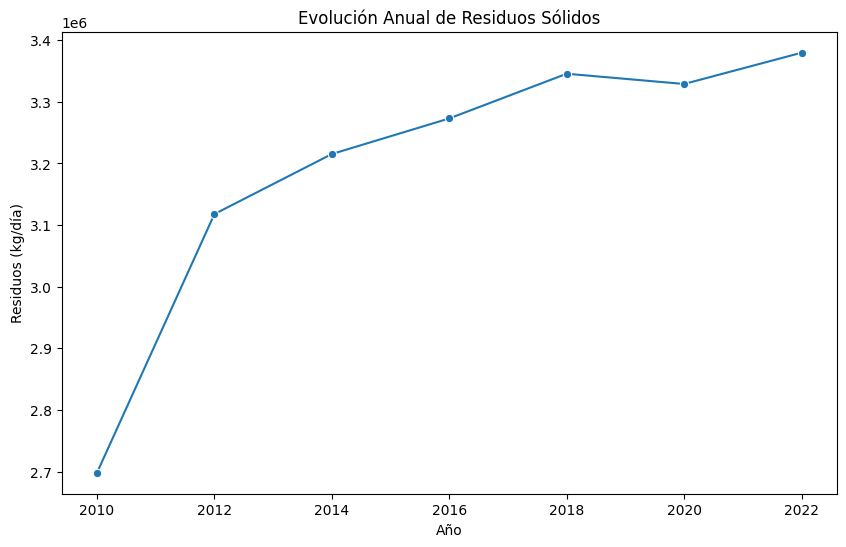

In [ ]:
# Si tuvieras datos de múltiples años:
df_temporal = df_historico_residuos.groupby('Año')['Promedio diario de residuos sólidos urbanos recolectados'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_temporal, x='Año', y='Promedio diario de residuos sólidos urbanos recolectados', marker='o')
plt.title('Evolución Anual de Residuos Sólidos')
plt.ylabel('Residuos (kg/día)')
plt.savefig("evolucion_residuos.png")
plt.show()

In [ ]:
pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
import plotly.express as px
import pandas as pd
import requests


# Mapeo de nombres exacto
nombres_geojson = {
    'Aguascalientes': 'Aguascalientes',
    'Baja California': 'Baja California',
    'Baja California Sur': 'Baja California Sur',
    'Campeche': 'Campeche',
    'Chiapas': 'Chiapas',
    'Chihuahua': 'Chihuahua',
    'Ciudad De México': 'Distrito Federal',  # En algunos GeoJSON aparece así
    'Coahuila De Zaragoza': 'Coahuila',
    'Colima': 'Colima',
    'Durango': 'Durango',
    'Estado De México': 'México',
    'Guanajuato': 'Guanajuato',
    'Guerrero': 'Guerrero',
    'Hidalgo': 'Hidalgo',
    'Jalisco': 'Jalisco',
    'Michoacán De Ocampo': 'Michoacán',
    'Morelos': 'Morelos',
    'Nayarit': 'Nayarit',
    'Nuevo León': 'Nuevo León',
    'Oaxaca': 'Oaxaca',
    'Puebla': 'Puebla',
    'Querétaro': 'Querétaro',
    'Quintana Roo': 'Quintana Roo',
    'San Luis Potosí': 'San Luis Potosí',
    'Sinaloa': 'Sinaloa',
    'Sonora': 'Sonora',
    'Tabasco': 'Tabasco',
    'Tamaulipas': 'Tamaulipas',
    'Tlaxcala': 'Tlaxcala',
    'Veracruz De Ignacio De La Llave': 'Veracruz',
    'Yucatán': 'Yucatán',
    'Zacatecas': 'Zacatecas'
}

df['Estado_GeoJSON'] = df['Estado'].map(nombres_geojson)

# GeoJSON específico para México
url_geojson = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'

fig = px.choropleth(df,
                    geojson=url_geojson,
                    locations='Estado_GeoJSON',
                    featureidkey='properties.name',
                    color='Promedio diario de residuos sólidos urbanos recolectados',
                    color_continuous_scale='Viridis',
                    scope='north america',
                    title='Generación de Residuos por Estado en México')

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

# Forzar visualización en navegador si es necesario
import plotly.io as pio

pio.show(fig)  # Esto abrirá en tu navegador predeterminado

In [ ]:
pip install jenkspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.0/642.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
import plotly.express as px
import pandas as pd
import requests
import numpy as np

# Mapeo de nombres exacto
nombres_geojson = {
    'Aguascalientes': 'Aguascalientes',
    'Baja California': 'Baja California',
    'Baja California Sur': 'Baja California Sur',
    'Campeche': 'Campeche',
    'Chiapas': 'Chiapas',
    'Chihuahua': 'Chihuahua',
    'Ciudad De México': 'Distrito Federal',
    'Coahuila De Zaragoza': 'Coahuila',
    'Colima': 'Colima',
    'Durango': 'Durango',
    'Estado De México': 'México',
    'Guanajuato': 'Guanajuato',
    'Guerrero': 'Guerrero',
    'Hidalgo': 'Hidalgo',
    'Jalisco': 'Jalisco',
    'Michoacán De Ocampo': 'Michoacán',
    'Morelos': 'Morelos',
    'Nayarit': 'Nayarit',
    'Nuevo León': 'Nuevo León',
    'Oaxaca': 'Oaxaca',
    'Puebla': 'Puebla',
    'Querétaro': 'Querétaro',
    'Quintana Roo': 'Quintana Roo',
    'San Luis Potosí': 'San Luis Potosí',
    'Sinaloa': 'Sinaloa',
    'Sonora': 'Sonora',
    'Tabasco': 'Tabasco',
    'Tamaulipas': 'Tamaulipas',
    'Tlaxcala': 'Tlaxcala',
    'Veracruz De Ignacio De La Llave': 'Veracruz',
    'Yucatán': 'Yucatán',
    'Zacatecas': 'Zacatecas'
}

df['Estado_GeoJSON'] = df['Estado'].map(nombres_geojson)

# GeoJSON específico para México
url_geojson = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'

# OPCIÓN 1: CLASIFICACIÓN POR CUANTILES (Recomendado para distribución no uniforme)
n_quantiles = 5  # Número de categorías (quintiles)
df['Residuos_Cuantiles'] = pd.qcut(df['Promedio diario de residuos sólidos urbanos recolectados'],
                                   q=n_quantiles,
                                   labels=False,
                                   duplicates='drop')

# Obtener los rangos numéricos de cada cuantil
quantile_ranges = pd.qcut(df['Promedio diario de residuos sólidos urbanos recolectados'],
                         q=n_quantiles,
                         duplicates='drop')
quantile_bins = quantile_ranges.unique().sort_values()

# Crear etiquetas legibles para la leyenda
legend_labels = {}
for i, q_range in enumerate(quantile_bins):
    legend_labels[i] = f"{q_range.left:,.0f} - {q_range.right:,.0f} kg/día"

# Crear el mapa con clasificación por cuantiles
fig = px.choropleth(df,
                    geojson=url_geojson,
                    locations='Estado_GeoJSON',
                    featureidkey='properties.name',
                    color='Residuos_Cuantiles',
                    color_continuous_scale='Viridis',
                    scope='north america',
                    title='Generación de Residuos por Estado en México - Clasificación por Quintiles',
                    labels={'Residuos_Cuantiles': 'Rango de Residuos (kg/día)'},
                    category_orders={'Residuos_Cuantiles': sorted(df['Residuos_Cuantiles'].unique())})

# Personalizar la leyenda
fig.update_coloraxes(colorbar=dict(
    title="Rango de Residuos<br>(kg/día)",
    tickvals=list(legend_labels.keys()),
    ticktext=list(legend_labels.values()),
    tickmode='array'
))

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

# Añadir anotación con la nota metodológica
fig.add_annotation(
    text="<b>Nota metodológica:</b> Clasificación por quintiles (5 categorías de igual frecuencia). " +
         "Cada color representa aproximadamente el 20% de los estados.",
    xref="paper", yref="paper",
    x=0, y=-0.1,
    showarrow=False,
    font=dict(size=10, color="gray"),
    align="left"
)

# Mostrar información de los rangos en consola para referencia
print("=== INFORMACIÓN METODOLÓGICA ===")
print(f"Método de clasificación: Quintiles ({n_quantiles} categorías)")
print("Rangos por categoría:")
for i, q_range in enumerate(quantile_bins):
    print(f"  Categoría {i+1}: {q_range.left:,.0f} - {q_range.right:,.0f} kg/día")
print(f"Número de estados por categoría:")
print(df['Residuos_Cuantiles'].value_counts().sort_index())

# Forzar visualización
import plotly.io as pio
pio.show(fig)

=== INFORMACIÓN METODOLÓGICA ===
Método de clasificación: Quintiles (5 categorías)
Rangos por categoría:
  Categoría 1: 601,994 - 1,354,007 kg/día
  Categoría 2: 1,354,007 - 2,002,581 kg/día
  Categoría 3: 2,002,581 - 2,919,793 kg/día
  Categoría 4: 2,919,793 - 4,109,315 kg/día
  Categoría 5: 4,109,315 - 14,964,226 kg/día
Número de estados por categoría:
Residuos_Cuantiles
0    7
1    6
2    6
3    6
4    7
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [ ]:
import plotly.express as px
import pandas as pd
import requests
import plotly.io as pio

# Asegúrate de instalar kaleido (requerido para exportar imágenes)
# pip install kaleido

# Mapeo de nombres exacto
nombres_geojson = {
    'Aguascalientes': 'Aguascalientes',
    'Baja California': 'Baja California',
    'Baja California Sur': 'Baja California Sur',
    'Campeche': 'Campeche',
    'Chiapas': 'Chiapas',
    'Chihuahua': 'Chihuahua',
    'Ciudad De México': 'Distrito Federal',
    'Coahuila De Zaragoza': 'Coahuila',
    'Colima': 'Colima',
    'Durango': 'Durango',
    'Estado De México': 'México',
    'Guanajuato': 'Guanajuato',
    'Guerrero': 'Guerrero',
    'Hidalgo': 'Hidalgo',
    'Jalisco': 'Jalisco',
    'Michoacán De Ocampo': 'Michoacán',
    'Morelos': 'Morelos',
    'Nayarit': 'Nayarit',
    'Nuevo León': 'Nuevo León',
    'Oaxaca': 'Oaxaca',
    'Puebla': 'Puebla',
    'Querétaro': 'Querétaro',
    'Quintana Roo': 'Quintana Roo',
    'San Luis Potosí': 'San Luis Potosí',
    'Sinaloa': 'Sinaloa',
    'Sonora': 'Sonora',
    'Tabasco': 'Tabasco',
    'Tamaulipas': 'Tamaulipas',
    'Tlaxcala': 'Tlaxcala',
    'Veracruz De Ignacio De La Llave': 'Veracruz',
    'Yucatán': 'Yucatán',
    'Zacatecas': 'Zacatecas'
}

df['Estado_GeoJSON'] = df['Estado'].map(nombres_geojson)

# GeoJSON para México
url_geojson = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'

fig = px.choropleth(df,
                    geojson=url_geojson,
                    locations='Estado_GeoJSON',
                    featureidkey='properties.name',
                    color='Promedio diario de residuos sólidos urbanos recolectados',
                    color_continuous_scale='Viridis',
                    scope='north america',
                    title='Generación de Residuos por Estado en México')

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

# Mostrar en el navegador (opcional)
pio.show(fig)

# 🔽 Guardar el gráfico como imagen (PNG, JPG, PDF, SVG)
fig.write_html("residuos_mexico.html")  # Gráfico interactivo
# pio.write_image(fig, "residuos_mexico.pdf")  # Versión vectorial (PDF)
# pio.write_image(fig, "residuos_mexico.jpg", width=1200, height=800)  # JPG con tamaño personalizado

In [ ]:
fig = px.treemap(df,
                 path=['Estado'],
                 values='Promedio diario de residuos sólidos urbanos recolectados',
                 title='Distribución de Residuos por Estado')
fig.show()

In [ ]:
# Suponiendo que tienes estas columnas:
df['Cantidad_reciclada'] = df[[
    'Prom Diario Mat Rec recibidos:Papel y cartón Kg',
    'Prom Diario Mat Rec recibidos:PET Kg',
    'Prom Diario Mat Rec recibidos:Otros plásticos Kg',
    # Agrega aquí otras columnas de materiales reciclados
]].sum(axis=1)

df['tasa_reciclaje'] = (df['Cantidad_reciclada'] /
                        df['Promedio diario de residuos sólidos urbanos recolectados']) * 100

# Manejar casos donde residuos = 0 para evitar divisiones infinitas
df['tasa_reciclaje'] = df['tasa_reciclaje'].fillna(0)

In [ ]:
from math import pi
import matplotlib.pyplot as plt
import pandas as pd


# 2. Selección de estados y variables
estados_comparar = ['Ciudad De México', 'Jalisco','Estado De México','Veracruz De Ignacio De La Llave','Nuevo León']
variables = ['PIB', 'Poblacion', 'tot_viv_hab','pea',
             'Promedio diario de residuos sólidos urbanos recolectados',
             'tasa_reciclaje']

# 3. Preparar datos
df_radar = df[df['Estado'].isin(estados_comparar)][['Estado'] + variables].set_index('Estado')

# 4. Escalado (normalización entre 0 y 1)
df_radar = df_radar.apply(lambda x: x/x.max(), axis=0)

# 5. Configuración del gráfico
categories = variables
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Cerrar el círculo

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# 6. Dibujar cada estado
for estado, row in df_radar.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=estado)
    ax.fill(angles, values, alpha=0.25)

# 7. Personalización
plt.xticks(angles[:-1], categories, fontsize=12)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1], ["20%", "40%", "60%", "80%", "100%"], fontsize=10)
plt.title('Comparación de Indicadores Clave', pad=20, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.savefig("radar.png")
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

ANALISIS DE RESIDUOS SOLIDOS URBANOS

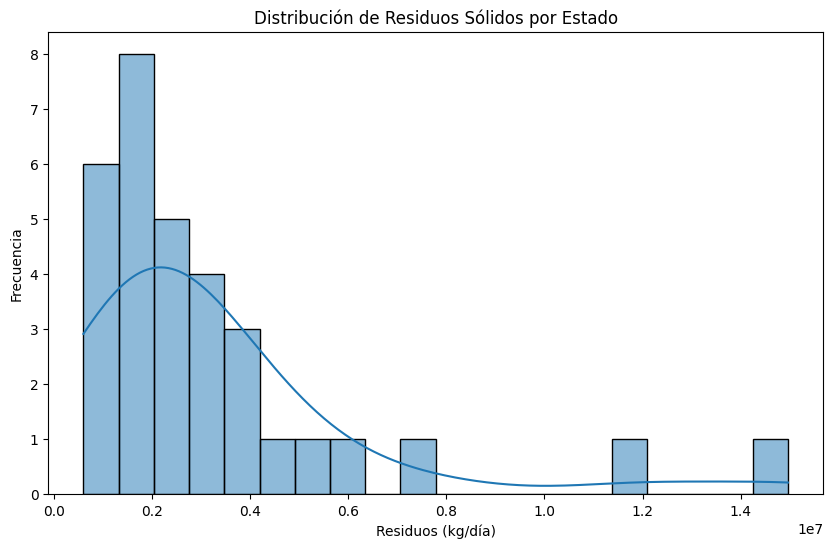

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Promedio diario de residuos sólidos urbanos recolectados', bins=20, kde=True)
plt.title('Distribución de Residuos Sólidos por Estado')
plt.xlabel('Residuos (kg/día)')
plt.ylabel('Frecuencia')
plt.show()

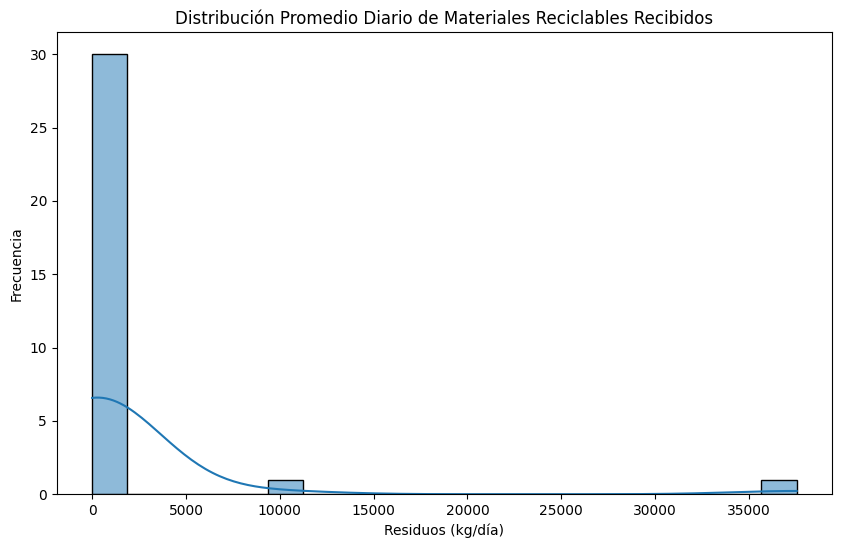

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cantidad promedio diaria de materiales reciclables recibidos (kilogramos)', bins=20, kde=True)
plt.title('Distribución Promedio Diario de Materiales Reciclables Recibidos')
plt.xlabel('Residuos (kg/día)')
plt.ylabel('Frecuencia')
plt.savefig("histograma materiales reciclables recibidos.png")
plt.show()

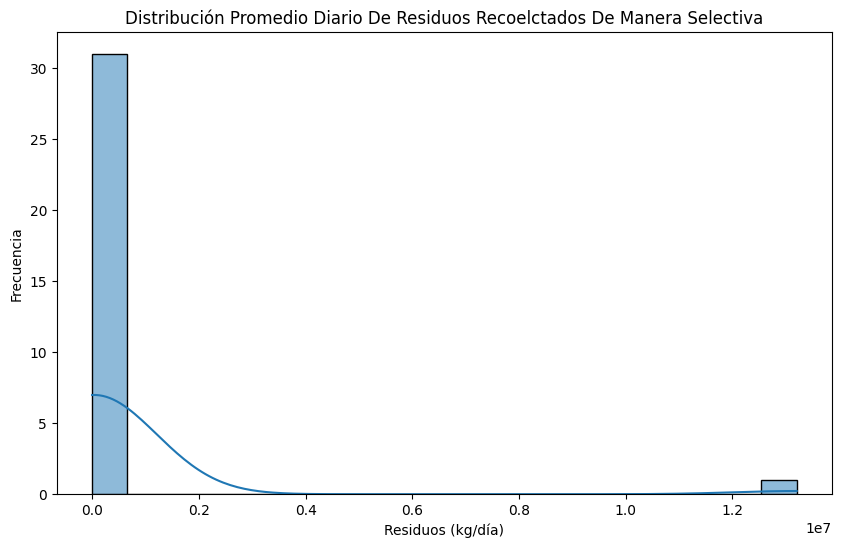

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cantidad promedio diaria de residuos recolectados de manera selectiva', bins=20, kde=True)
plt.title('Distribución Promedio Diario De Residuos Recoelctados De Manera Selectiva')
plt.xlabel('Residuos (kg/día)')
plt.ylabel('Frecuencia')
plt.savefig("histograma residuos recolectados de manera selectiva.png")
plt.show()

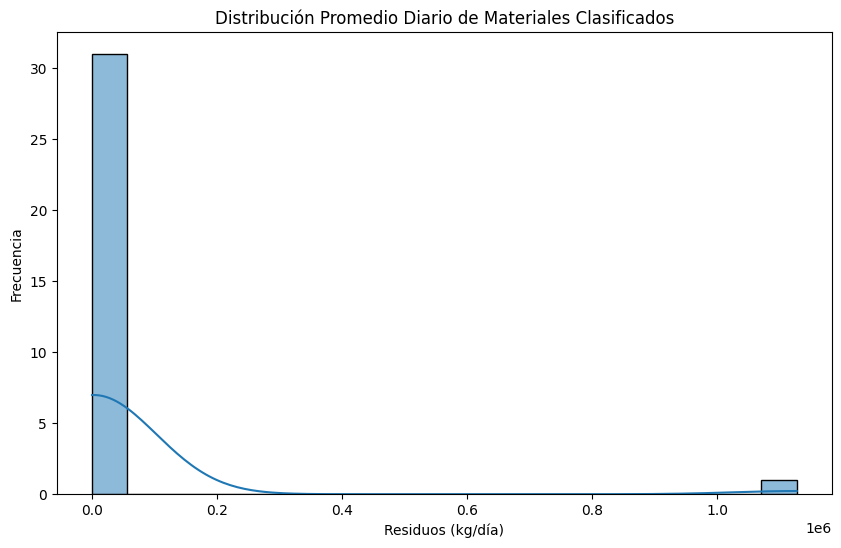

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cantidad promedio diaria de materiales clasificados (kilogramos)', bins=20, kde=True)
plt.title('Distribución Promedio Diario de Materiales Clasificados')
plt.xlabel('Residuos (kg/día)')
plt.ylabel('Frecuencia')
plt.savefig("histograma materiales clasificados.png")
plt.show()

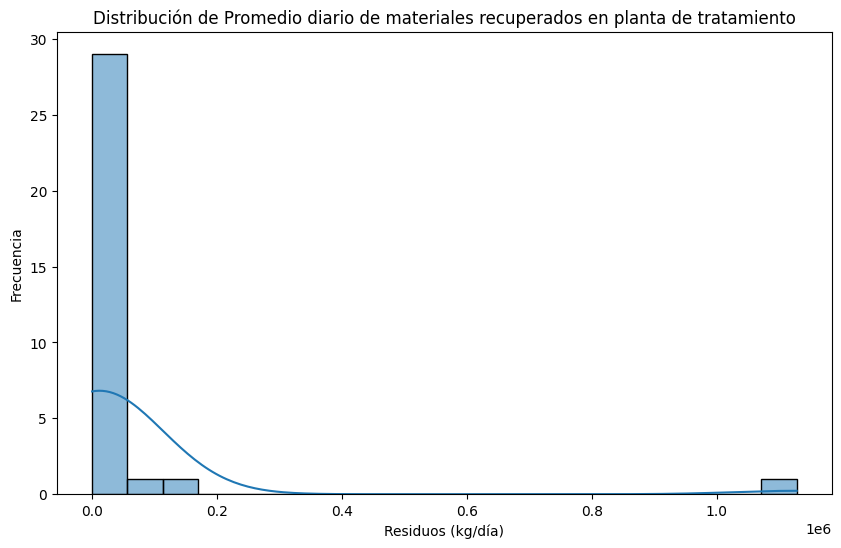

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cantidad promedio diaria de materiales recuperados en planta de tratamiento', bins=20, kde=True)
plt.title('Distribución de Promedio diario de materiales recuperados en planta de tratamiento')
plt.xlabel('Residuos (kg/día)')
plt.ylabel('Frecuencia')
plt.savefig("histograma materiales recuperados en planta de tratamiento.png")
plt.show()

<ipython-input-93-fffad6e7df13>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




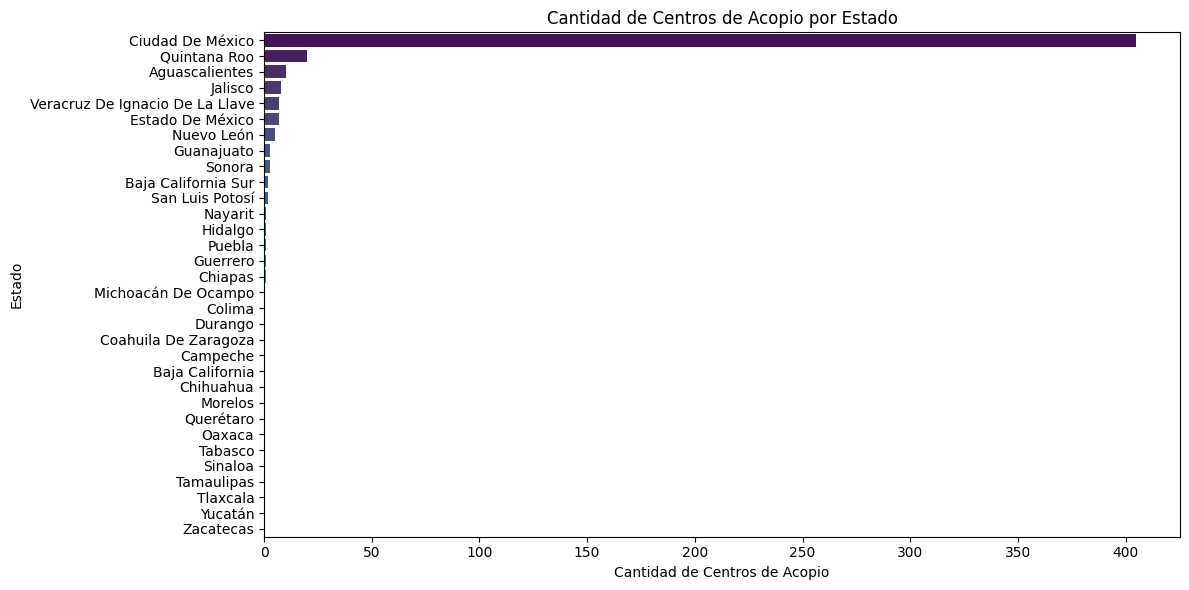

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Cantidad Centros de acopio', y='Estado', palette='viridis', order=df.sort_values('Cantidad Centros de acopio', ascending=False)['Estado'])
plt.title('Cantidad de Centros de Acopio por Estado')
plt.xlabel('Cantidad de Centros de Acopio')
plt.ylabel('Estado')
plt.tight_layout()
plt.savefig("barplot cantidad centros de acopio.png")
plt.show()


<ipython-input-94-2afee7a8f4b2>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




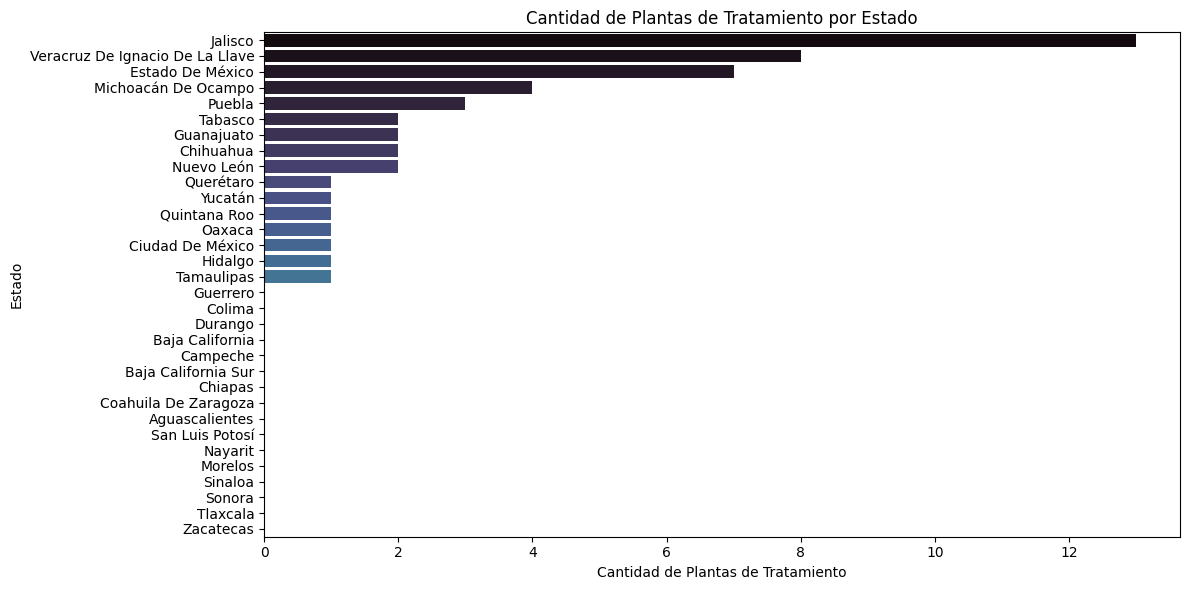

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Cantidad Plantas de tratamiento', y='Estado', palette='mako', order=df.sort_values('Cantidad Plantas de tratamiento', ascending=False)['Estado'])
plt.title('Cantidad de Plantas de Tratamiento por Estado')
plt.xlabel('Cantidad de Plantas de Tratamiento')
plt.ylabel('Estado')
plt.tight_layout()
plt.savefig("barplot cantidad plantas de tratamiento.png")
plt.show()


<ipython-input-95-c496e1b852cc>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




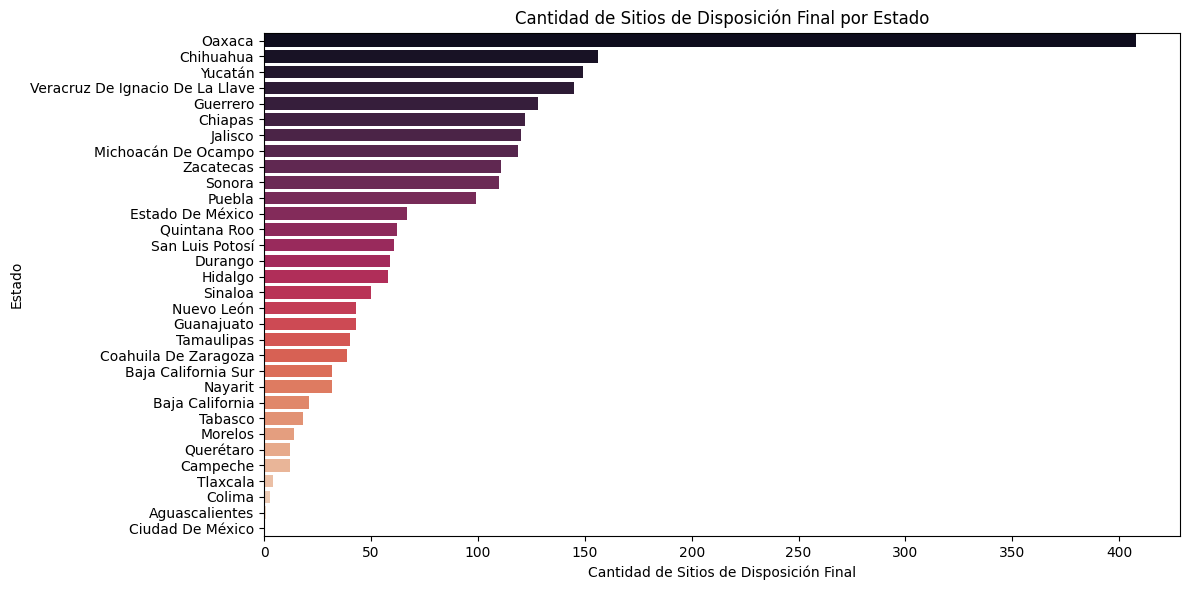

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Cantidad Sitios de disposición final', y='Estado', palette='rocket', order=df.sort_values('Cantidad Sitios de disposición final', ascending=False)['Estado'])
plt.title('Cantidad de Sitios de Disposición Final por Estado')
plt.xlabel('Cantidad de Sitios de Disposición Final')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()


<ipython-input-96-a33ba0adc92d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-96-a33ba0adc92d>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-96-a33ba0adc92d>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




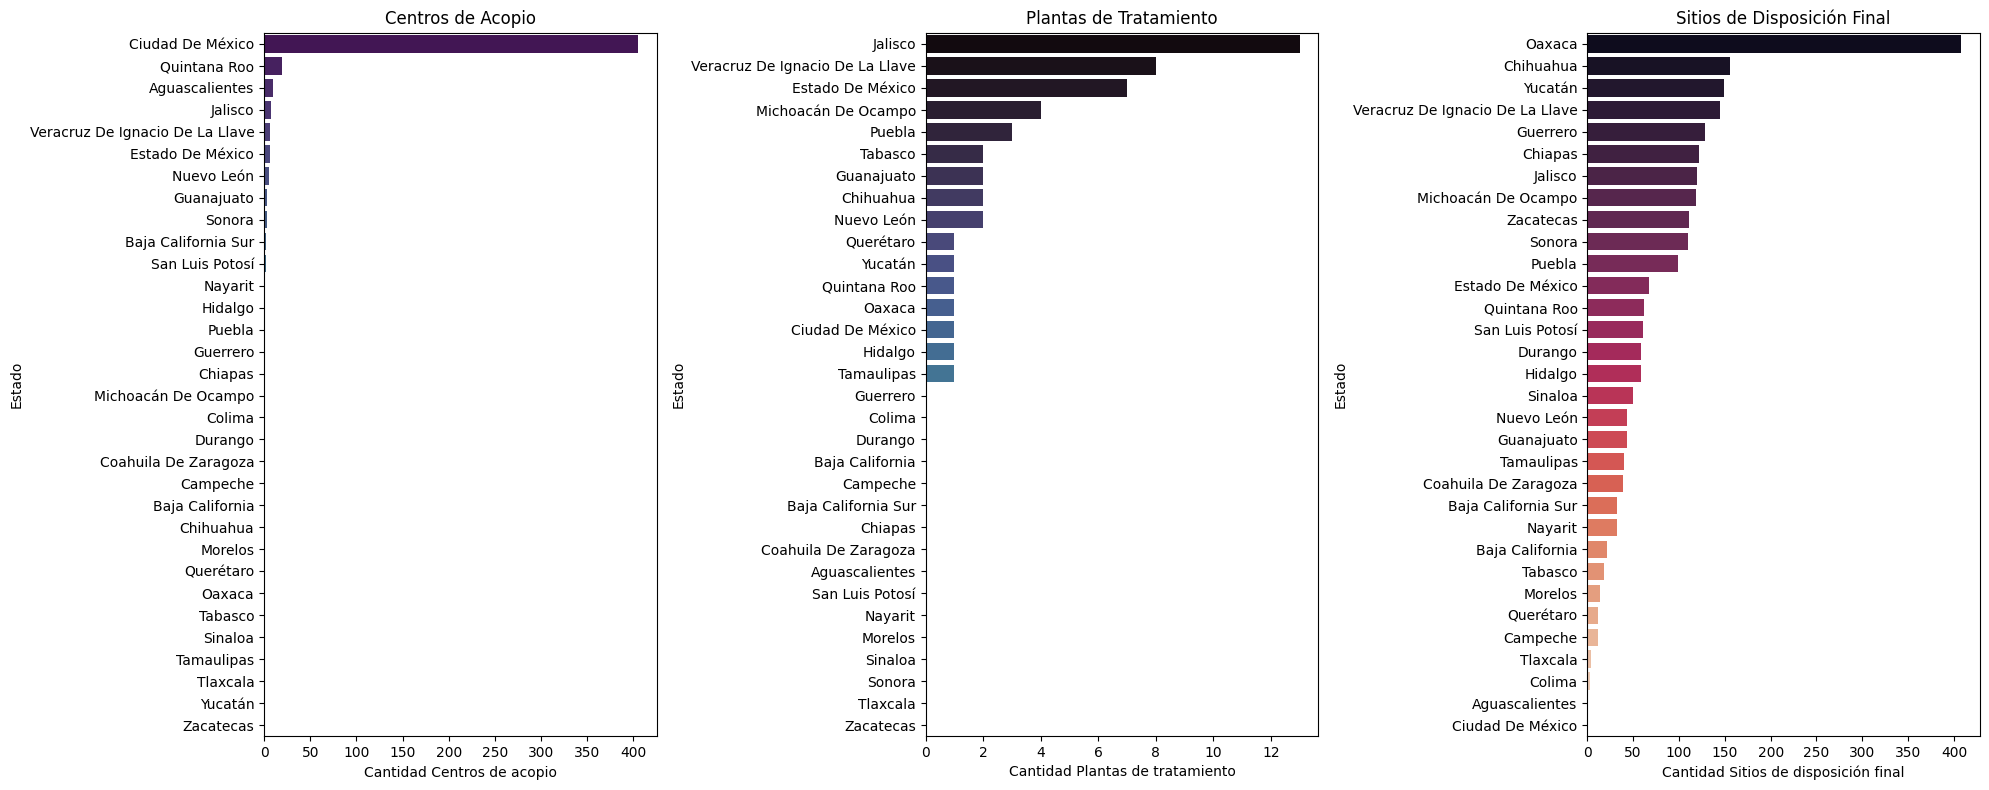

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Centros de acopio
sns.barplot(data=df, x='Cantidad Centros de acopio', y='Estado', palette='viridis', ax=axs[0], order=df.sort_values('Cantidad Centros de acopio', ascending=False)['Estado'])
axs[0].set_title('Centros de Acopio')

# Plantas de tratamiento
sns.barplot(data=df, x='Cantidad Plantas de tratamiento', y='Estado', palette='mako', ax=axs[1], order=df.sort_values('Cantidad Plantas de tratamiento', ascending=False)['Estado'])
axs[1].set_title('Plantas de Tratamiento')

# Sitios de disposición final
sns.barplot(data=df, x='Cantidad Sitios de disposición final', y='Estado', palette='rocket', ax=axs[2], order=df.sort_values('Cantidad Sitios de disposición final', ascending=False)['Estado'])
axs[2].set_title('Sitios de Disposición Final')

plt.tight_layout()
plt.show()


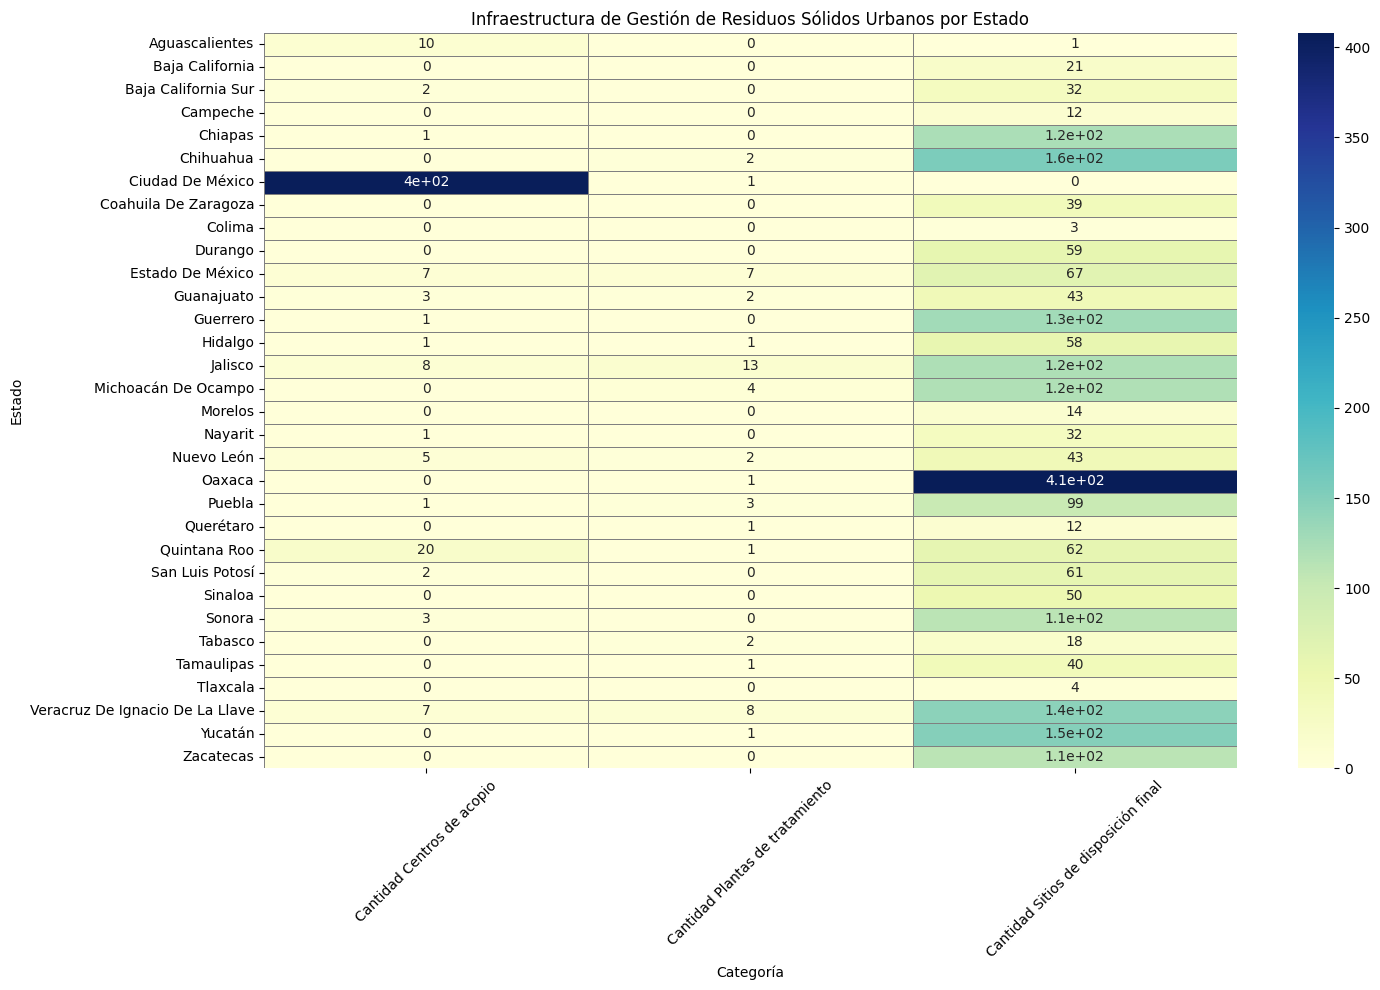

In [ ]:
# Nos quedamos con Estado + las variables que quieres comparar
df_heatmap = df[['Estado',
                 'Cantidad Centros de acopio',
                 'Cantidad Plantas de tratamiento',
                 'Cantidad Sitios de disposición final']]
df_heatmap = df_heatmap.set_index('Estado')
plt.figure(figsize=(15,10))
sns.heatmap(df_heatmap, annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Infraestructura de Gestión de Residuos Sólidos Urbanos por Estado')
plt.xlabel('Categoría')
plt.ylabel('Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


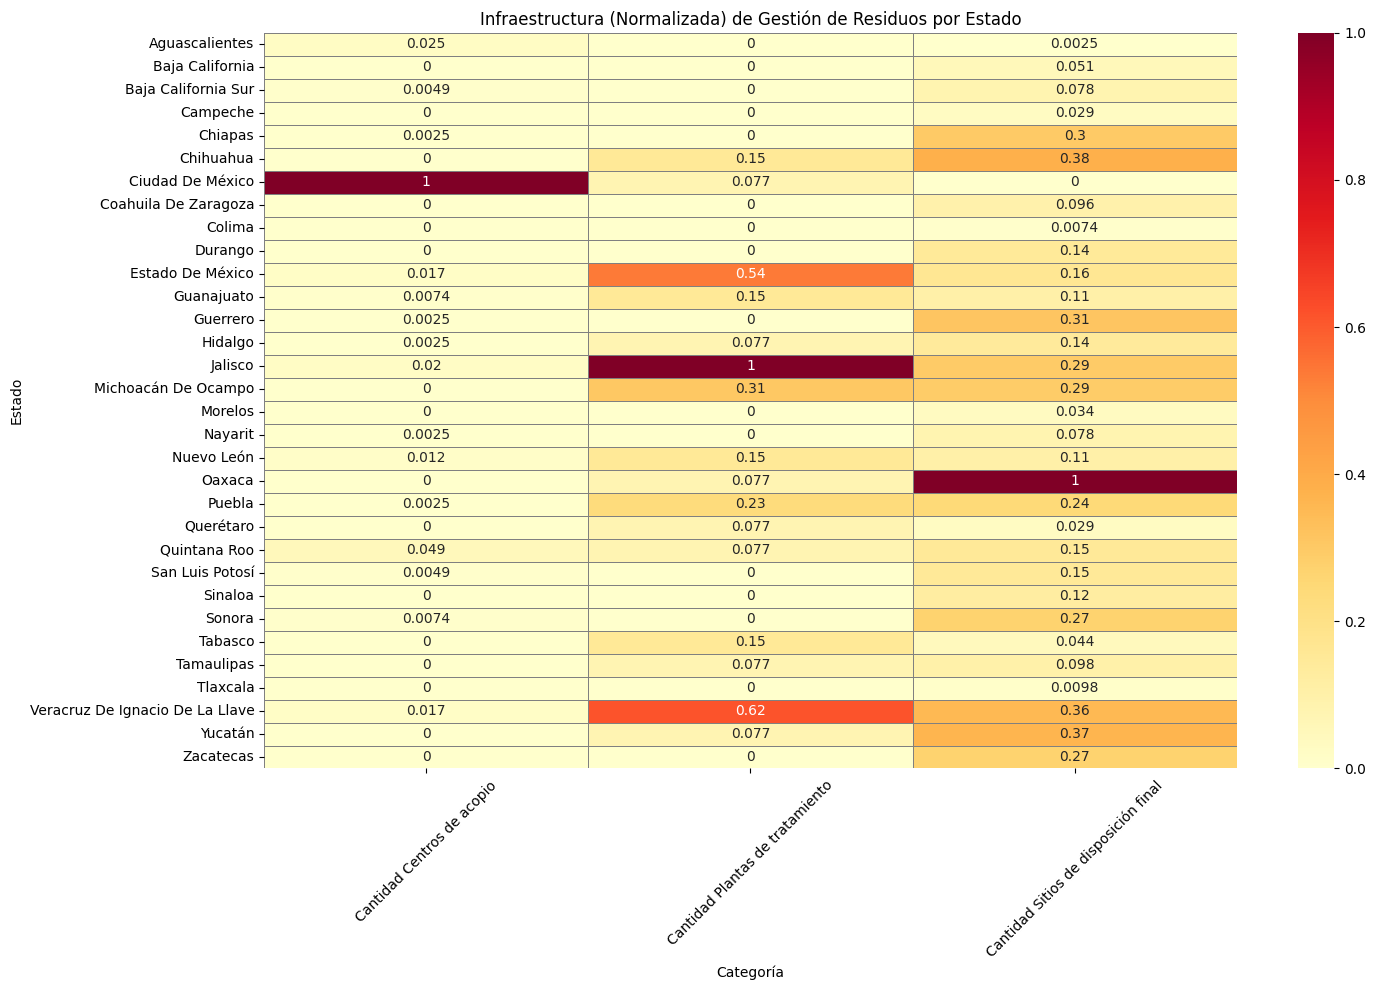

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_heatmap),
                         index=df_heatmap.index,
                         columns=df_heatmap.columns)

plt.figure(figsize=(15,10))
sns.heatmap(df_scaled, annot=True, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Infraestructura (Normalizada) de Gestión de Residuos por Estado')
plt.xlabel('Categoría')
plt.ylabel('Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


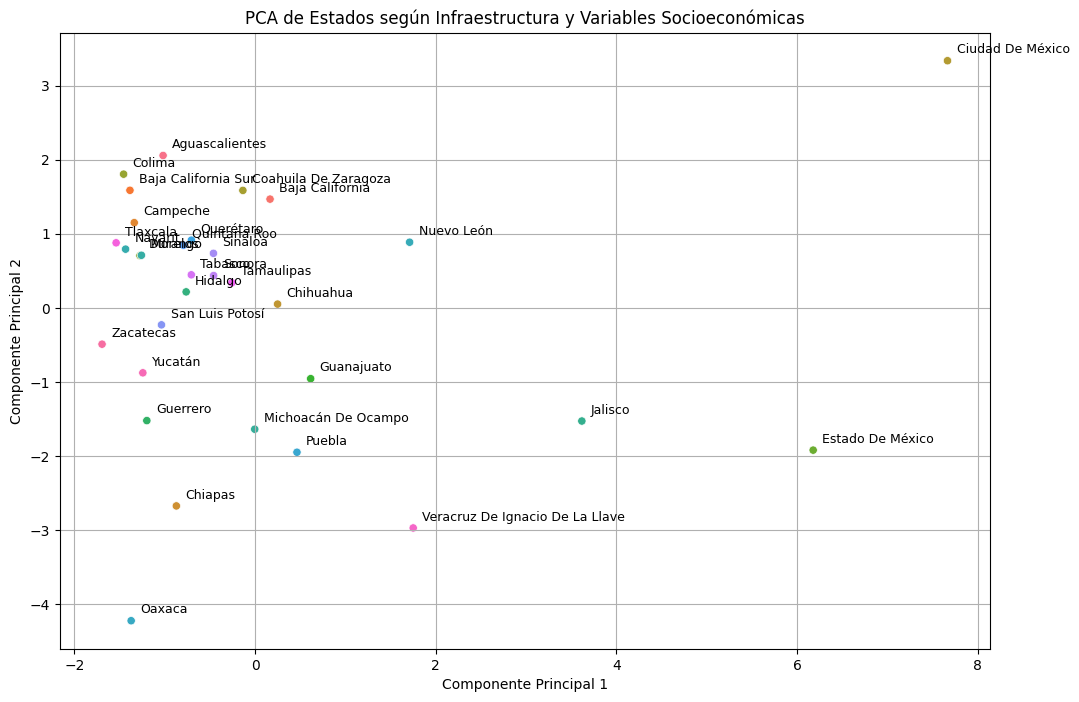

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Seleccionamos las variables que queremos analizar
variables_pca = ['Cantidad Centros de acopio',
                 'Cantidad Plantas de tratamiento',
                 'Cantidad Sitios de disposición final',
                 'Promedio diario de residuos sólidos urbanos recolectados',
                 'pea', 'grado_escolar', 'idh', 'PIB', 'Poblacion']

df_pca = df[variables_pca].dropna()

# 2. Estandarizar los datos
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# 3. Aplicar PCA
pca = PCA(n_components=2)  # Queremos reducir a 2 componentes
pca_result = pca.fit_transform(df_pca_scaled)

# 4. Crear un DataFrame con los resultados
df_pca_result = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca_result['Estado'] = df['Estado'].values

# 5. Graficar
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_pca_result, x='PC1', y='PC2', hue='Estado', legend=False)
for i in range(df_pca_result.shape[0]):
    plt.text(df_pca_result['PC1'][i]+0.1, df_pca_result['PC2'][i]+0.1, df_pca_result['Estado'][i], fontsize=9)
plt.title('PCA de Estados según Infraestructura y Variables Socioeconómicas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.savefig('PCA de Estados según Infraestructura y Variables Socioeconómicas.png')
plt.show()



In [ ]:
print("Varianza explicada por PC1 y PC2:", pca.explained_variance_ratio_)
print("Varianza total explicada:", pca.explained_variance_ratio_.sum())


Varianza explicada por PC1 y PC2: [0.49802886 0.29006648]
Varianza total explicada: 0.7880953428584534


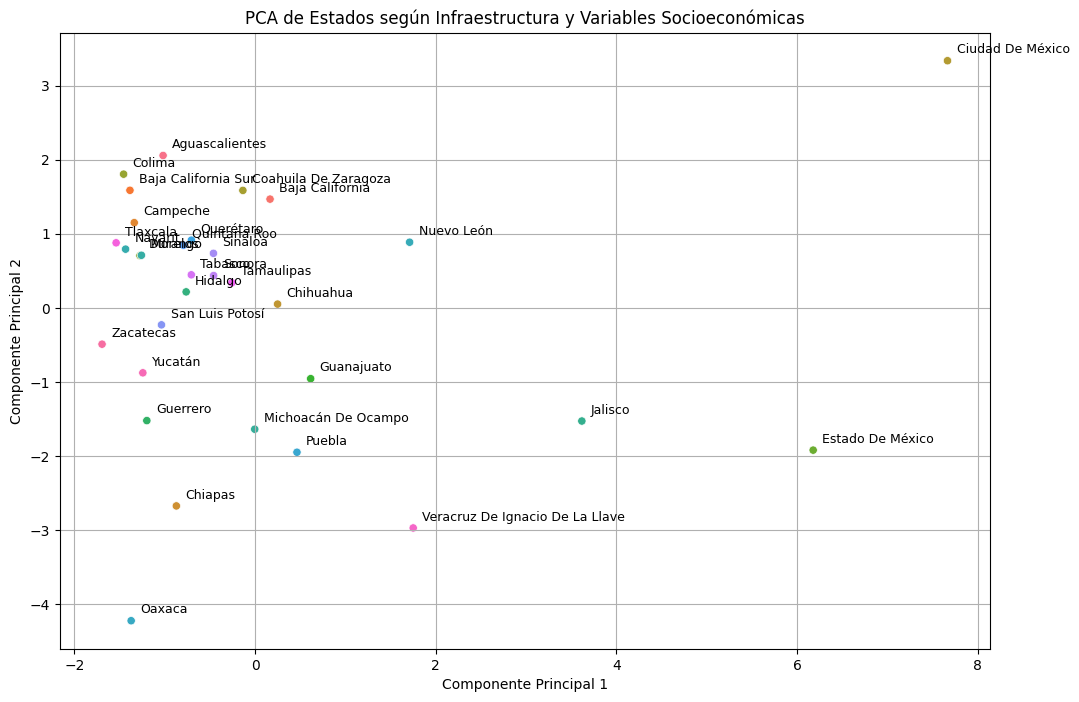

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Seleccionamos las variables que queremos analizar
variables_pca = ['Cantidad Centros de acopio',
                 'Cantidad Plantas de tratamiento',
                 'Cantidad Sitios de disposición final',
                 'Promedio diario de residuos sólidos urbanos recolectados',
                 'pea', 'grado_escolar', 'idh', 'PIB', 'Poblacion']

df_pca = df[variables_pca].dropna()

# 2. Estandarizar los datos
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# 3. Aplicar PCA
pca = PCA(n_components=2)  # Queremos reducir a 2 componentes
pca_result = pca.fit_transform(df_pca_scaled)

# 4. Crear un DataFrame con los resultados
df_pca_result = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca_result['Estado'] = df['Estado'].values

# 5. Graficar
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_pca_result, x='PC1', y='PC2', hue='Estado', legend=False)
for i in range(df_pca_result.shape[0]):
    plt.text(df_pca_result['PC1'][i]+0.1, df_pca_result['PC2'][i]+0.1, df_pca_result['Estado'][i], fontsize=9)
plt.title('PCA de Estados según Infraestructura y Variables Socioeconómicas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.savefig('PCA de Estados según Infraestructura y Variables Socioeconómicas.png')
plt.show()

In [ ]:
pip install adjustText

/tmp/ipython-input-2849085018.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  loadings.PC1[i]*3,
/tmp/ipython-input-2849085018.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  loadings.PC2[i]*3,
/tmp/ipython-input-2849085018.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings.PC1[i]*3.2, loadings.PC2[i]*3.2, var,


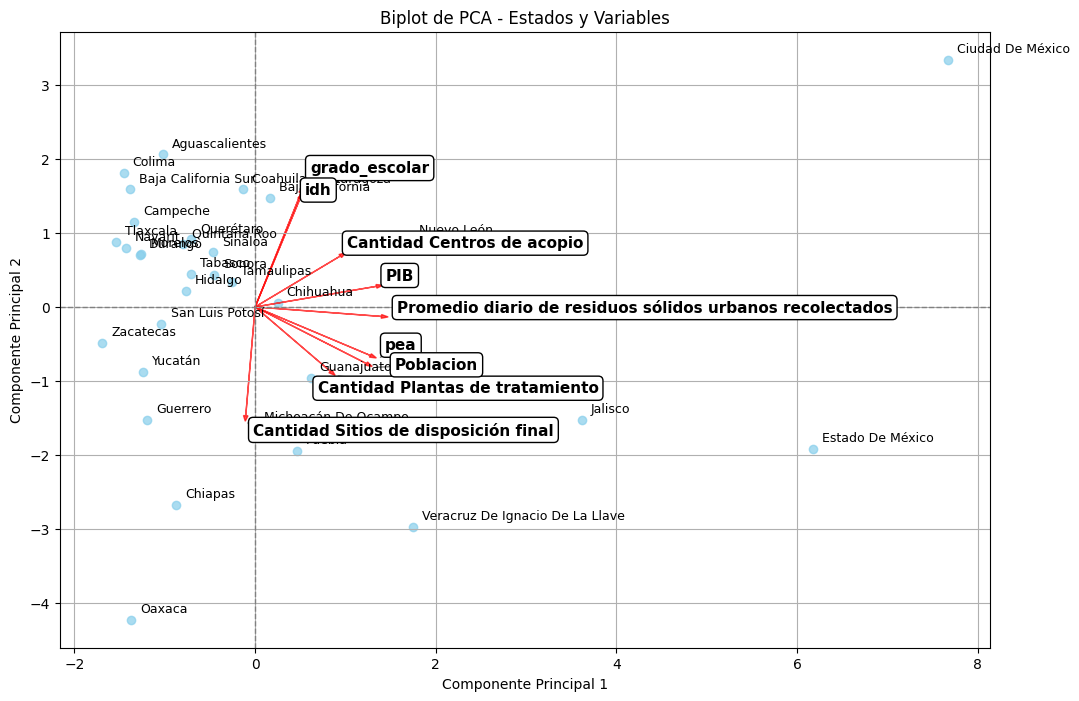

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# 1. Resultados de PCA
pc1 = pca_result[:, 0]
pc2 = pca_result[:, 1]

# 2. Loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2'],
                        index=variables_pca)

# 3. Gráfico Biplot
plt.figure(figsize=(12, 8))

# --- Puntos: Estados ---
plt.scatter(pc1, pc2, c='skyblue', alpha=0.7)
for i, estado in enumerate(df['Estado']):
    plt.text(pc1[i] + 0.1, pc2[i] + 0.1, estado, fontsize=9)

# --- Vectores y etiquetas de variables ---
texts = []
for i, var in enumerate(loadings.index):
    plt.arrow(0, 0,
              loadings.PC1[i]*3,
              loadings.PC2[i]*3,
              color='red', alpha=0.7, head_width=0.05)

    # Guardamos los textos en una lista en lugar de dibujarlos de inmediato
    texts.append(
        plt.text(loadings.PC1[i]*3.2, loadings.PC2[i]*3.2, var,
                 color='black', fontsize=11, fontweight='bold',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    )

# Ajustamos posiciones para evitar solapamientos
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray'))

# --- Etiquetas y estilo ---
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Biplot de PCA - Estados y Variables")
plt.grid()
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.axvline(0, color='grey', linestyle='--', linewidth=1)
plt.savefig('biplot.png')
plt.show()




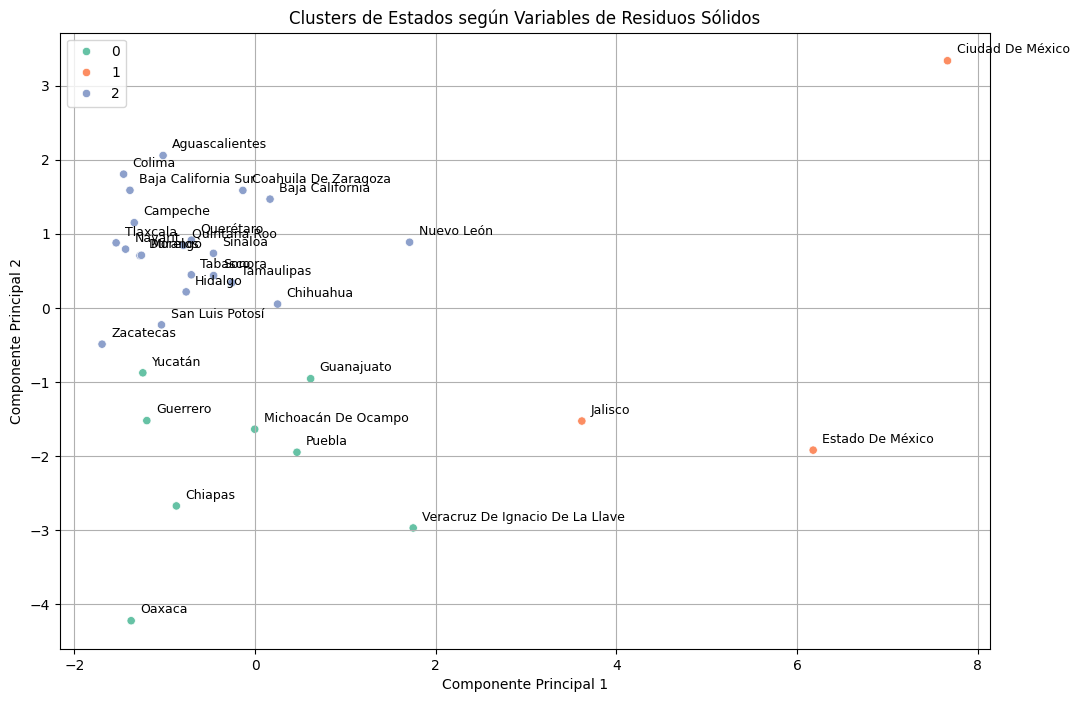

In [ ]:
from sklearn.cluster import KMeans

# 1. Usamos el mismo df_pca_scaled
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca_scaled)

# 2. Añadimos el cluster al DataFrame
df['Cluster'] = clusters

# 3. Visualizamos
plt.figure(figsize=(12,8))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=clusters, palette='Set2')
for i in range(df.shape[0]):
    plt.text(pca_result[i,0]+0.1, pca_result[i,1]+0.1, df['Estado'].iloc[i], fontsize=9)
plt.title('Clusters de Estados según Variables de Residuos Sólidos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.savefig('mi_grafico cluster.png')
plt.show()


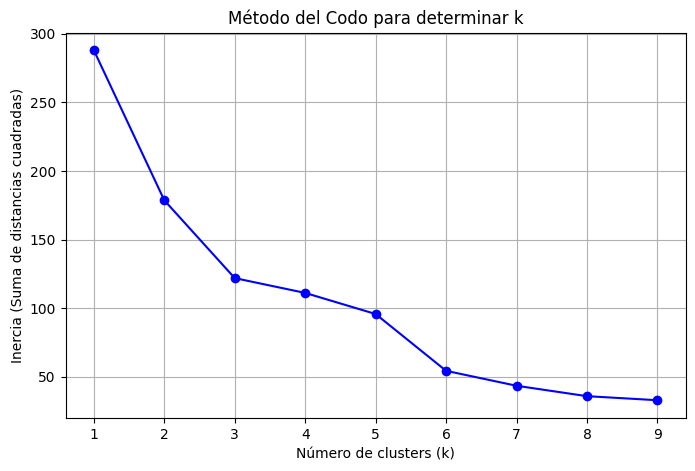

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Rango de posibles k
inertia = []
K = range(1, 10)  # puedes ampliar a más clusters si quieres

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del codo
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Suma de distancias cuadradas)')
plt.title('Método del Codo para determinar k')
plt.grid(True)
plt.savefig('elbow.png')
plt.show()


In [ ]:
# Recordatorio: variables_pca es la lista de variables que analizamos.

# 1. Obtenemos los loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2'],
                        index=variables_pca)

# 2. Mostramos
print(loadings)


                                                         PC1       PC2
Cantidad Centros de acopio                          0.314168  0.229033
Cantidad Plantas de tratamiento                     0.278045 -0.290148
Cantidad Sitios de disposición final               -0.034643 -0.489114
Promedio diario de residuos sólidos urbanos rec...  0.465963 -0.042696
pea                                                 0.425127 -0.218302
grado_escolar                                       0.169414  0.514142
idh                                                 0.165361  0.486645
PIB                                                 0.447570  0.092695
Poblacion                                           0.410574 -0.254733


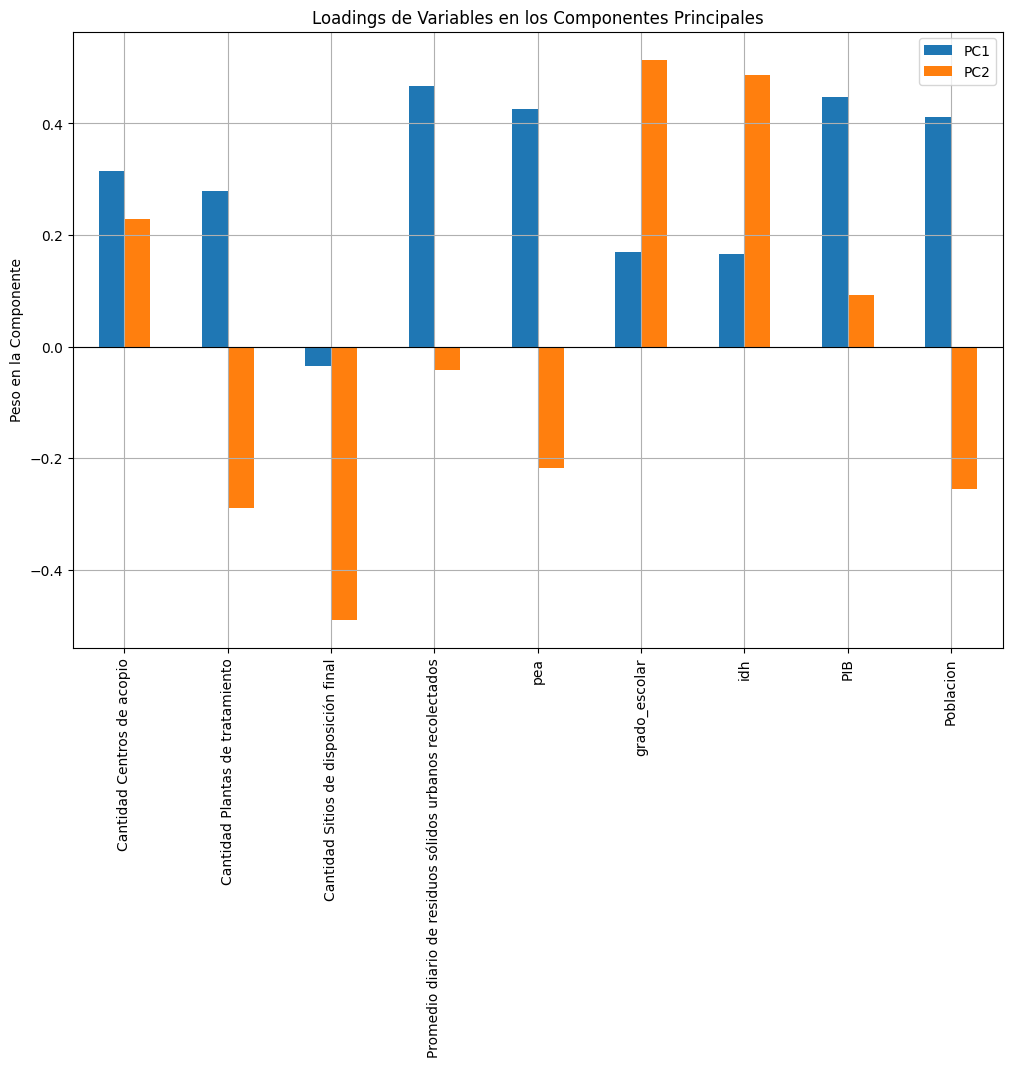

In [ ]:
# 3. Graficamos
loadings.plot(kind='bar', figsize=(12,8))
plt.title('Loadings de Variables en los Componentes Principales')
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel('Peso en la Componente')
plt.grid()
plt.savefig('loadings.png')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Formamos 3 clusters
cluster_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['Cluster'] = cluster_model.fit_predict(df_pca_scaled)

# Mostramos
df[['Estado', 'Cluster']]


Estado  Cluster
0                    Aguascalientes        2
1                   Baja California        2
2               Baja California Sur        2
3                          Campeche        2
4                           Chiapas        1
5                         Chihuahua        2
6                  Ciudad De México        0
7              Coahuila De Zaragoza        2
8                            Colima        2
9                           Durango        2
10                 Estado De México        0
11                       Guanajuato        1
12                         Guerrero        1
13                          Hidalgo        2
14                          Jalisco        0
15              Michoacán De Ocampo        1
16                          Morelos        2
17                          Nayarit        2
18                       Nuevo León        2
19                           Oaxaca        1
20                           Puebla        1
21                        Querétaro        2
22                     Quintana Roo        2
23                  San Luis Potosí        1
24                          Sinaloa        2
25                           Sonora        2
26                          Tabasco        2
27                       Tamaulipas        2
28                         Tlaxcala        2
29  Veracruz De Ignacio De La Llave        1
30                          Yucatán        1
31                        Zacatecas        1

In [ ]:
pip install openpyxl

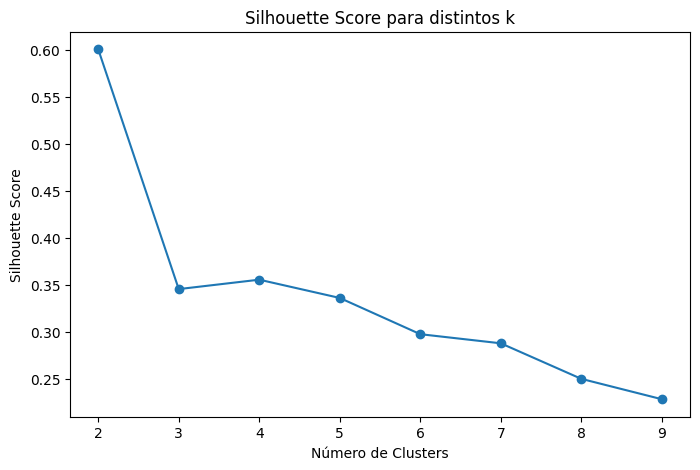

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []

# Probamos varios números de clusters
for n_clusters in range(2, 10):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    preds = clusterer.fit_predict(df_pca_scaled)
    score = silhouette_score(df_pca_scaled, preds)
    silhouette_scores.append(score)

# Visualizar
plt.figure(figsize=(8,5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score para distintos k')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.savefig('silhouette_score.png')
plt.show()


ANALISIS DE RESIDUOS SOLIDOS

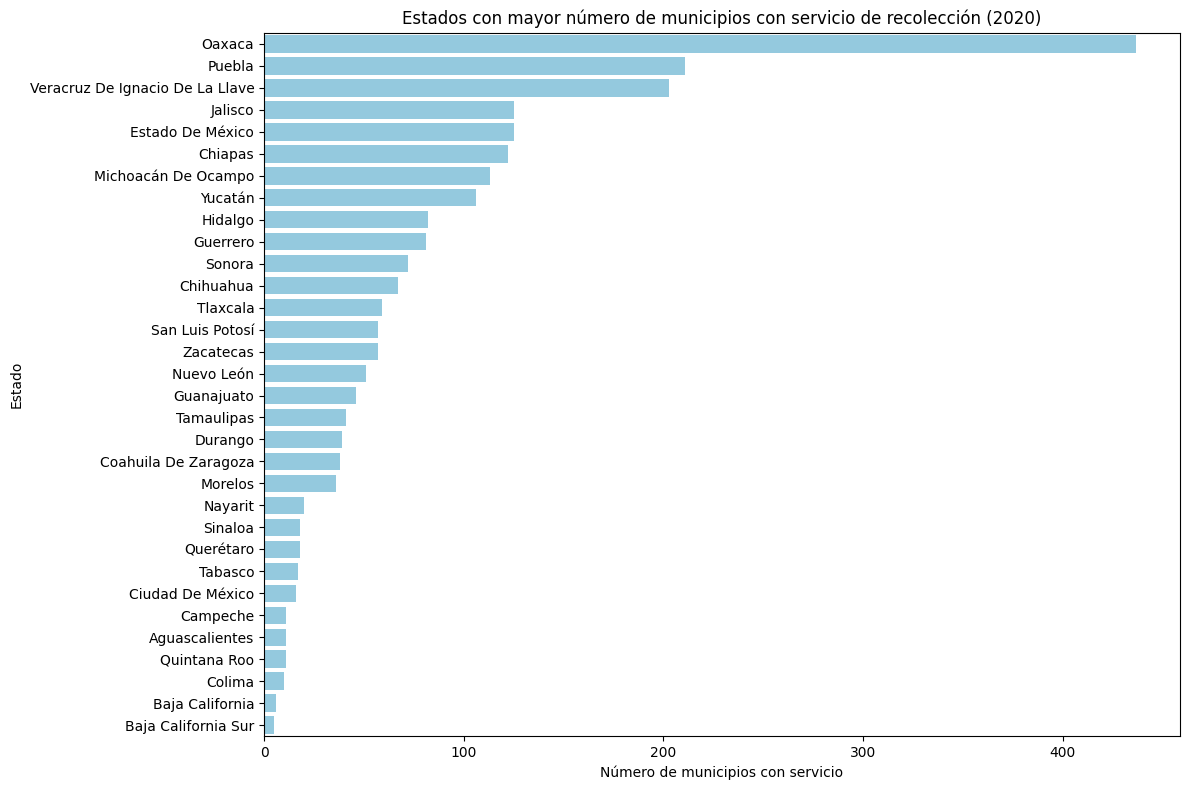

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenamos el DataFrame
df_sorted = df_disp_reco.sort_values('Con servicios de recoleccion residuos solidos urbanos', ascending=False)

# Crear el gráfico
plt.figure(figsize=(12,8))
sns.barplot(data=df_sorted,
            x='Con servicios de recoleccion residuos solidos urbanos',
            y='Estado',
            color='skyblue')
plt.title('Estados con mayor número de municipios con servicio de recolección (2020)')
plt.xlabel('Número de municipios con servicio')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

<ipython-input-126-22e5e0cfe160>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




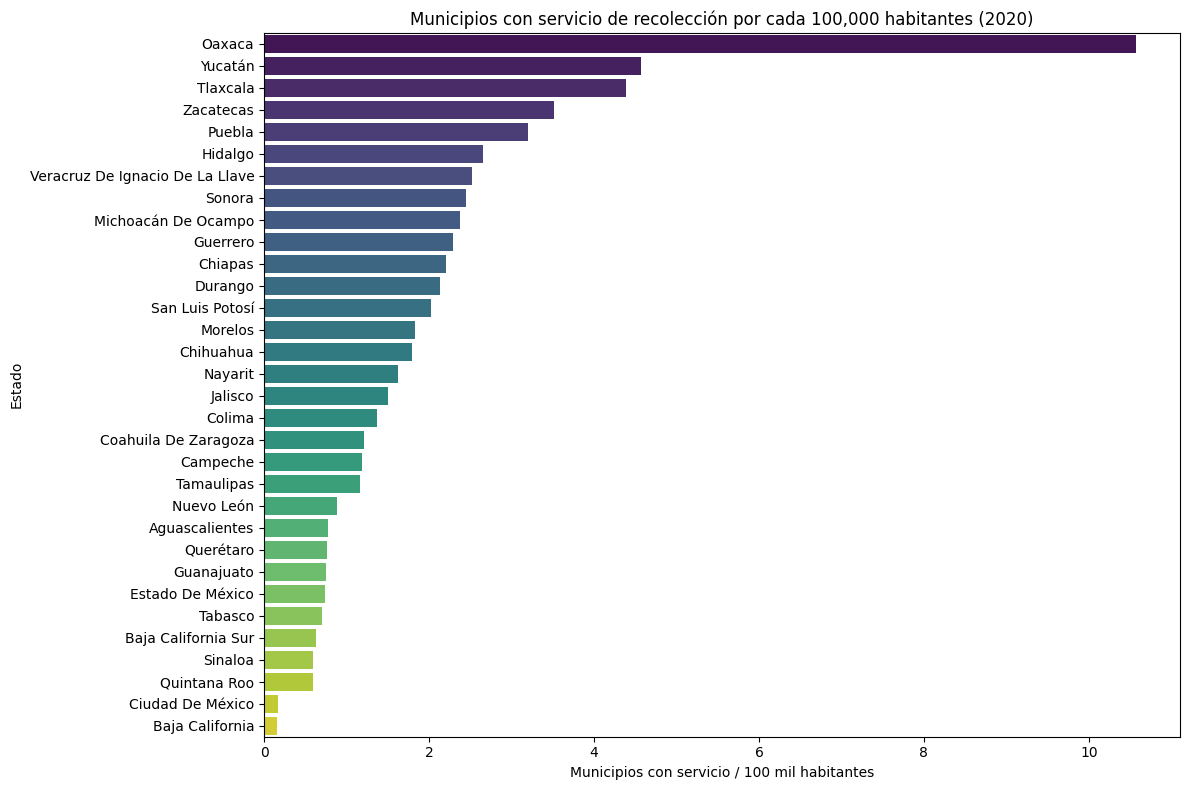

In [ ]:
# Calculamos el porcentaje de municipios con servicio por cada 100,000 habitantes (como ejemplo)
df['Municipios con servicio por 100 mil habitantes'] = (
    df['Con servicios de recoleccion residuos solidos urbanos'] / df['Poblacion']
) * 100000
# Ordenamos por la nueva métrica
df_sorted = df.sort_values('Municipios con servicio por 100 mil habitantes', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(data=df_sorted,
            x='Municipios con servicio por 100 mil habitantes',
            y='Estado',
            palette='viridis')
plt.title('Municipios con servicio de recolección por cada 100,000 habitantes (2020)')
plt.xlabel('Municipios con servicio / 100 mil habitantes')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()



<ipython-input-127-1a62c6b01c23>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




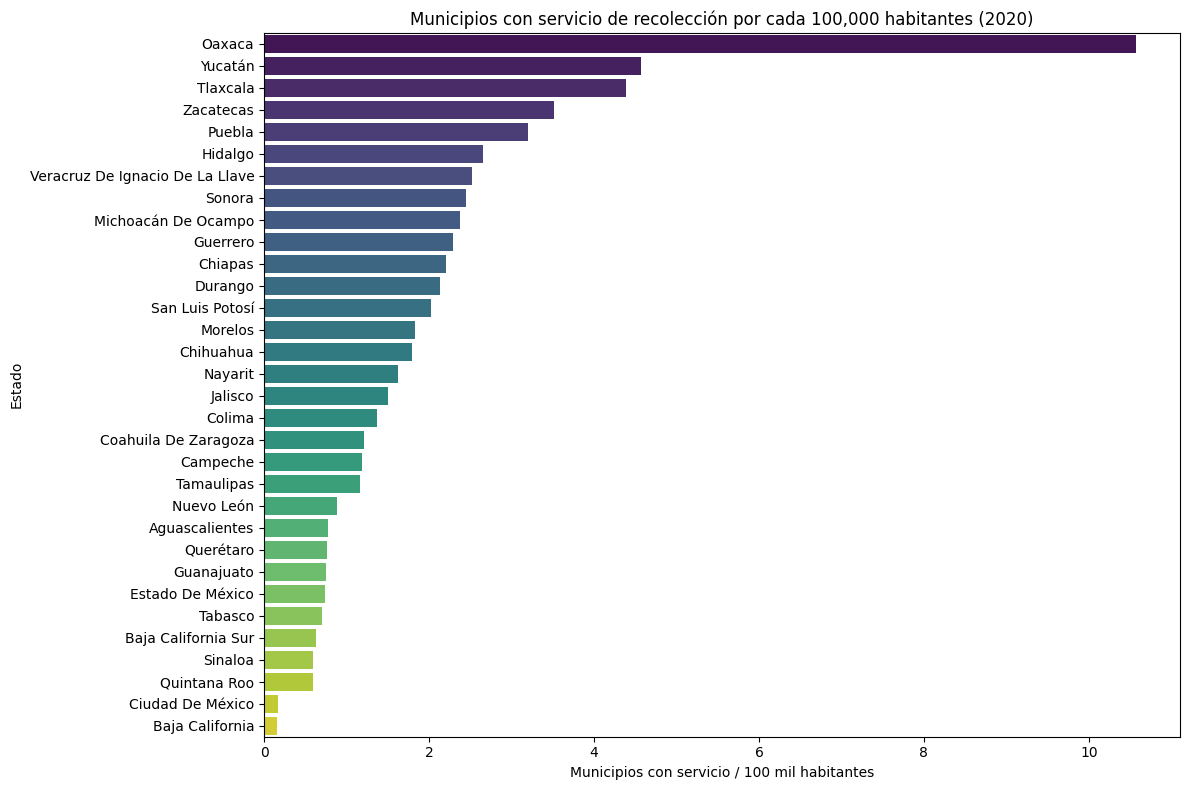

In [ ]:
# Ordenamos por la nueva métrica
df_comparado_sorted = df.sort_values('Municipios con servicio por 100 mil habitantes', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(data=df_comparado_sorted,
            x='Municipios con servicio por 100 mil habitantes',
            y='Estado',
            palette='viridis')
plt.title('Municipios con servicio de recolección por cada 100,000 habitantes (2020)')
plt.xlabel('Municipios con servicio / 100 mil habitantes')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()


Analisis cantidad de residuos vs servicios de recoleccion

<ipython-input-128-3764183ba7c0>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




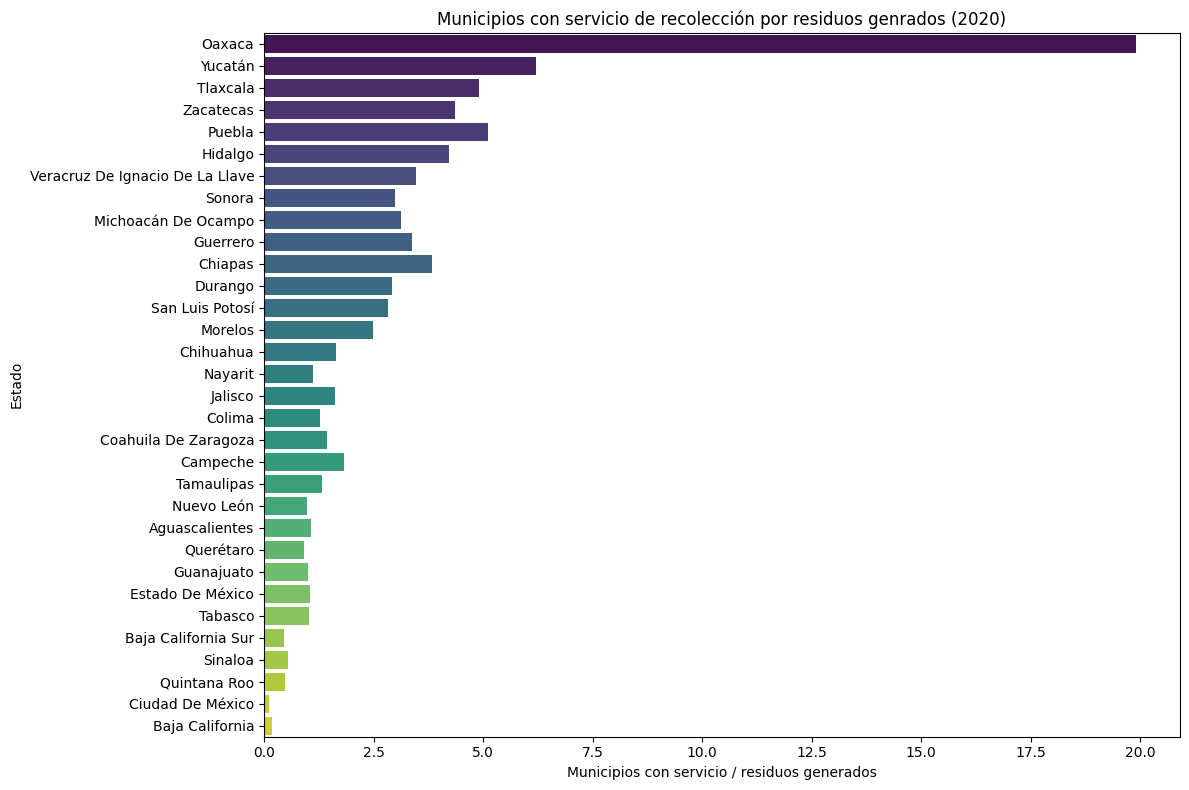

In [ ]:
# Ordenamos el DataFrame
df_sorted = df_disp_reco.sort_values('Con servicios de recoleccion residuos solidos urbanos', ascending=False)
# Calculamos el porcentaje de municipios con servicio por cada 100,000 habitantes (como ejemplo)
df['Municipios con servicio por residuos generados'] = (
    df['Con servicios de recoleccion residuos solidos urbanos'] / df['Promedio diario de residuos sólidos urbanos recolectados']
) * 100000
# Ordenamos por la nueva métrica
df_sorted = df.sort_values('Municipios con servicio por 100 mil habitantes', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(data=df_sorted,
            x='Municipios con servicio por residuos generados',
            y='Estado',
            palette='viridis')
plt.title('Municipios con servicio de recolección por residuos genrados (2020)')
plt.xlabel('Municipios con servicio / residuos generados')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()


Tipo de sistema de recoleccion

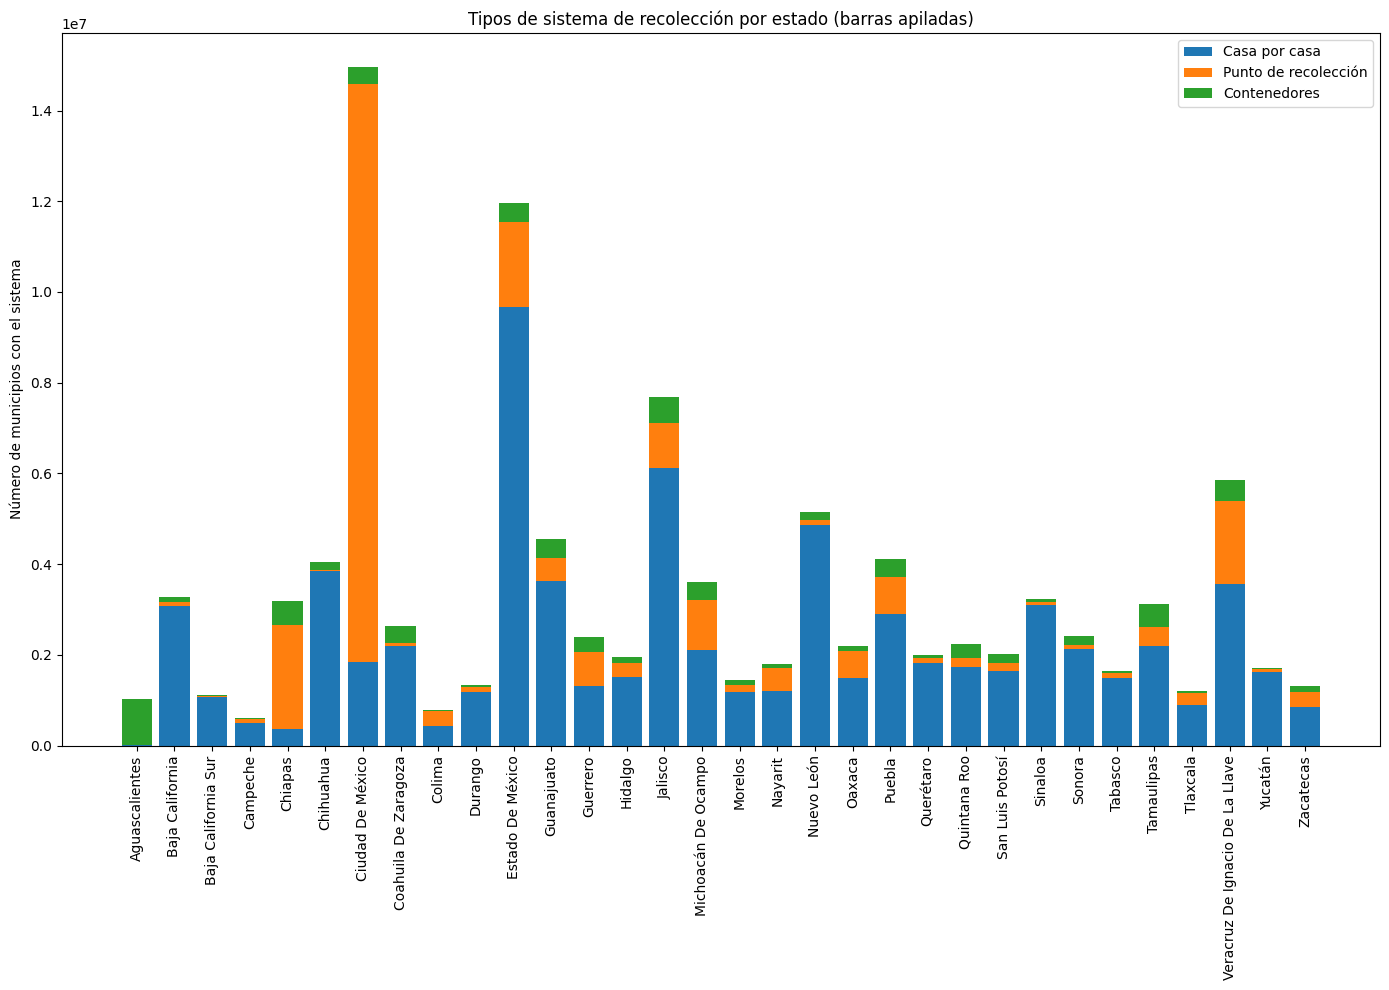

In [ ]:
# Crear gráfico de barras apiladas
plt.figure(figsize=(14, 10))

# Apilamos los datos
plt.bar(df['Estado'], df['Sistema de recoleccion casa por casa'], label='Casa por casa')
plt.bar(df['Estado'], df['Sistema de recoleccion En un punto de recoleccion'],
        bottom=df['Sistema de recoleccion casa por casa'], label='Punto de recolección')
plt.bar(df['Estado'], df['Sistema de recoleccion Sistema de contenedores'],
        bottom=df['Sistema de recoleccion casa por casa'] + df['Sistema de recoleccion En un punto de recoleccion'],
        label='Contenedores')

plt.xticks(rotation=90)
plt.ylabel('Número de municipios con el sistema')
plt.title('Tipos de sistema de recolección por estado (barras apiladas)')
plt.legend()
plt.tight_layout()
plt.savefig("barras apiladas.png")
plt.show()


Vehiculos

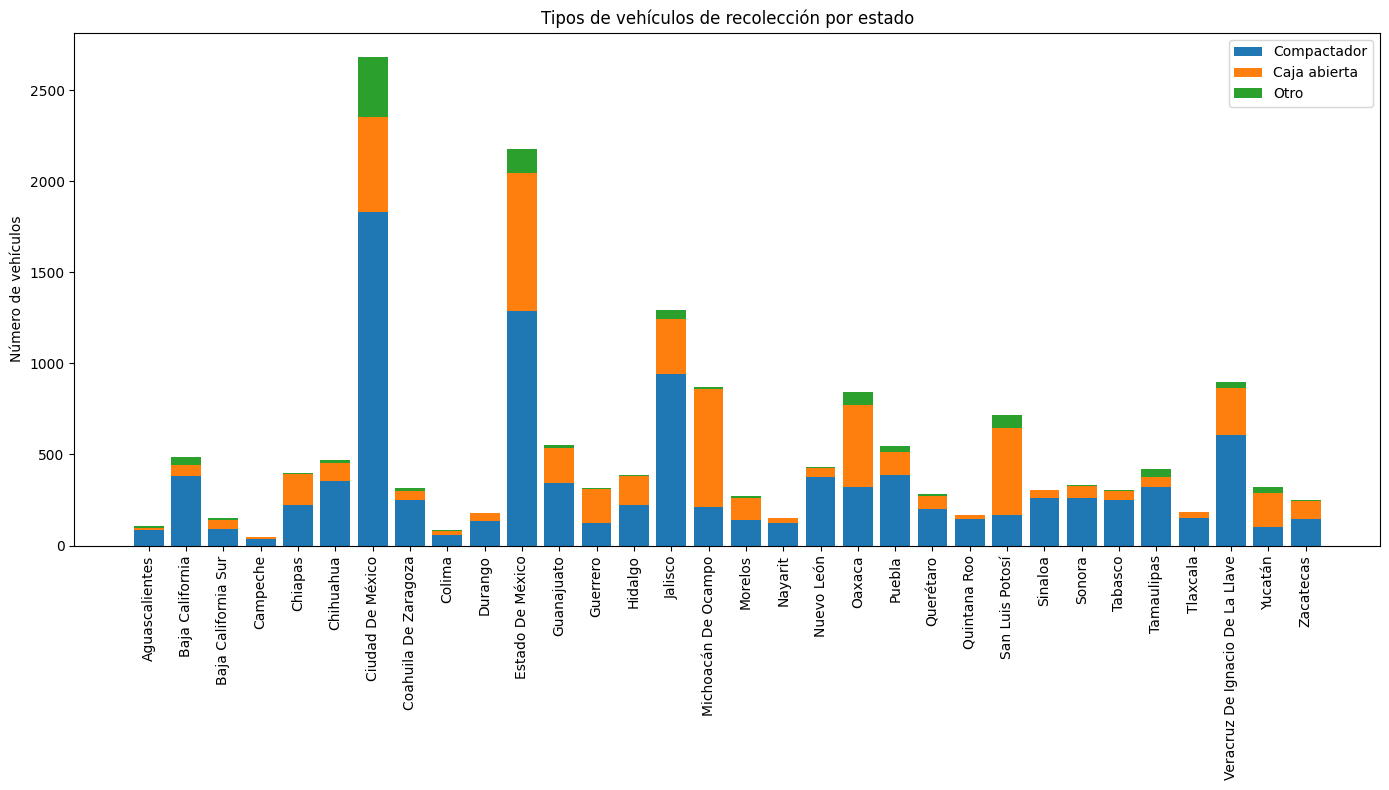

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(df['Estado'], df['Vehículo con compactador'], label='Compactador')
plt.bar(df['Estado'], df['Vehículo con caja abierta'],
        bottom=df['Vehículo con compactador'], label='Caja abierta')
plt.bar(df['Estado'], df['Vehiculos: Otro'],
        bottom=df['Vehículo con compactador'] + df['Vehículo con caja abierta'], label='Otro')

plt.xticks(rotation=90)
plt.ylabel('Número de vehículos')
plt.title('Tipos de vehículos de recolección por estado')
plt.legend()
plt.tight_layout()
plt.savefig("barras apiladas vehiculos.png")
plt.show()


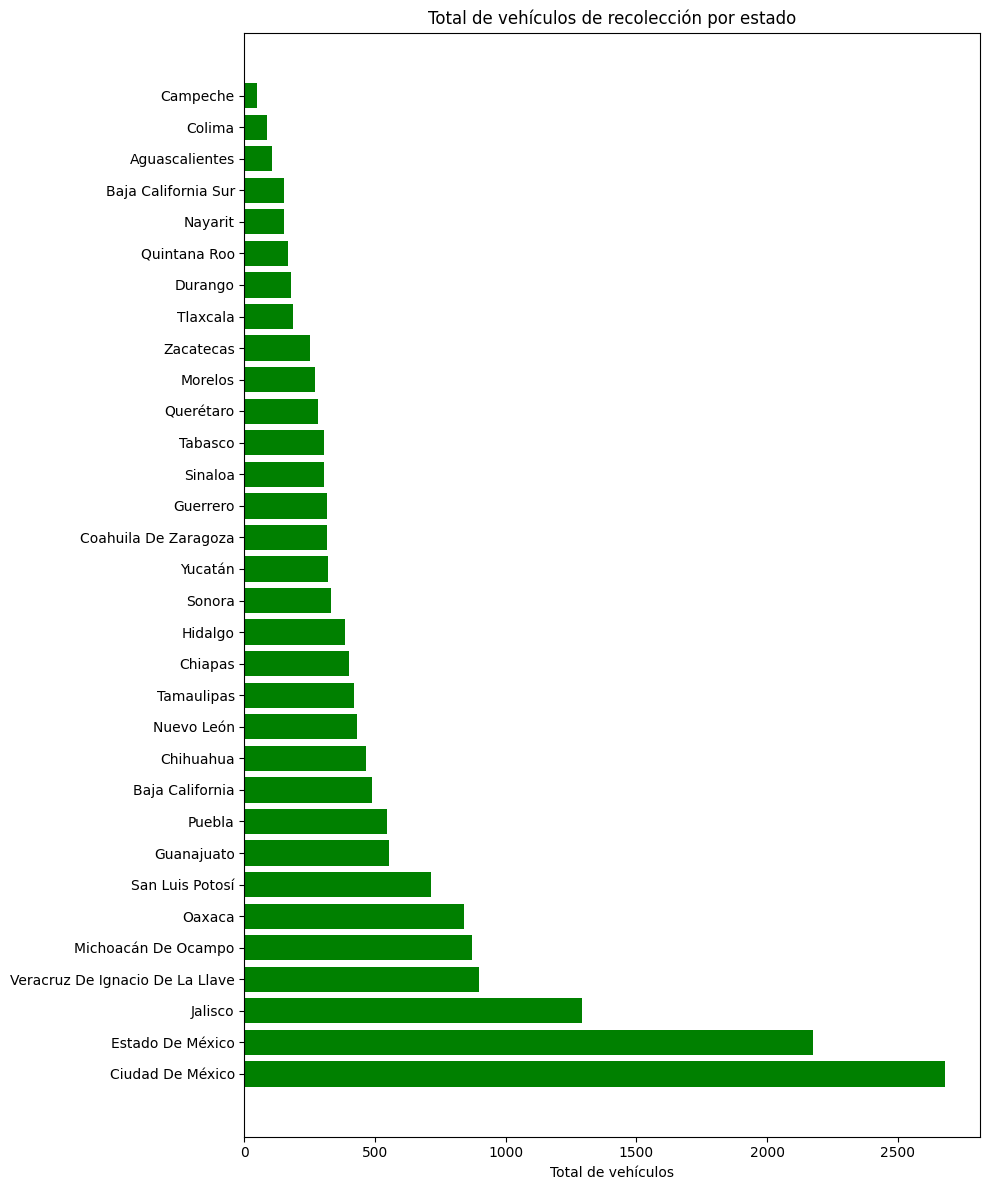

In [ ]:
df_sorted = df.sort_values(by='Total Vehiculos', ascending=False)

plt.figure(figsize=(10, 12))
plt.barh(df_sorted['Estado'], df_sorted['Total Vehiculos'], color='green')
plt.xlabel('Total de vehículos')
plt.title('Total de vehículos de recolección por estado')
plt.tight_layout()
plt.savefig("barras apiladas cantidad vehiculos.png")
plt.show()


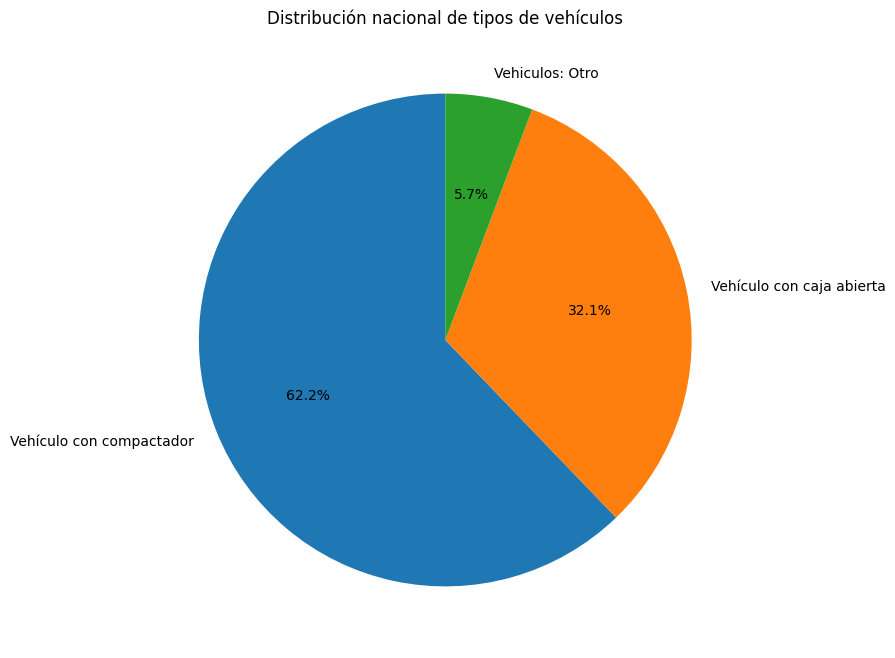

In [ ]:
vehiculos_nacional = df[['Vehículo con compactador', 'Vehículo con caja abierta', 'Vehiculos: Otro']].sum()

plt.figure(figsize=(8, 8))
plt.pie(vehiculos_nacional, labels=vehiculos_nacional.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución nacional de tipos de vehículos')
plt.savefig("pie vehiculos.png")
plt.show()


Materiales recibidos

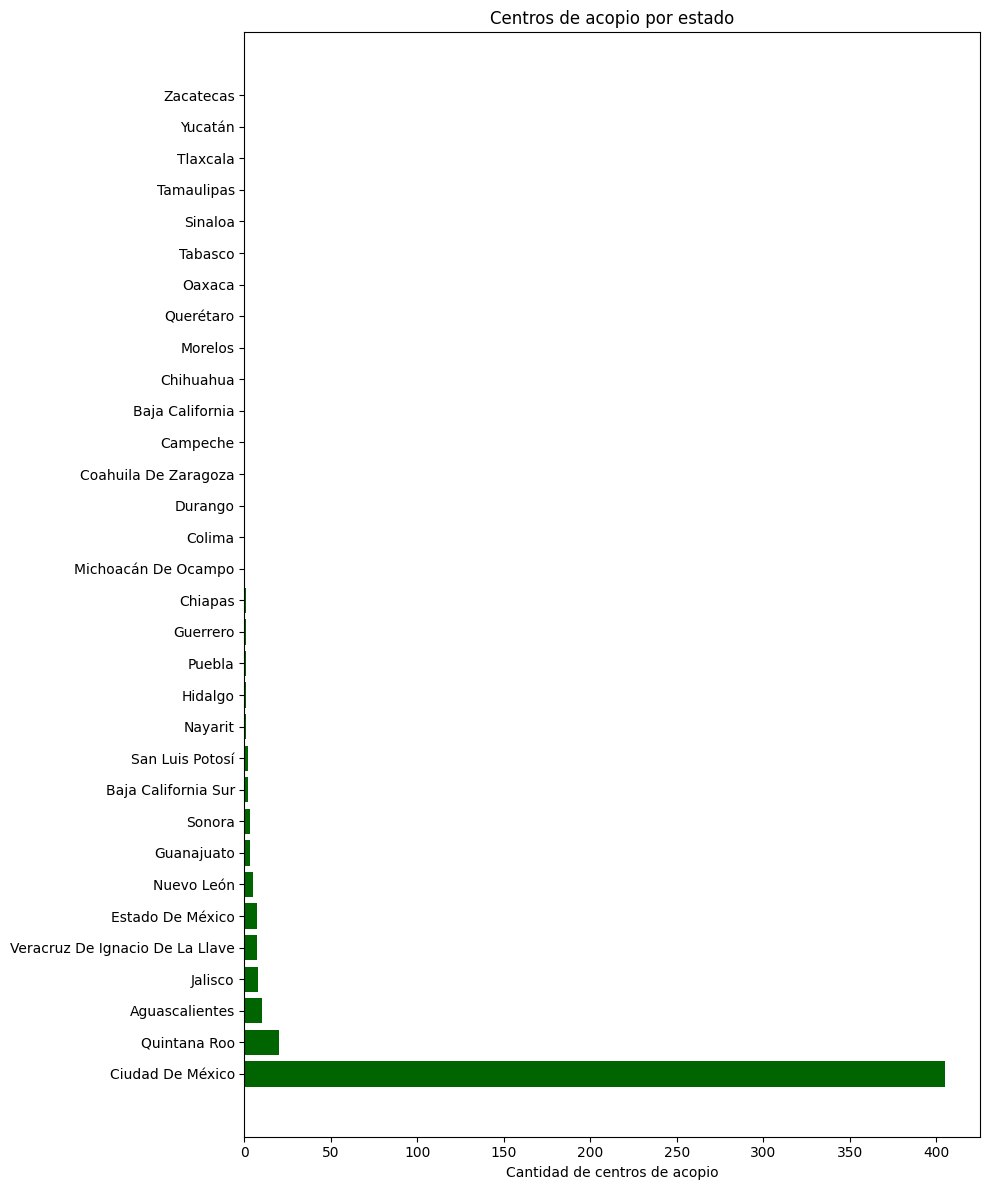

In [ ]:
df_sorted = df.sort_values(by='Cantidad Centros de acopio', ascending=False)

plt.figure(figsize=(10, 12))
plt.barh(df_sorted['Estado'], df_sorted['Cantidad Centros de acopio'], color='darkgreen')
plt.xlabel('Cantidad de centros de acopio')
plt.title('Centros de acopio por estado')
plt.tight_layout()
plt.savefig("barras apiladas centros.png")
plt.show()



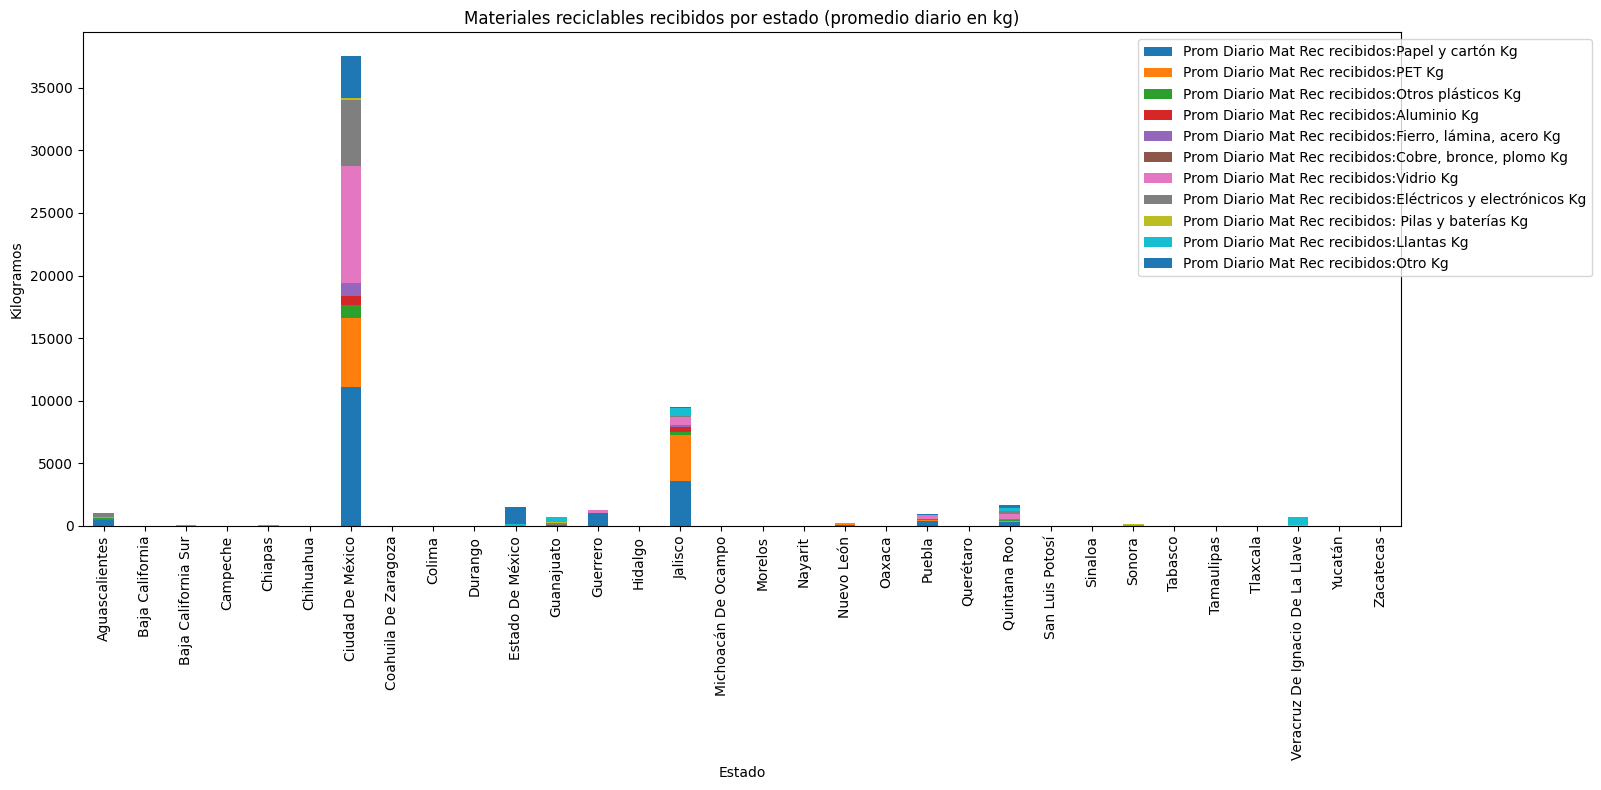

In [ ]:
materiales = [
    'Prom Diario Mat Rec recibidos:Papel y cartón Kg',
    'Prom Diario Mat Rec recibidos:PET Kg',
    'Prom Diario Mat Rec recibidos:Otros plásticos Kg',
    'Prom Diario Mat Rec recibidos:Aluminio Kg',
    'Prom Diario Mat Rec recibidos:Fierro, lámina, acero Kg',
    'Prom Diario Mat Rec recibidos:Cobre, bronce, plomo Kg',
    'Prom Diario Mat Rec recibidos:Vidrio Kg',
    'Prom Diario Mat Rec recibidos:Eléctricos y electrónicos Kg',
    'Prom Diario Mat Rec recibidos: Pilas y baterías Kg',
    'Prom Diario Mat Rec recibidos:Llantas Kg',
    'Prom Diario Mat Rec recibidos:Otro Kg'
]

df_materiales = df.set_index('Estado')[materiales]

df_materiales.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Materiales reciclables recibidos por estado (promedio diario en kg)')
plt.ylabel('Kilogramos')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.savefig("barras apiladas materiales.png")
plt.show()


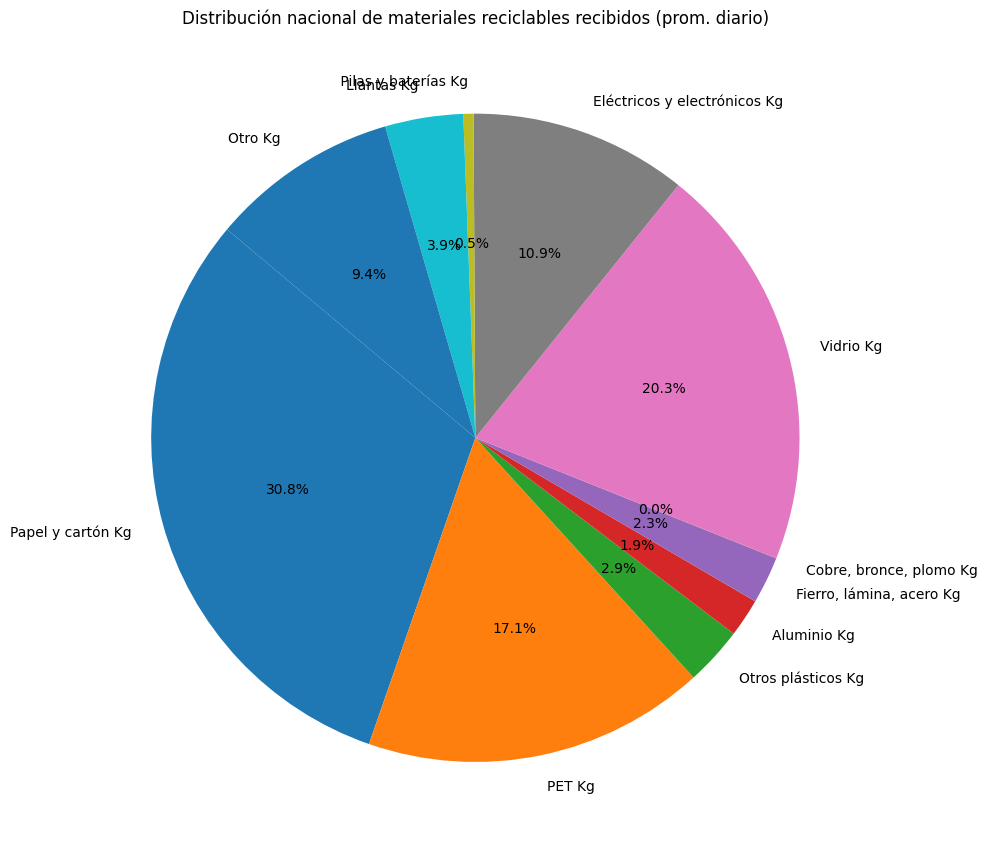

In [ ]:
df_total_nacional = df[materiales].sum()

plt.figure(figsize=(10, 10))
plt.pie(df_total_nacional, labels=df_total_nacional.index.str.replace('Prom Diario Mat Rec recibidos:', ''),
        autopct='%1.1f%%', startangle=140)
plt.title('Distribución nacional de materiales reciclables recibidos (prom. diario)')
plt.tight_layout()
plt.savefig("pie materiales.png")
plt.show()


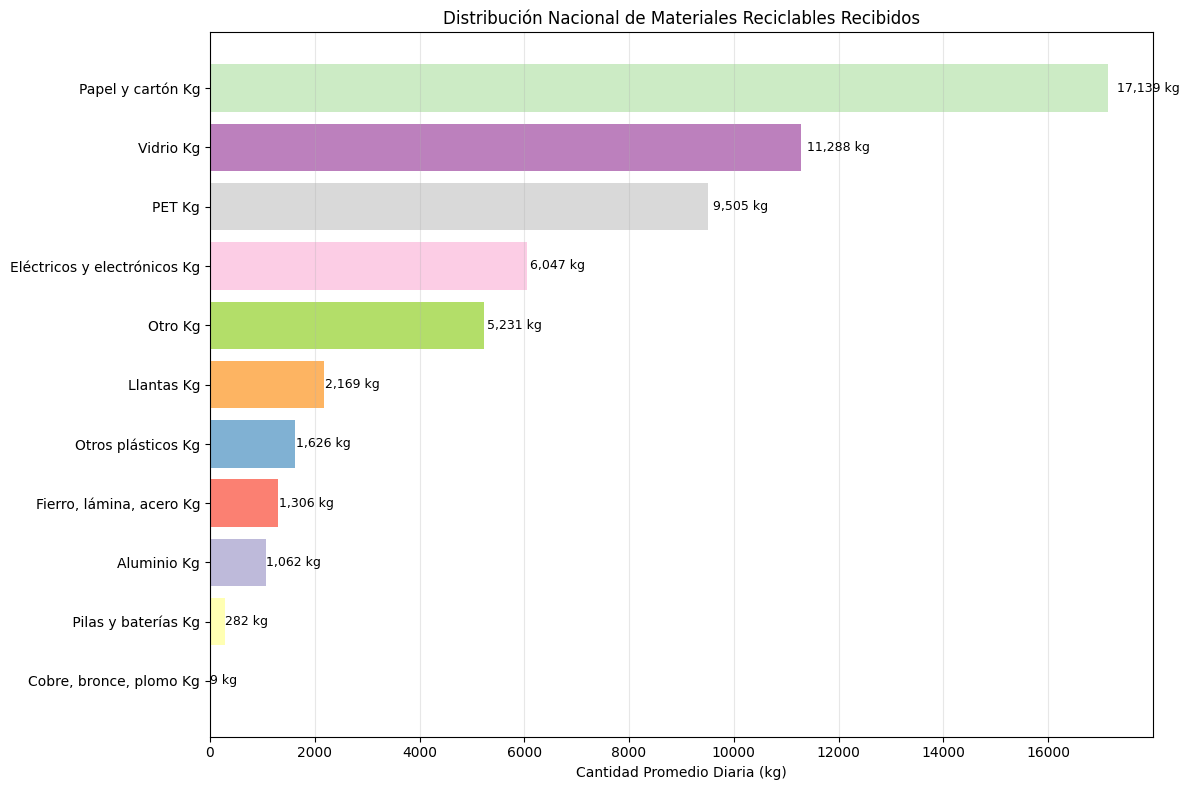

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar datos
df_total_nacional = df[materiales].sum()

# Limpiar nombres de materiales (quitar prefijo)
materiales_limpios = df_total_nacional.index.str.replace('Prom Diario Mat Rec recibidos:', '')

# Crear DataFrame para facilitar la visualización
df_plot = pd.DataFrame({
    'Material': materiales_limpios,
    'Cantidad': df_total_nacional.values
}).sort_values('Cantidad', ascending=True)  # Ordenar de menor a mayor

# Gráfico de barras horizontales
plt.figure(figsize=(12, 8))
bars = plt.barh(df_plot['Material'], df_plot['Cantidad'],
                color=plt.cm.Set3(range(len(df_plot))))

# Añadir valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f} kg', ha='left', va='center', fontsize=9)

plt.xlabel('Cantidad Promedio Diaria (kg)')
plt.title('Distribución Nacional de Materiales Reciclables Recibidos')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig("barras_materiales.png", dpi=300, bbox_inches='tight')
plt.show()

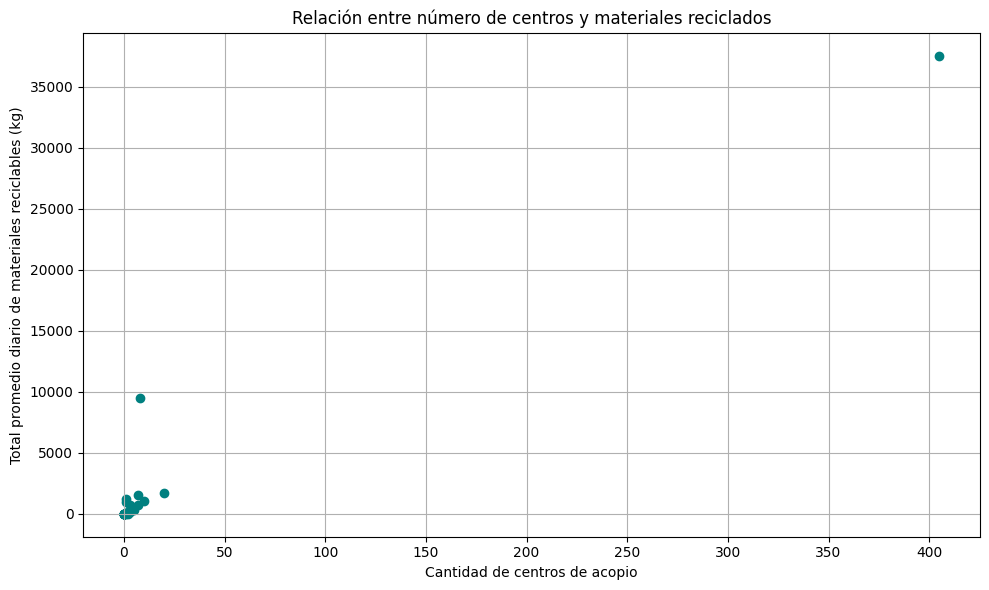

In [ ]:
df['Total materiales recibidos'] = df[materiales].sum(axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(df['Cantidad Centros de acopio'], df['Total materiales recibidos'], color='teal')
plt.xlabel('Cantidad de centros de acopio')
plt.ylabel('Total promedio diario de materiales reciclables (kg)')
plt.title('Relación entre número de centros y materiales reciclados')
plt.grid(True)
plt.tight_layout()
plt.savefig("scatter materiales.png")
plt.show()


MATERIALES RECOGIDOS DE MANERA SELECTIVA

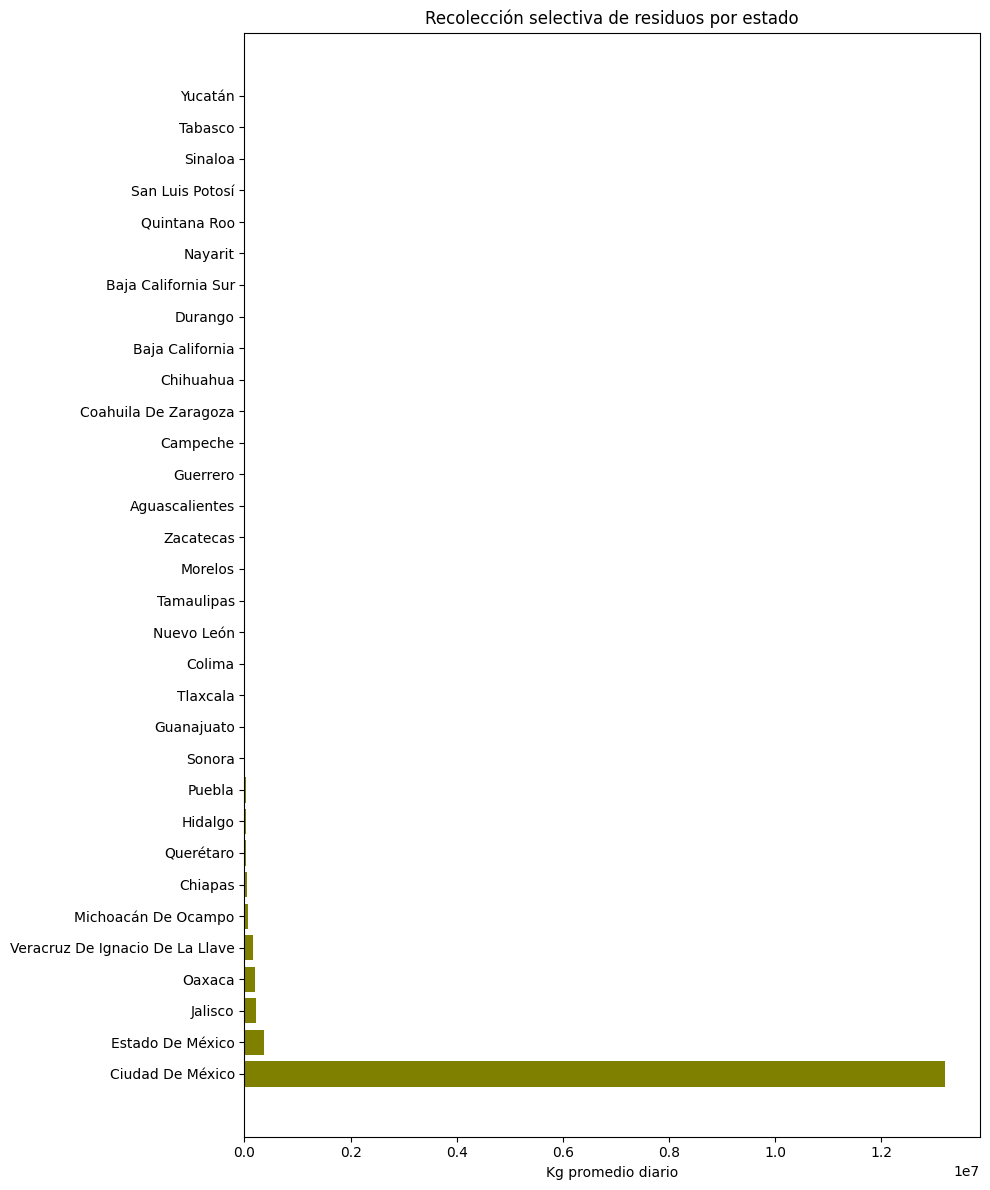

In [ ]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values(by='Cantidad promedio diaria de residuos recolectados de manera selectiva', ascending=False)

plt.figure(figsize=(10, 12))
plt.barh(df_sorted['Estado'], df_sorted['Cantidad promedio diaria de residuos recolectados de manera selectiva'], color='olive')
plt.xlabel('Kg promedio diario')
plt.title('Recolección selectiva de residuos por estado')
plt.tight_layout()
plt.savefig("barras apiladas recoleccion selectiva.png")
plt.show()


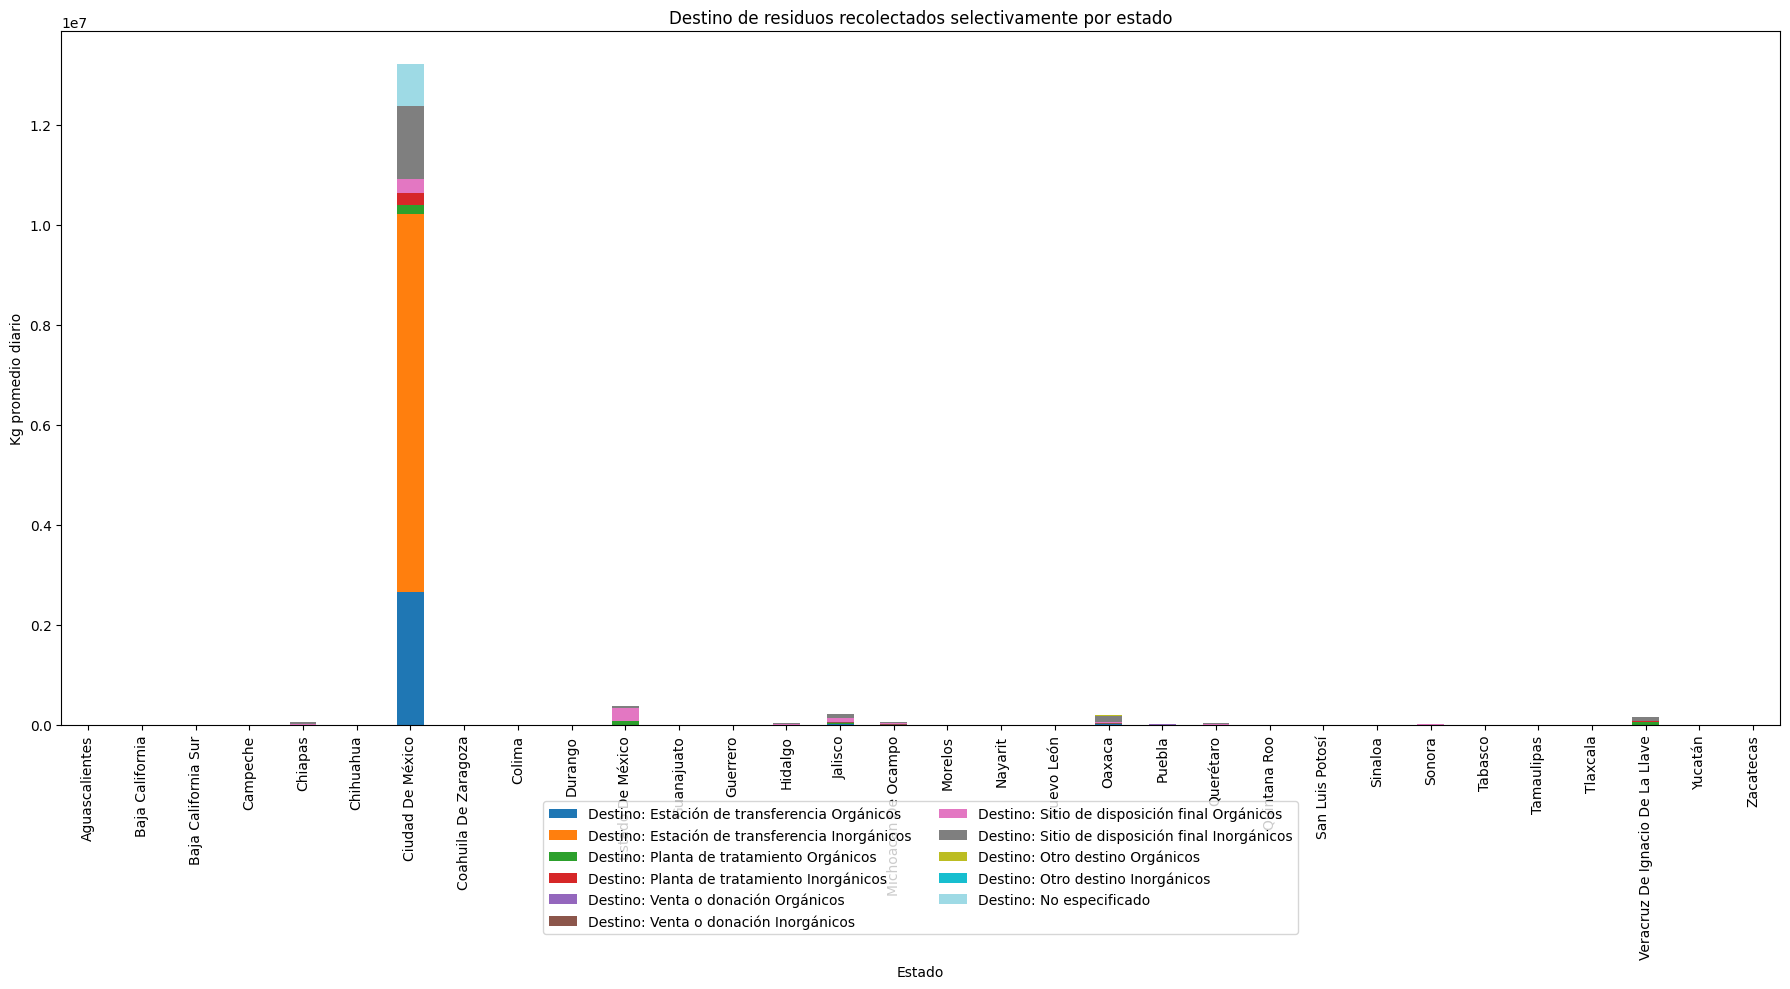

In [ ]:
destinos = [
    'Destino: Estación de transferencia Orgánicos',
    'Destino: Estación de transferencia Inorgánicos',
    'Destino: Planta de tratamiento Orgánicos',
    'Destino: Planta de tratamiento Inorgánicos',
    'Destino: Venta o donación Orgánicos',
    'Destino: Venta o donación Inorgánicos',
    'Destino: Sitio de disposición final Orgánicos',
    'Destino: Sitio de disposición final Inorgánicos',
    'Destino: Otro destino Orgánicos',
    'Destino: Otro destino Inorgánicos',
    'Destino: No especificado'
]

df_destinos = df.set_index('Estado')[destinos]

df_destinos.plot(kind='bar', stacked=True, figsize=(18, 10), colormap='tab20')
plt.title('Destino de residuos recolectados selectivamente por estado')
plt.ylabel('Kg promedio diario')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.tight_layout()
plt.savefig("11barras apiladas recoleccion selectiva.png")
plt.show()


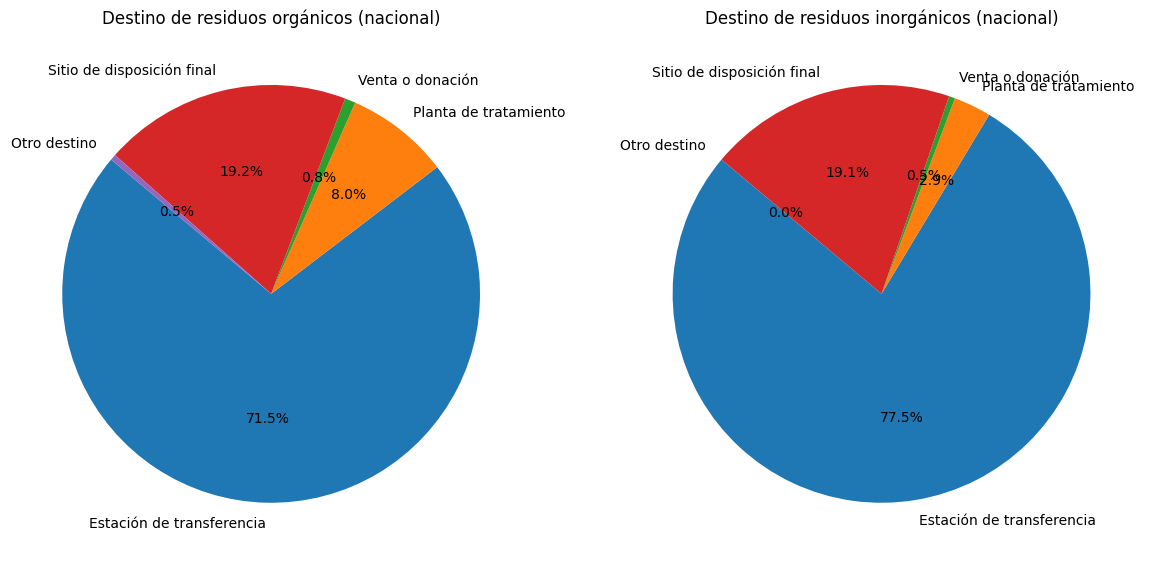

In [ ]:
# Total nacional por tipo de destino
orgánicos_cols = [col for col in destinos if 'Orgánicos' in col]
inorgánicos_cols = [col for col in destinos if 'Inorgánicos' in col]

orgánicos_sum = df[orgánicos_cols].sum()
inorgánicos_sum = df[inorgánicos_cols].sum()

# Pie chart orgánicos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(orgánicos_sum, labels=[col.replace('Destino: ', '').replace(' Orgánicos', '') for col in orgánicos_sum.index],
        autopct='%1.1f%%', startangle=140)
plt.title('Destino de residuos orgánicos (nacional)')

# Pie chart inorgánicos
plt.subplot(1, 2, 2)
plt.pie(inorgánicos_sum, labels=[col.replace('Destino: ', '').replace(' Inorgánicos', '') for col in inorgánicos_sum.index],
        autopct='%1.1f%%', startangle=140)
plt.title('Destino de residuos inorgánicos (nacional)')
plt.tight_layout()
plt.savefig("pie recoleccion selectiva.png")
plt.show()


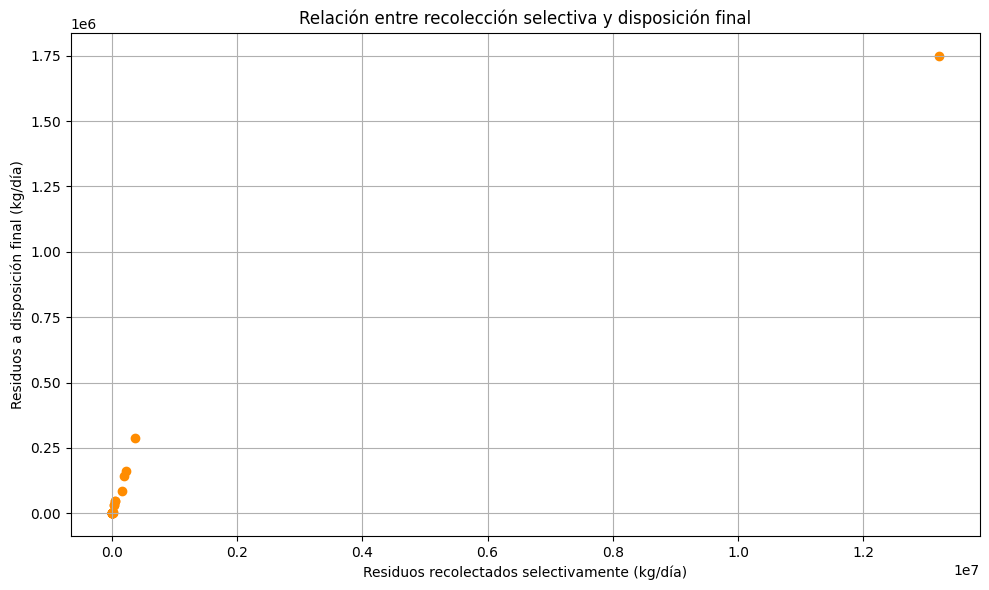

In [ ]:
df['Total disposición final'] = df[['Destino: Sitio de disposición final Orgánicos',
                                    'Destino: Sitio de disposición final Inorgánicos']].sum(axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(df['Cantidad promedio diaria de residuos recolectados de manera selectiva'],
            df['Total disposición final'], color='darkorange')
plt.xlabel('Residuos recolectados selectivamente (kg/día)')
plt.ylabel('Residuos a disposición final (kg/día)')
plt.title('Relación entre recolección selectiva y disposición final')
plt.grid(True)
plt.tight_layout()
plt.savefig("scatter recoleccion selectiva.png")
plt.show()


ESTACIONES DE TRANSFERENCIA

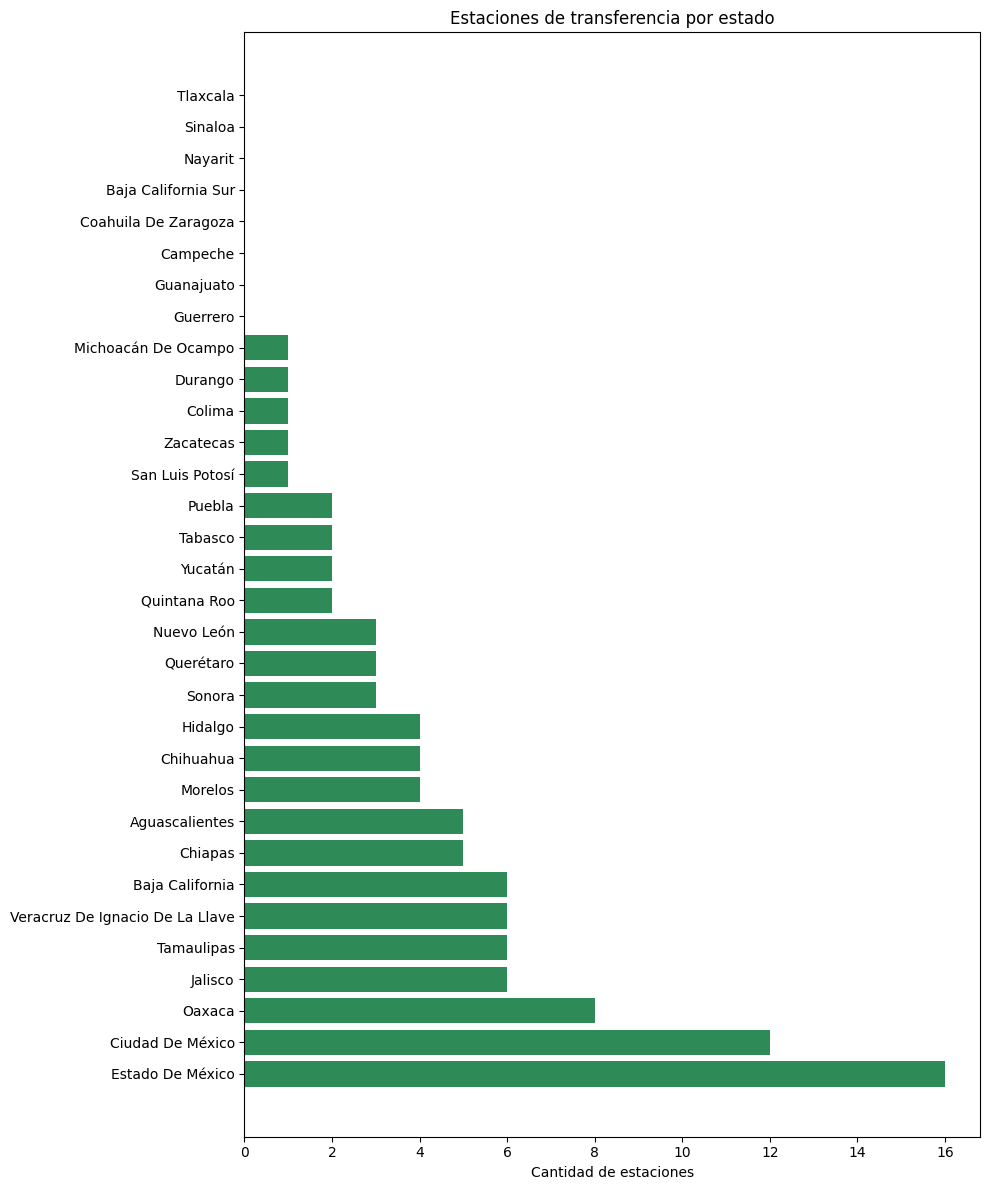

In [ ]:

df_sorted = df.sort_values(by='Estaciones de transferencia', ascending=False)

plt.figure(figsize=(10, 12))
plt.barh(df_sorted['Estado'], df_sorted['Estaciones de transferencia'], color='seagreen')
plt.xlabel('Cantidad de estaciones')
plt.title('Estaciones de transferencia por estado')
plt.tight_layout()
plt.savefig("12barras apiladas recoleccion selectiva.png")
plt.show()


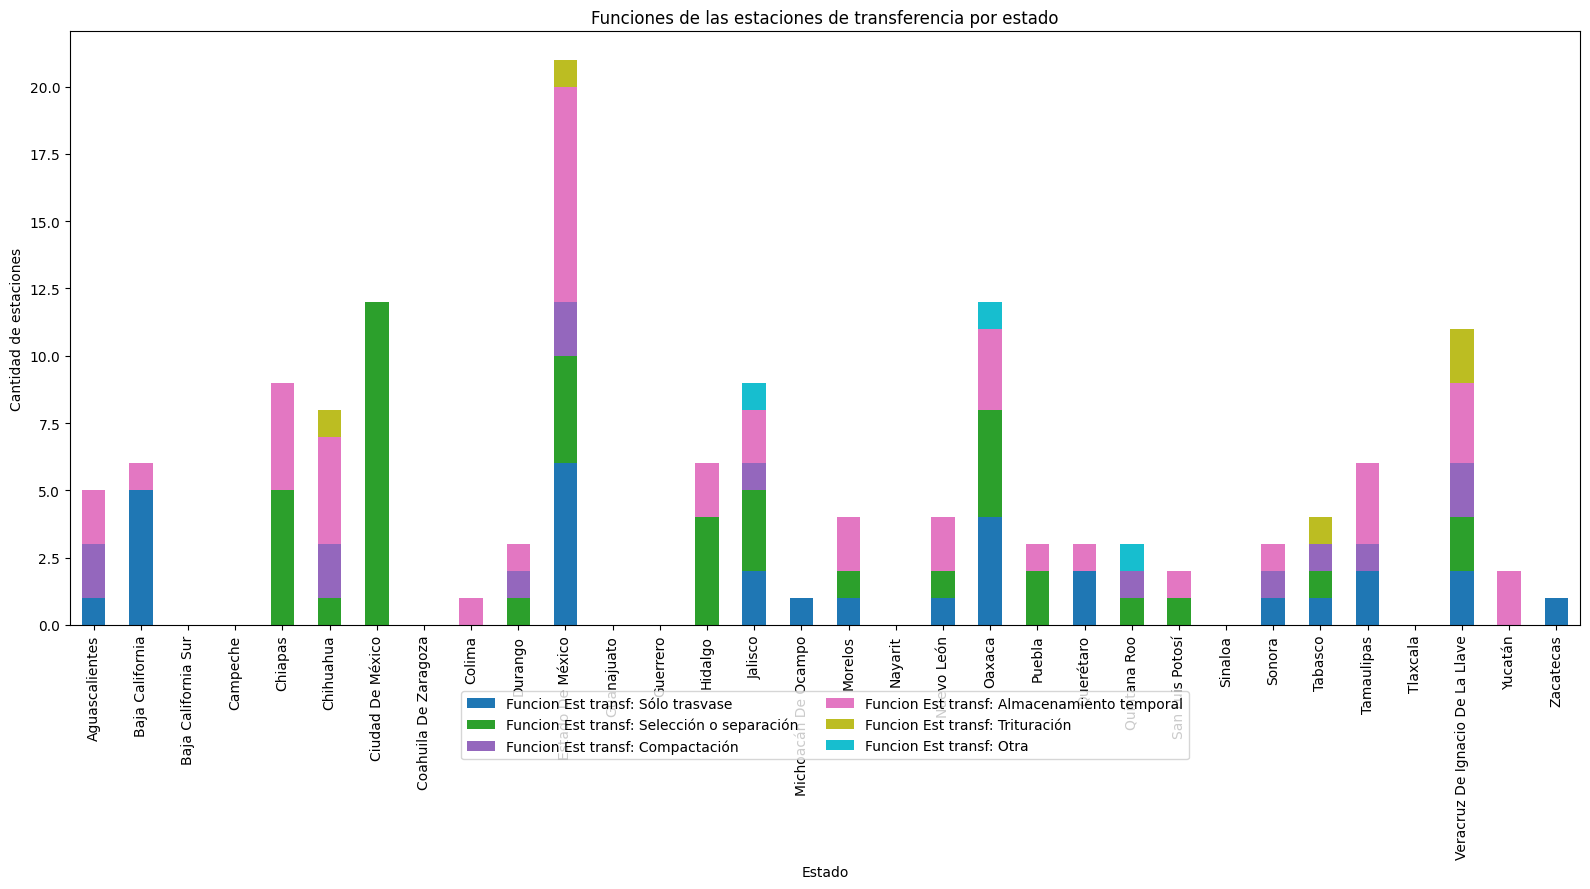

In [ ]:
funciones = [
    'Funcion Est transf: Sólo trasvase',
    'Funcion Est transf: Selección o separación',
    'Funcion Est transf: Compactación',
    'Funcion Est transf: Almacenamiento temporal',
    'Funcion Est transf: Trituración',
    'Funcion Est transf: Otra'
]

df_funciones = df.set_index('Estado')[funciones]

df_funciones.plot(kind='bar', stacked=True, figsize=(16, 9), colormap='tab10')
plt.title('Funciones de las estaciones de transferencia por estado')
plt.ylabel('Cantidad de estaciones')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.tight_layout()
plt.savefig("13barras apiladas recoleccion selectiva.png")
plt.show()


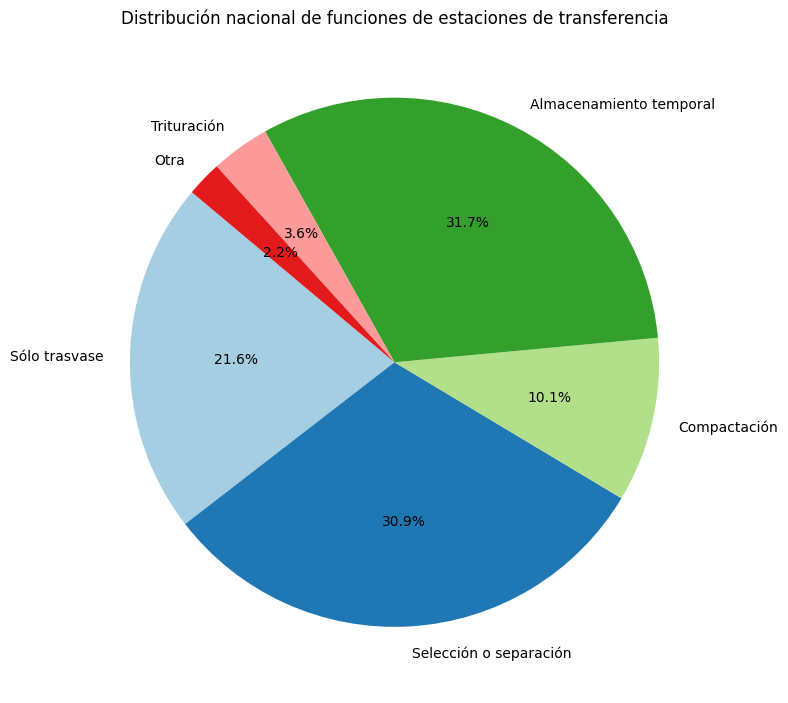

In [ ]:
df_total_funciones = df[funciones].sum()

plt.figure(figsize=(8, 8))
plt.pie(df_total_funciones, labels=[f.replace('Funcion Est transf: ', '') for f in funciones],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribución nacional de funciones de estaciones de transferencia')
plt.tight_layout()
plt.savefig("1pie recoleccion selectiva.png")
plt.show()


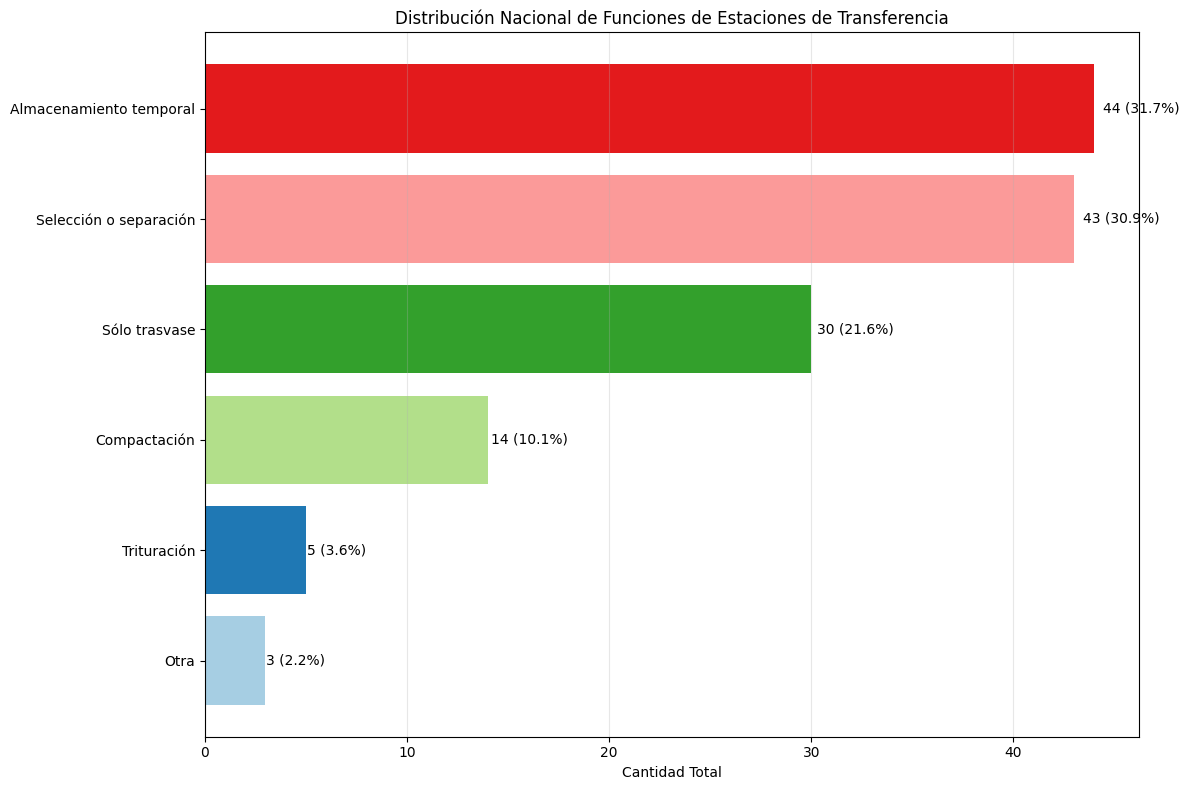

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar datos
df_total_funciones = df[funciones].sum()

# Limpiar nombres de funciones
funciones_limpias = [f.replace('Funcion Est transf: ', '') for f in funciones]

# Crear DataFrame ordenado
df_plot = pd.DataFrame({
    'Funcion': funciones_limpias,
    'Cantidad': df_total_funciones.values
}).sort_values('Cantidad', ascending=True)  # Ordenar de menor a mayor

# Gráfico de barras horizontales
plt.figure(figsize=(12, 8))
bars = plt.barh(df_plot['Funcion'], df_plot['Cantidad'],
                color=plt.cm.Paired(range(len(df_plot))))

# Añadir valores y porcentajes en las barras
total = df_plot['Cantidad'].sum()
for bar in bars:
    width = bar.get_width()
    porcentaje = (width / total) * 100
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f} ({porcentaje:.1f}%)',
             ha='left', va='center', fontsize=10)

plt.xlabel('Cantidad Total')
plt.title('Distribución Nacional de Funciones de Estaciones de Transferencia')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig("barras_funciones_transferencia.png", dpi=300, bbox_inches='tight')
plt.show()

MATERIALES CLASIFICADOS

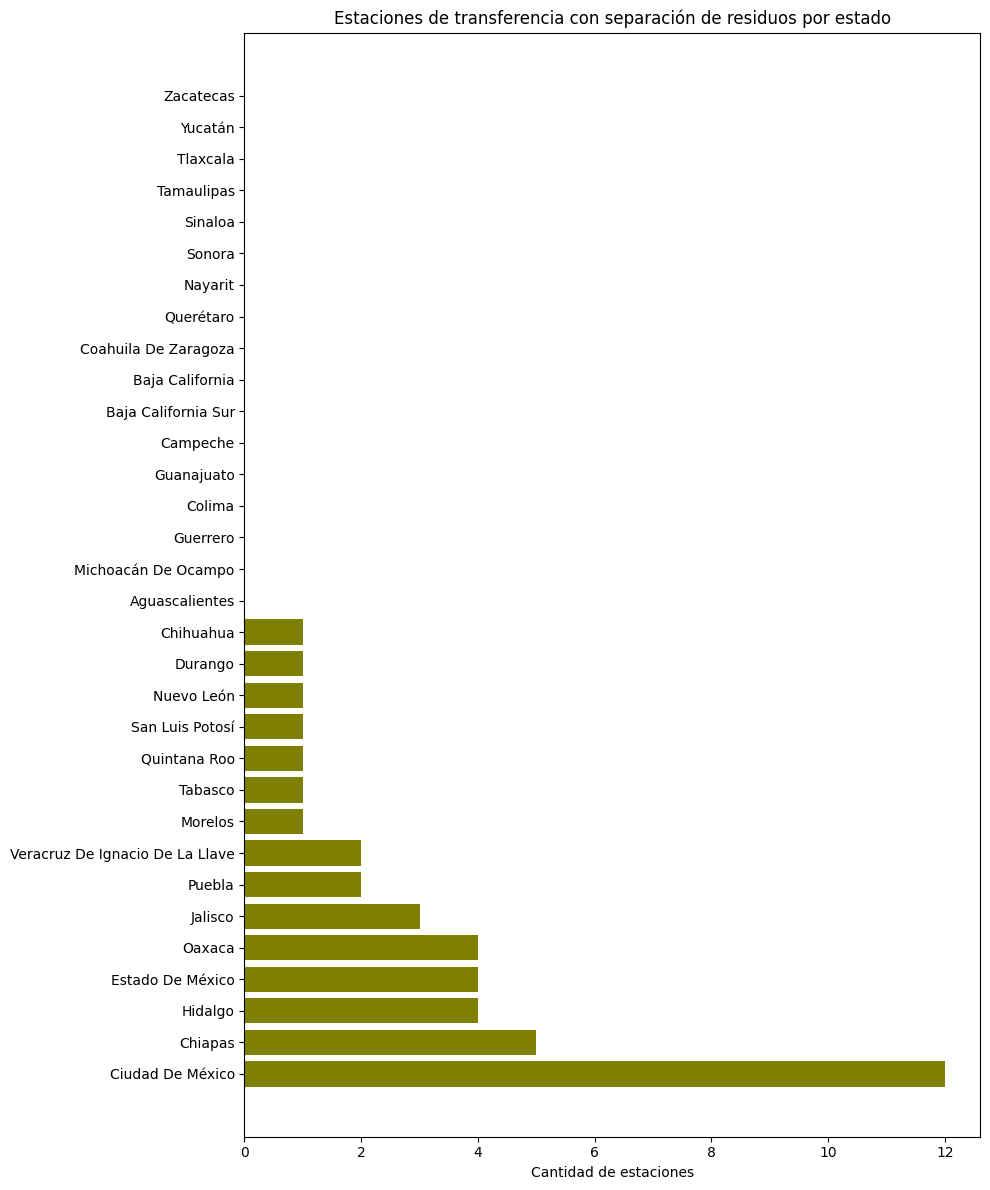

In [ ]:
df_sorted = df.sort_values(by='Estaciones de transferencia con separación de residuos', ascending=False)

plt.figure(figsize=(10, 12))
plt.barh(df_sorted['Estado'], df_sorted['Estaciones de transferencia con separación de residuos'], color='olive')
plt.xlabel('Cantidad de estaciones')
plt.title('Estaciones de transferencia con separación de residuos por estado')
plt.tight_layout()
plt.savefig("14barras apiladas recoleccion selectiva.png")
plt.show()


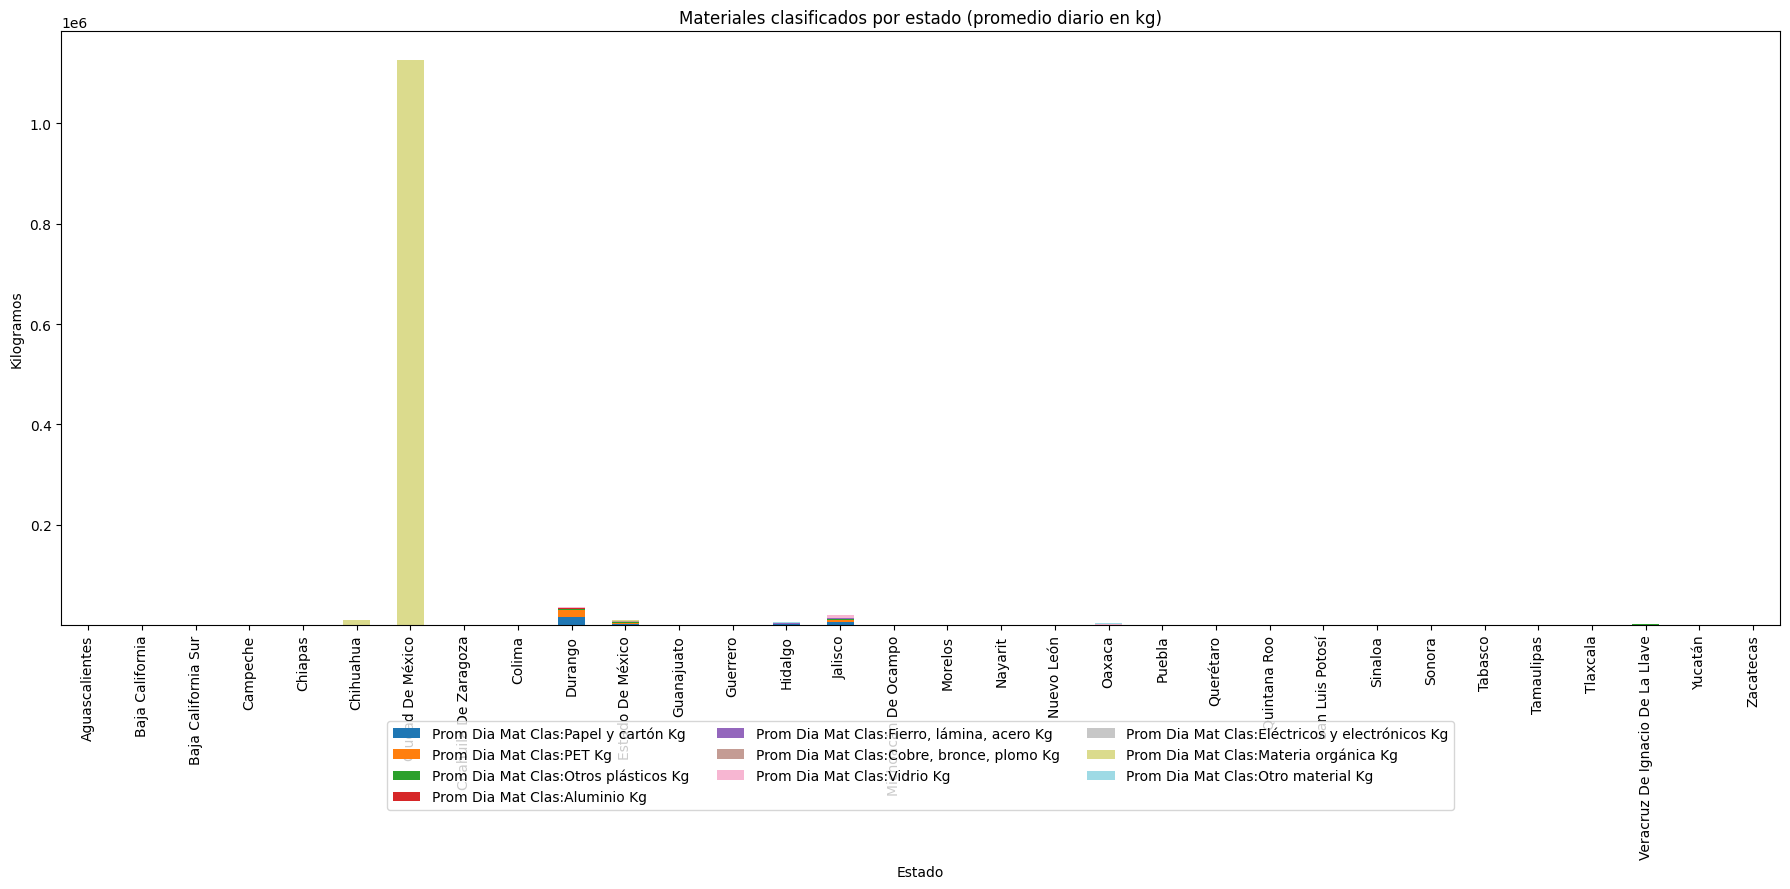

In [ ]:
materiales = [
    'Prom Dia Mat Clas:Papel y cartón Kg',
    'Prom Dia Mat Clas:PET Kg',
    'Prom Dia Mat Clas:Otros plásticos Kg',
    'Prom Dia Mat Clas:Aluminio Kg',
    'Prom Dia Mat Clas:Fierro, lámina, acero Kg',
    'Prom Dia Mat Clas:Cobre, bronce, plomo Kg',
    'Prom Dia Mat Clas:Vidrio Kg',
    'Prom Dia Mat Clas:Eléctricos y electrónicos Kg',
    'Prom Dia Mat Clas:Materia orgánica Kg',
    'Prom Dia Mat Clas:Otro material Kg'
]

df_apilado = df.set_index('Estado')[materiales]

df_apilado.plot(kind='bar', stacked=True, figsize=(18, 9), colormap='tab20')
plt.title('Materiales clasificados por estado (promedio diario en kg)')
plt.ylabel('Kilogramos')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.tight_layout()
plt.savefig("15barras apiladas recoleccion selectiva.png")
plt.show()


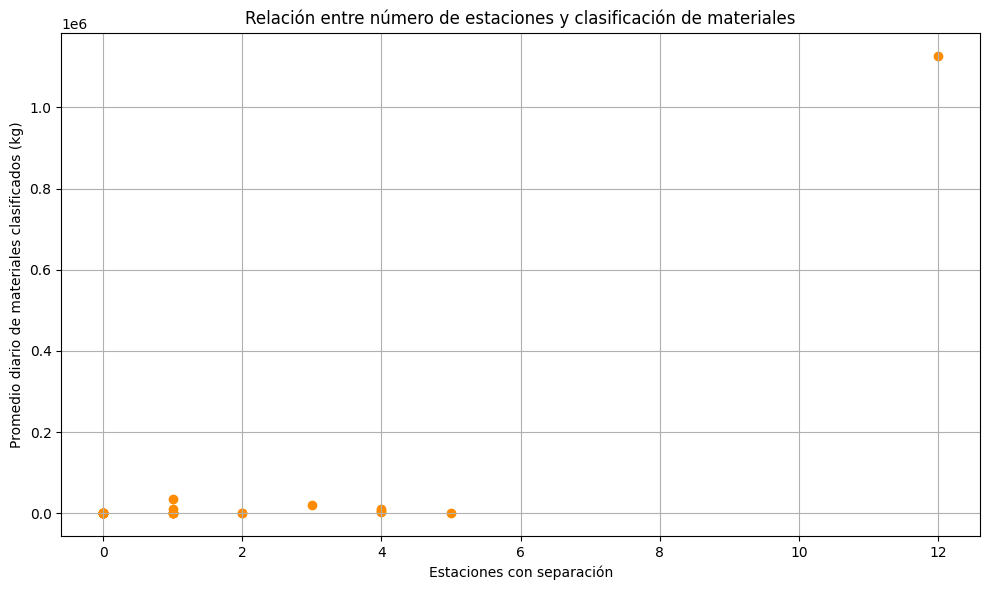

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Estaciones de transferencia con separación de residuos'],
            df['Cantidad promedio diaria de materiales clasificados (kilogramos)'], color='darkorange')
plt.xlabel('Estaciones con separación')
plt.ylabel('Promedio diario de materiales clasificados (kg)')
plt.title('Relación entre número de estaciones y clasificación de materiales')
plt.grid(True)
plt.tight_layout()
plt.savefig("1scatter recoleccion selectiva.png")
plt.show()


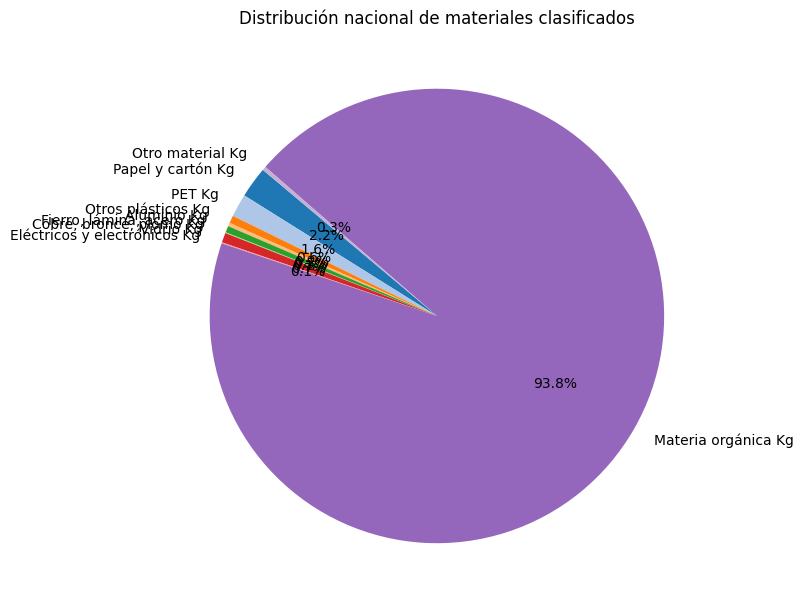

In [ ]:
df_nacional = df[materiales].sum()

plt.figure(figsize=(8, 8))
plt.pie(df_nacional, labels=[col.replace('Prom Dia Mat Clas:', '') for col in materiales],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribución nacional de materiales clasificados')
plt.tight_layout()
plt.savefig("pie clas.png")
plt.show()


In [ ]:
pip install squarify

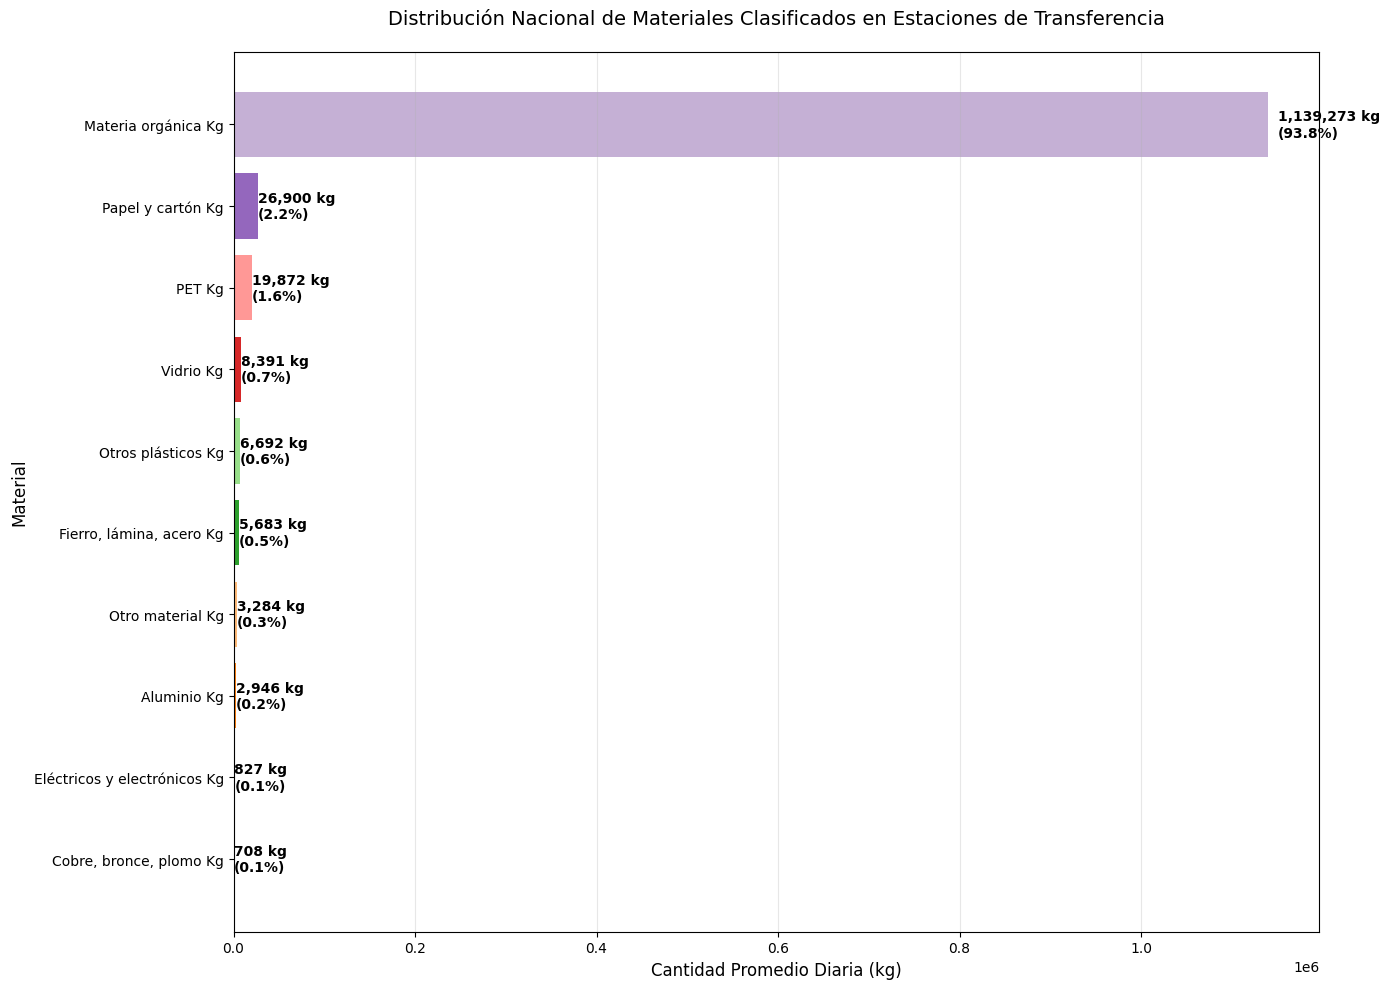

Resumen de Materiales Clasificados:
                    Material  Cantidad
         Materia orgánica Kg   1139273
           Papel y cartón Kg     26900
                      PET Kg     19872
                   Vidrio Kg      8391
          Otros plásticos Kg      6692
    Fierro, lámina, acero Kg      5683
            Otro material Kg      3284
                 Aluminio Kg      2946
Eléctricos y electrónicos Kg       827
     Cobre, bronce, plomo Kg       708


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar datos
df_nacional = df[materiales].sum()

# Limpiar nombres de materiales
materiales_limpios = [col.replace('Prom Dia Mat Clas:', '') for col in materiales]

# Crear DataFrame ordenado
df_plot = pd.DataFrame({
    'Material': materiales_limpios,
    'Cantidad': df_nacional.values
}).sort_values('Cantidad', ascending=True)  # Ordenar de menor a mayor

# Gráfico de barras horizontales
plt.figure(figsize=(14, 10))
bars = plt.barh(df_plot['Material'], df_plot['Cantidad'],
                color=plt.cm.tab20(range(len(df_plot))))

# Añadir valores y porcentajes en las barras
total = df_plot['Cantidad'].sum()
for bar in bars:
    width = bar.get_width()
    porcentaje = (width / total) * 100
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f} kg\n({porcentaje:.1f}%)',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.xlabel('Cantidad Promedio Diaria (kg)', fontsize=12)
plt.ylabel('Material', fontsize=12)
plt.title('Distribución Nacional de Materiales Clasificados en Estaciones de Transferencia',
          fontsize=14, pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig("barras_materiales_clasificados.png", dpi=300, bbox_inches='tight')
plt.show()

# Mostrar tabla resumen
print("Resumen de Materiales Clasificados:")
print(df_plot.sort_values('Cantidad', ascending=False).to_string(index=False))

REGIMEN DE GESTION

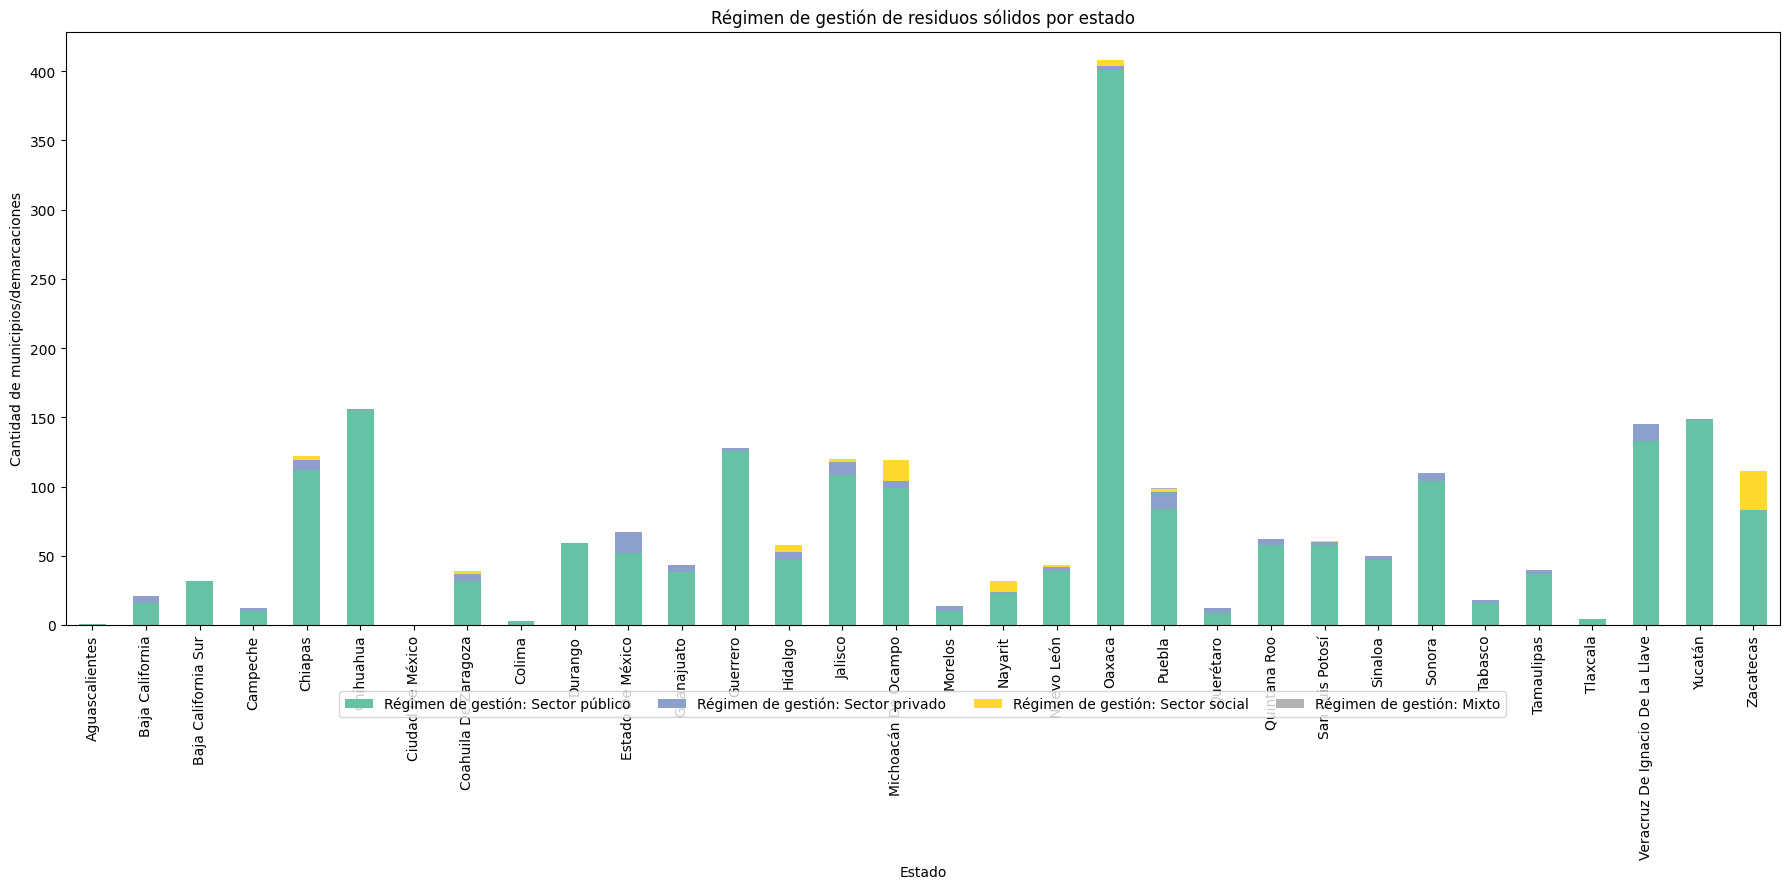

In [ ]:
columnas = [
    'Régimen de gestión: Sector público',
    'Régimen de gestión: Sector privado',
    'Régimen de gestión: Sector social',
    'Régimen de gestión: Mixto'
]

df_apilado = df.set_index('Estado')[columnas]

df_apilado.plot(kind='bar', stacked=True, figsize=(18, 9), colormap='Set2')
plt.title('Régimen de gestión de residuos sólidos por estado')
plt.ylabel('Cantidad de municipios/demarcaciones')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.tight_layout()
plt.savefig("16barras apiladas recoleccion selectiva.png")
plt.show()


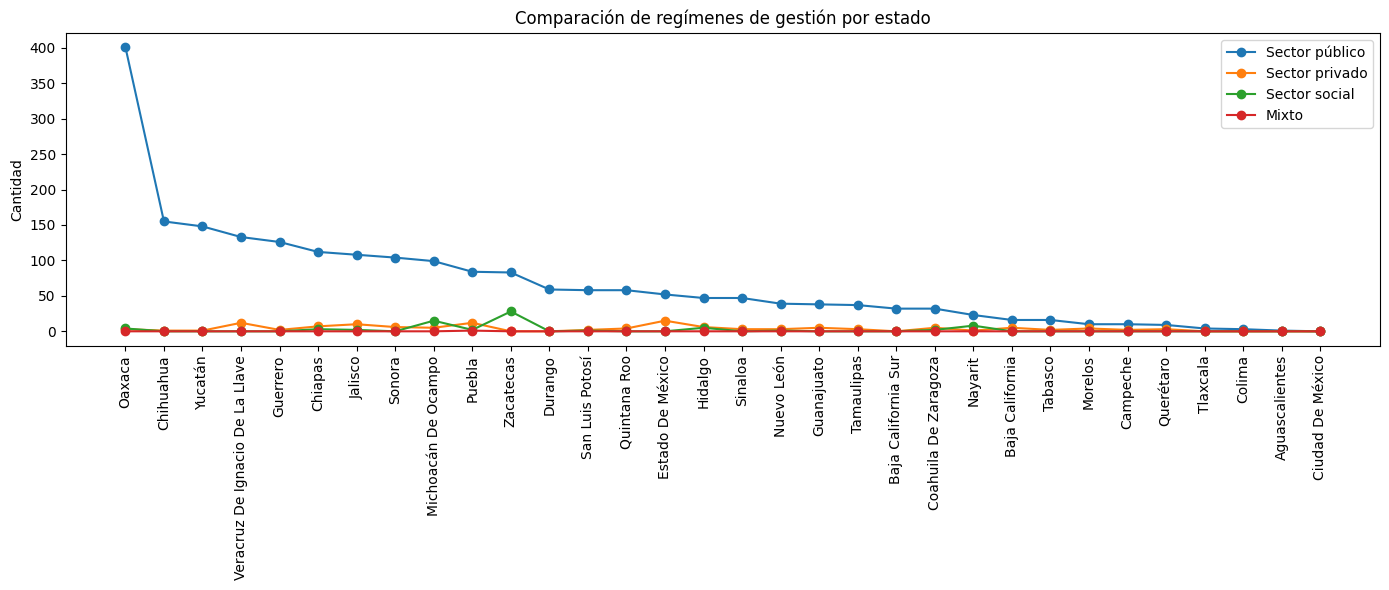

In [ ]:
df_ordenado = df.sort_values(by='Régimen de gestión: Sector público', ascending=False)

plt.figure(figsize=(14, 6))
for col in columnas:
    plt.plot(df_ordenado['Estado'], df_ordenado[col], marker='o', label=col.replace('Régimen de gestión: ', ''))

plt.xticks(rotation=90)
plt.ylabel('Cantidad')
plt.title('Comparación de regímenes de gestión por estado')
plt.legend()
plt.tight_layout()
plt.show()


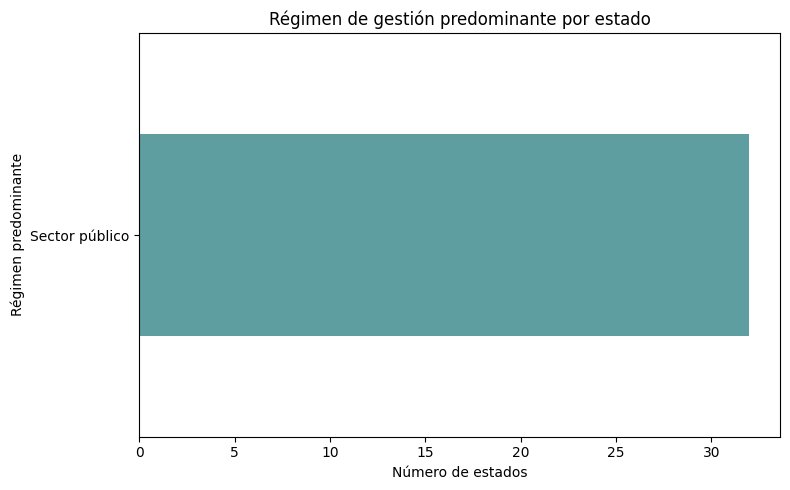

In [ ]:
df['Régimen predominante'] = df[columnas].idxmax(axis=1).str.replace('Régimen de gestión: ', '')

predominancia = df['Régimen predominante'].value_counts()

predominancia.plot(kind='barh', color='cadetblue', figsize=(8, 5))
plt.xlabel('Número de estados')
plt.title('Régimen de gestión predominante por estado')
plt.tight_layout()
plt.show()


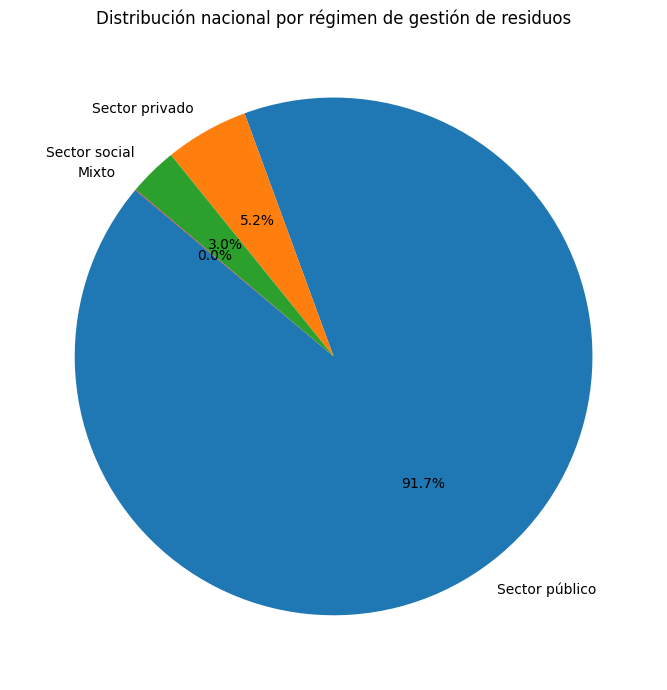

In [ ]:
df_total = df[columnas].sum()

plt.figure(figsize=(7, 7))
plt.pie(df_total, labels=df_total.index.str.replace('Régimen de gestión: ', ''), autopct='%1.1f%%', startangle=140)
plt.title('Distribución nacional por régimen de gestión de residuos')
plt.tight_layout()
plt.savefig("pie reg.png")
plt.show()


Plantas de tratamiento

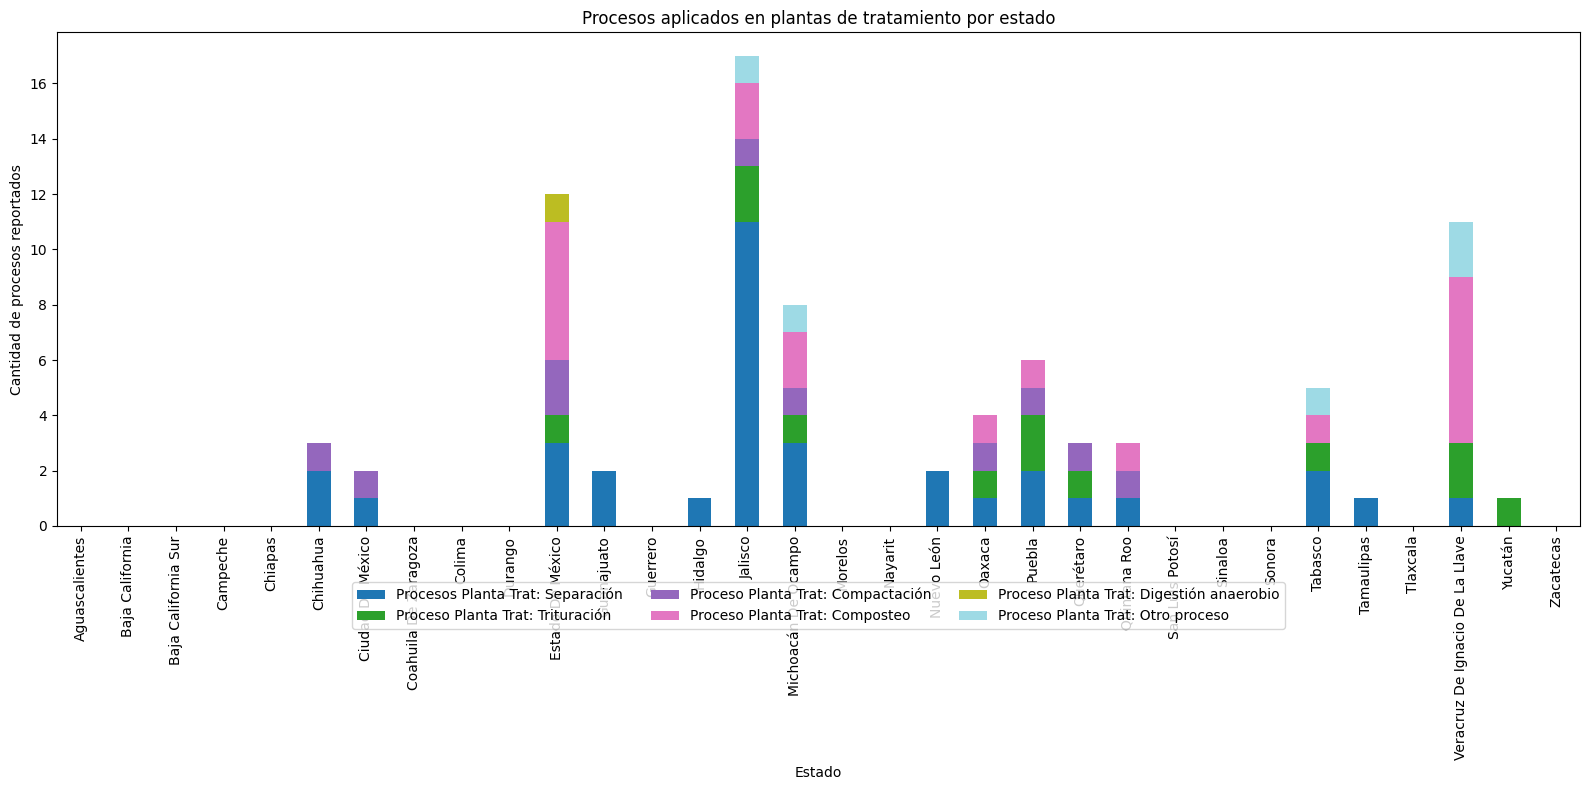

In [ ]:
procesos = [
    'Procesos Planta Trat: Separación',
    'Proceso Planta Trat: Trituración',
    'Proceso Planta Trat: Compactación',
    'Proceso Planta Trat: Composteo',
    'Proceso Planta Trat: Digestión anaerobio',
    'Proceso Planta Trat: Otro proceso'
]

df_procesos = df.set_index('Estado')[procesos]

df_procesos.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')
plt.title('Procesos aplicados en plantas de tratamiento por estado')
plt.ylabel('Cantidad de procesos reportados')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()
plt.savefig("17barras apiladas recoleccion selectiva.png")
plt.show()


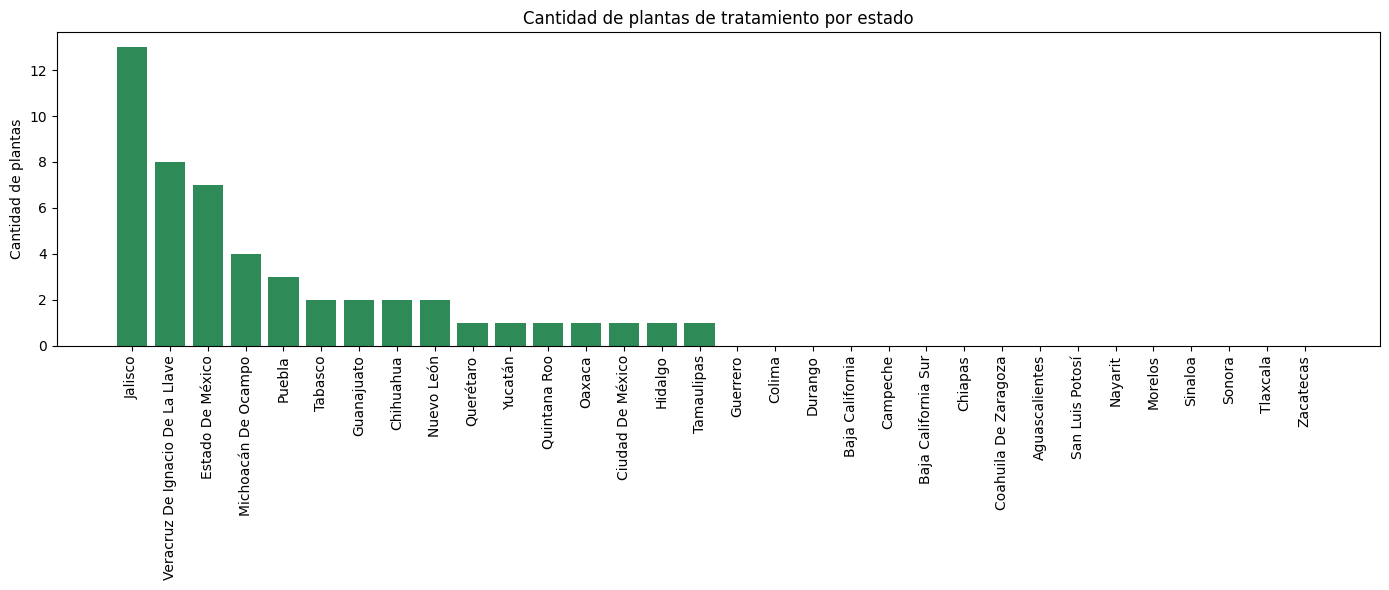

In [ ]:
df_ordenado = df.sort_values('Cantidad Plantas de tratamiento', ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(df_ordenado['Estado'], df_ordenado['Cantidad Plantas de tratamiento'], color='seagreen')
plt.xticks(rotation=90)
plt.ylabel('Cantidad de plantas')
plt.title('Cantidad de plantas de tratamiento por estado')
plt.tight_layout()
plt.savefig("18barras apiladas recoleccion selectiva.png")
plt.show()


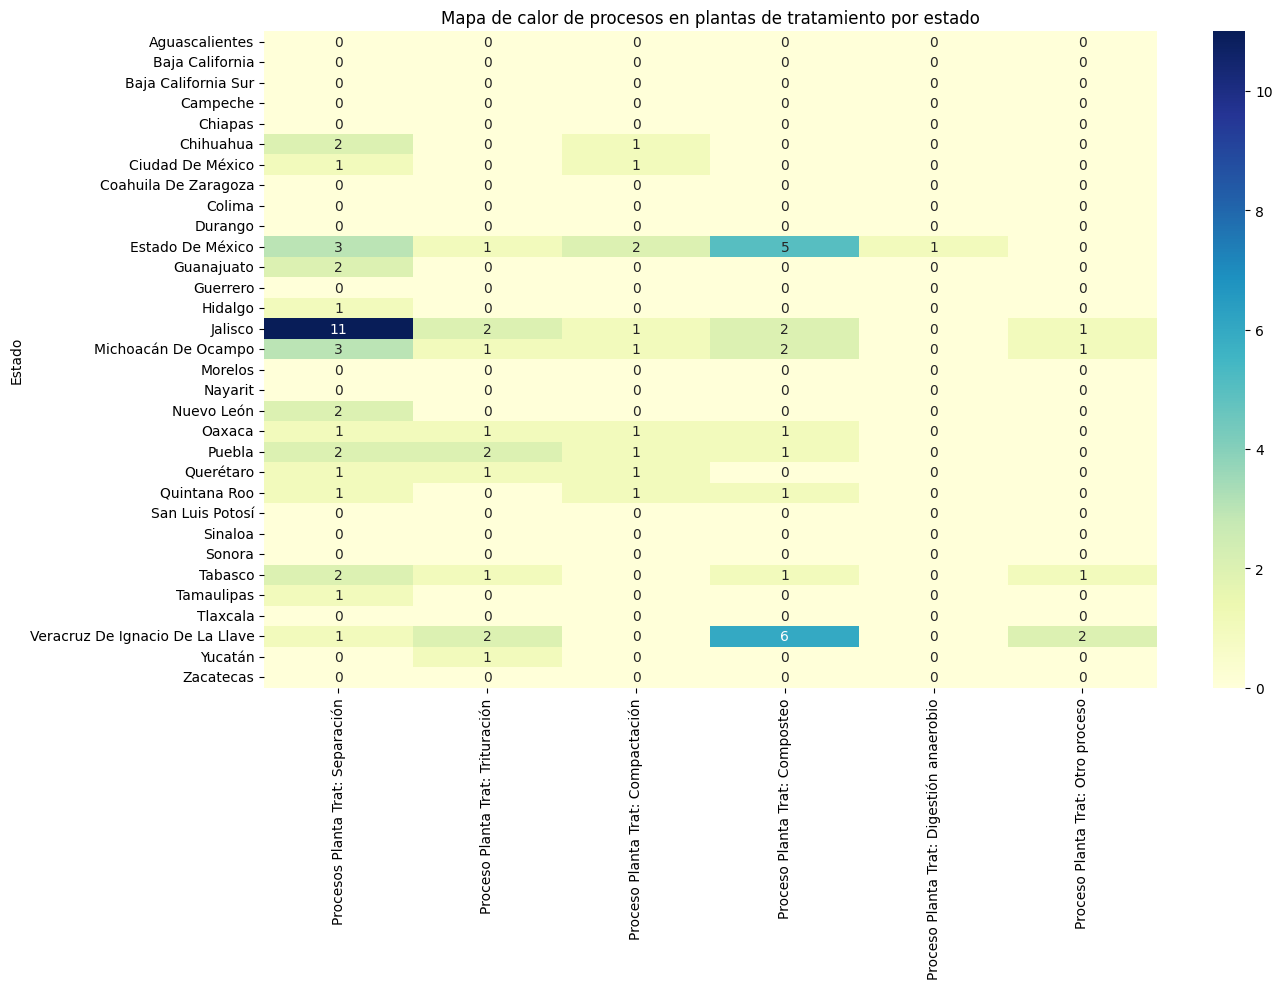

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(df.set_index('Estado')[procesos], cmap='YlGnBu', annot=True, fmt='d')
plt.title('Mapa de calor de procesos en plantas de tratamiento por estado')
plt.tight_layout()
plt.savefig("19barras apiladas recoleccion selectiva.png")
plt.show()


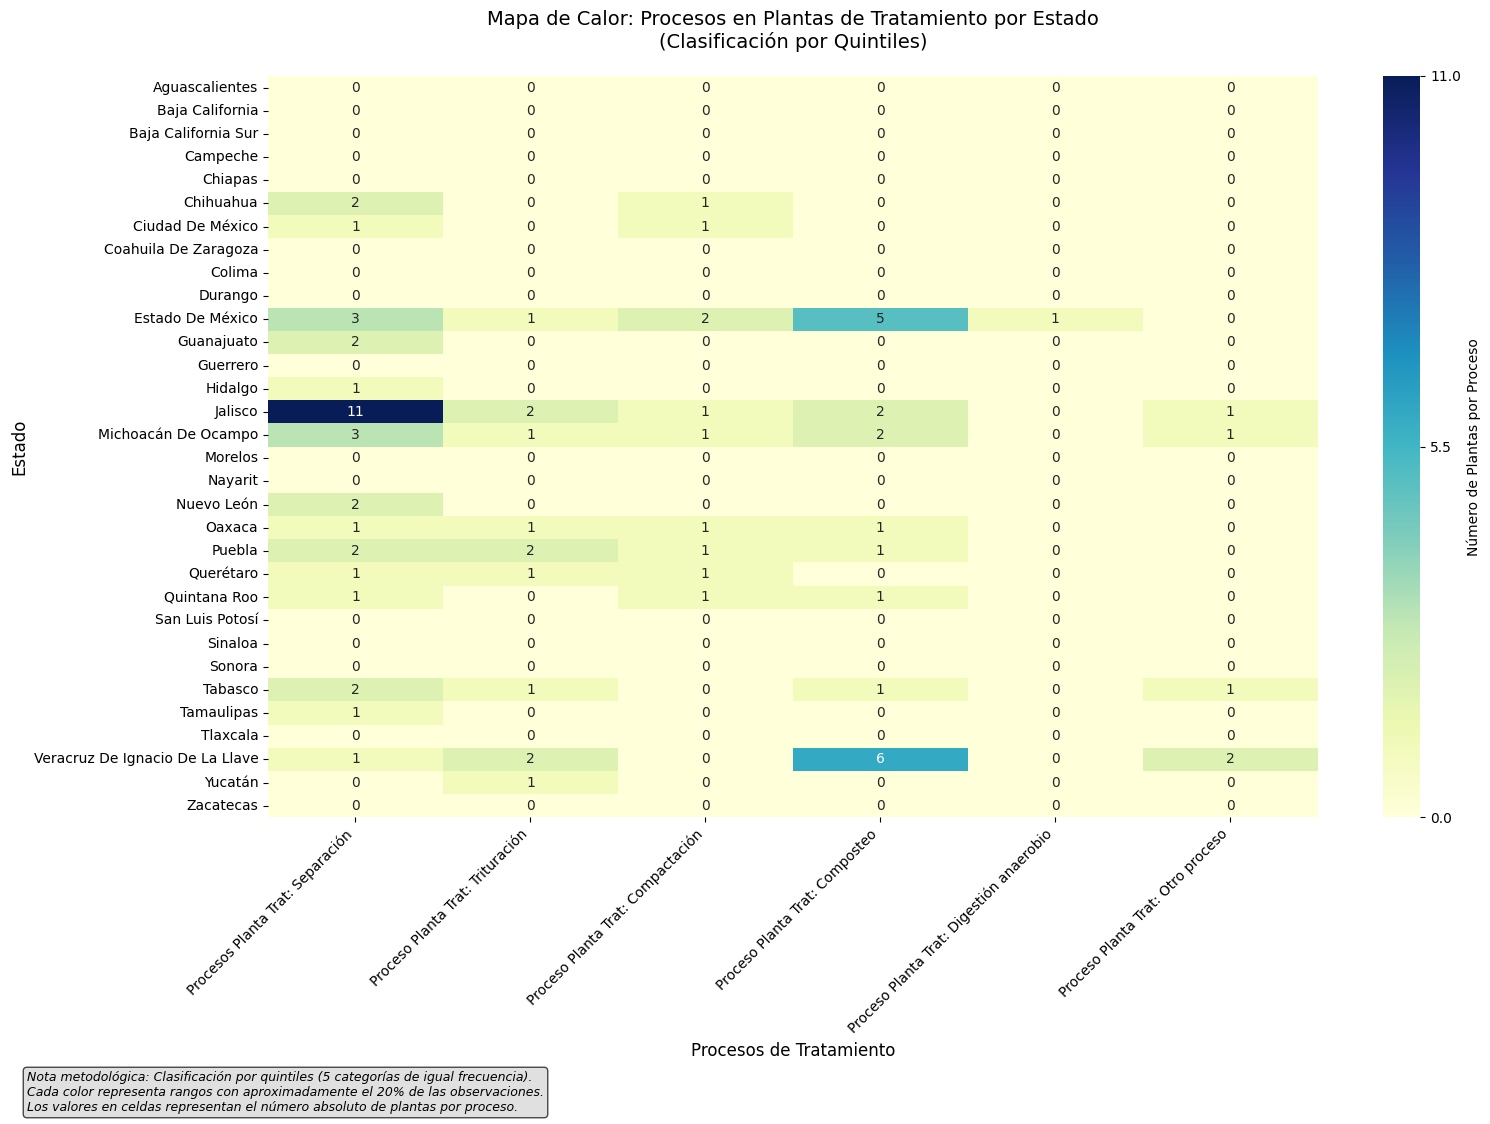

=== INFORMACIÓN METODOLÓGICA ===
Método de clasificación: Quintiles (5 categorías)
Rangos por categoría:
  Categoría 1: 0 - 1 plantas
  Categoría 2: 1 - 11 plantas

Estadísticas descriptivas:
  Mínimo: 0
  Máximo: 11
  Media: 0.4
  Desviación estándar: 1.1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Preparar datos
data_for_heatmap = df.set_index('Estado')[procesos]

# OPCIÓN 1: CLASIFICACIÓN POR CUANTILES (Recomendado)
# Calcular cuantiles para la escala de colores
n_quantiles = 5
all_values = data_for_heatmap.values.flatten()
all_values = all_values[~np.isnan(all_values)]  # Remover NaN si existen

# Calcular breaks por cuantiles
quantile_breaks = np.quantile(all_values, np.linspace(0, 1, n_quantiles + 1))
quantile_breaks = np.unique(quantile_breaks)  # Remover duplicados si existen

# Crear etiquetas para la leyenda
legend_labels = []
for i in range(len(quantile_breaks) - 1):
    legend_labels.append(f"{quantile_breaks[i]:.0f} - {quantile_breaks[i+1]:.0f}")

# Crear el heatmap con clasificación por cuantiles
plt.figure(figsize=(16, 12))

# Usar los breaks de cuantiles para definir los niveles
heatmap = sns.heatmap(data_for_heatmap,
                      cmap='YlGnBu',
                      annot=True,
                      fmt='d',
                      cbar_kws={
                          'label': 'Número de Plantas por Proceso',
                          'ticks': np.linspace(quantile_breaks[0], quantile_breaks[-1], len(legend_labels) + 1)
                      },
                      vmin=quantile_breaks[0],
                      vmax=quantile_breaks[-1])

plt.title('Mapa de Calor: Procesos en Plantas de Tratamiento por Estado\n(Clasificación por Quintiles)',
          fontsize=14, pad=20)
plt.xlabel('Procesos de Tratamiento', fontsize=12)
plt.ylabel('Estado', fontsize=12)

# Rotar etiquetas para mejor legibilidad
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Añadir nota metodológica como texto en el gráfico
plt.figtext(0.02, 0.02,
           "Nota metodológica: Clasificación por quintiles (5 categorías de igual frecuencia).\n"
           "Cada color representa rangos con aproximadamente el 20% de las observaciones.\n"
           "Los valores en celdas representan el número absoluto de plantas por proceso.",
           fontsize=9,
           style='italic',
           bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Ajustar para la nota metodológica
plt.savefig("heatmap_procesos_tratamiento_cuantiles.png", dpi=300, bbox_inches='tight')
plt.show()

# Mostrar información de clasificación en consola
print("=== INFORMACIÓN METODOLÓGICA ===")
print(f"Método de clasificación: Quintiles ({n_quantiles} categorías)")
print("Rangos por categoría:")
for i in range(len(quantile_breaks) - 1):
    print(f"  Categoría {i+1}: {quantile_breaks[i]:.0f} - {quantile_breaks[i+1]:.0f} plantas")
print(f"\nEstadísticas descriptivas:")
print(f"  Mínimo: {all_values.min():.0f}")
print(f"  Máximo: {all_values.max():.0f}")
print(f"  Media: {all_values.mean():.1f}")
print(f"  Desviación estándar: {all_values.std():.1f}")

Materiales recuperados planta de tratamiento

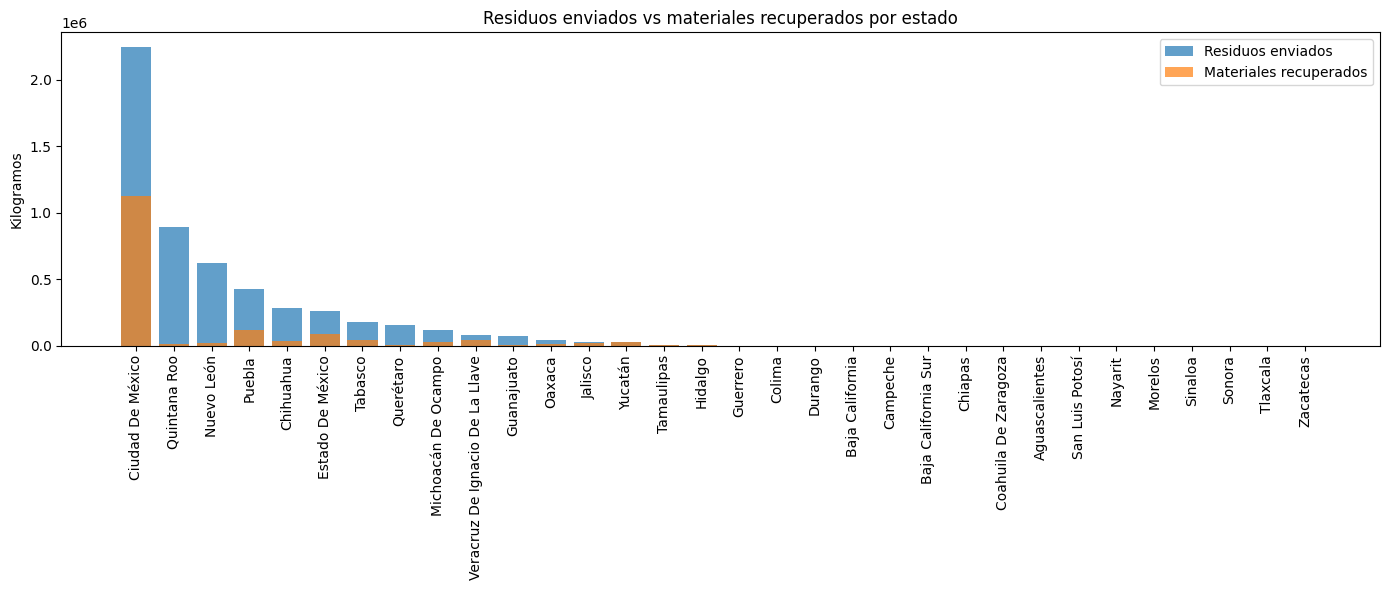

In [ ]:

df_ordenado = df.sort_values("Cantidad promedio diaria de residuos enviados a planta de tratamiento", ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(df_ordenado['Estado'], df_ordenado['Cantidad promedio diaria de residuos enviados a planta de tratamiento'], label='Residuos enviados', alpha=0.7)
plt.bar(df_ordenado['Estado'], df_ordenado['Cantidad promedio diaria de materiales recuperados en planta de tratamiento'], label='Materiales recuperados', alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel("Kilogramos")
plt.title("Residuos enviados vs materiales recuperados por estado")
plt.legend()
plt.tight_layout()
plt.savefig("20barras apiladas recoleccion selectiva.png")
plt.show()


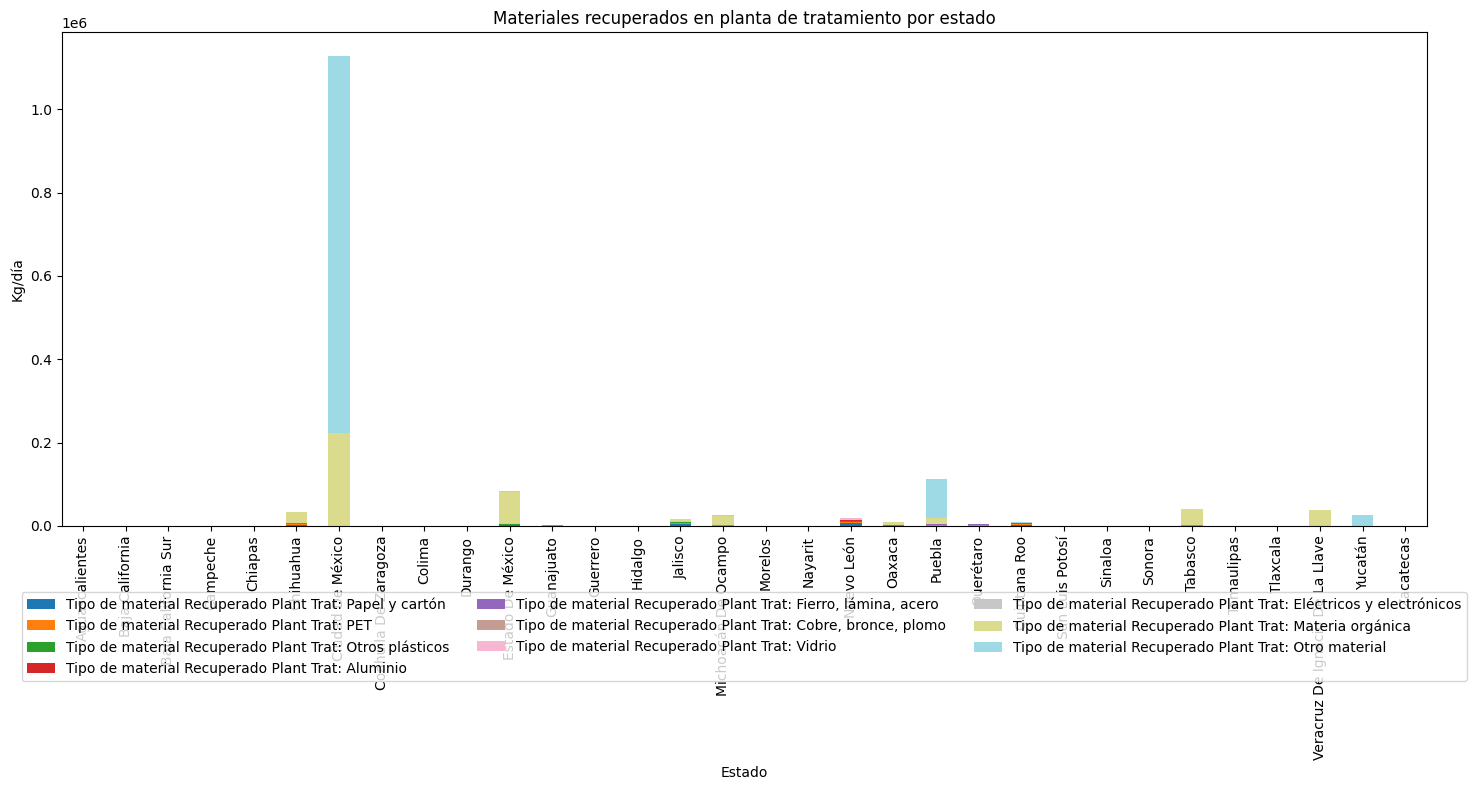

In [ ]:
materiales = [
    'Tipo de material Recuperado Plant Trat: Papel y cartón',
    'Tipo de material Recuperado Plant Trat: PET',
    'Tipo de material Recuperado Plant Trat: Otros plásticos',
    'Tipo de material Recuperado Plant Trat: Aluminio',
    'Tipo de material Recuperado Plant Trat: Fierro, lámina, acero',
    'Tipo de material Recuperado Plant Trat: Cobre, bronce, plomo',
    'Tipo de material Recuperado Plant Trat: Vidrio',
    'Tipo de material Recuperado Plant Trat: Eléctricos y electrónicos',
    'Tipo de material Recuperado Plant Trat: Materia orgánica',
    'Tipo de material Recuperado Plant Trat: Otro material'
]

df_materiales = df.set_index('Estado')[materiales]

df_materiales.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')
plt.title('Materiales recuperados en planta de tratamiento por estado')
plt.ylabel('Kg/día')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)
plt.tight_layout()
plt.savefig("21barras apiladas recoleccion selectiva.png")
plt.show()


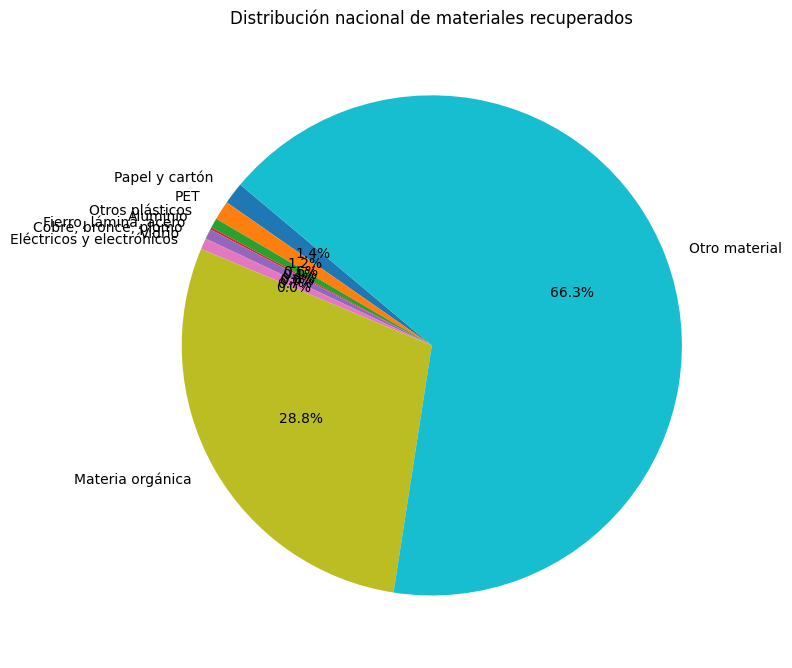

In [ ]:
totales_materiales = df[materiales].sum()

plt.figure(figsize=(8, 8))
plt.pie(totales_materiales, labels=totales_materiales.index.str.replace('Tipo de material Recuperado Plant Trat: ', ''),
        autopct='%1.1f%%', startangle=140)
plt.title('Distribución nacional de materiales recuperados')
plt.tight_layout()
plt.savefig("2pie recoleccion selectiva.png")
plt.show()


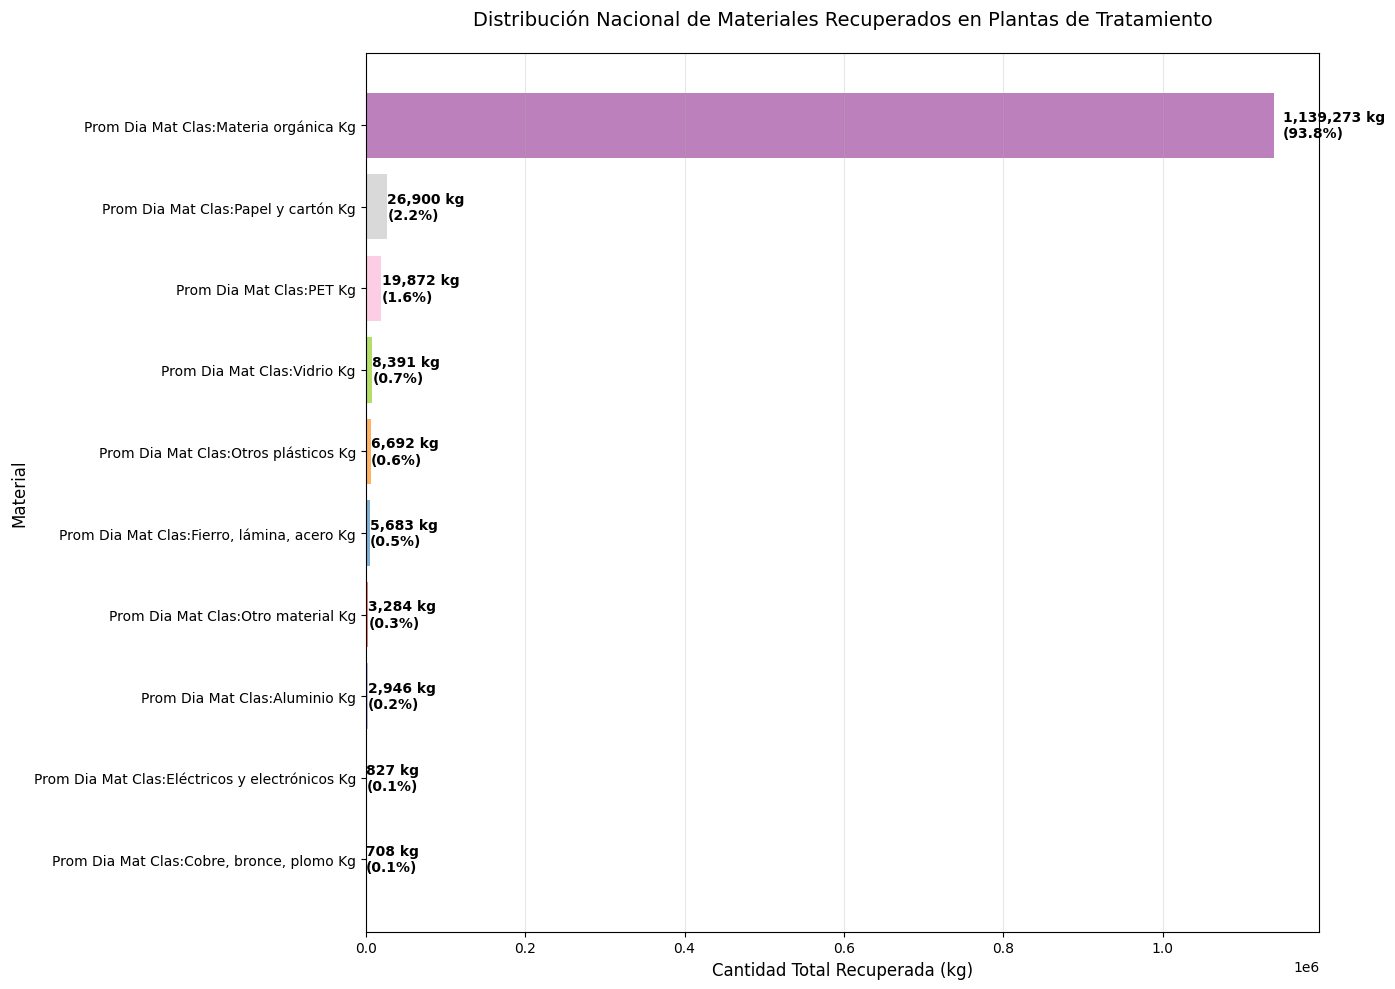

Resumen de Materiales Recuperados:
                                      Material  Cantidad
         Prom Dia Mat Clas:Materia orgánica Kg   1139273
           Prom Dia Mat Clas:Papel y cartón Kg     26900
                      Prom Dia Mat Clas:PET Kg     19872
                   Prom Dia Mat Clas:Vidrio Kg      8391
          Prom Dia Mat Clas:Otros plásticos Kg      6692
    Prom Dia Mat Clas:Fierro, lámina, acero Kg      5683
            Prom Dia Mat Clas:Otro material Kg      3284
                 Prom Dia Mat Clas:Aluminio Kg      2946
Prom Dia Mat Clas:Eléctricos y electrónicos Kg       827
     Prom Dia Mat Clas:Cobre, bronce, plomo Kg       708


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar datos
totales_materiales = df[materiales].sum()

# Limpiar nombres de materiales
materiales_limpios = totales_materiales.index.str.replace('Tipo de material Recuperado Plant Trat: ', '')

# Crear DataFrame ordenado
df_plot = pd.DataFrame({
    'Material': materiales_limpios,
    'Cantidad': totales_materiales.values
}).sort_values('Cantidad', ascending=True)  # Ordenar de menor a mayor

# Gráfico de barras horizontales
plt.figure(figsize=(14, 10))
bars = plt.barh(df_plot['Material'], df_plot['Cantidad'],
                color=plt.cm.Set3(range(len(df_plot))))

# Añadir valores y porcentajes en las barras
total = df_plot['Cantidad'].sum()
for bar in bars:
    width = bar.get_width()
    porcentaje = (width / total) * 100
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f} kg\n({porcentaje:.1f}%)',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.xlabel('Cantidad Total Recuperada (kg)', fontsize=12)
plt.ylabel('Material', fontsize=12)
plt.title('Distribución Nacional de Materiales Recuperados en Plantas de Tratamiento',
          fontsize=14, pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig("barras_materiales_recuperados.png", dpi=300, bbox_inches='tight')
plt.show()

# Mostrar tabla resumen
print("Resumen de Materiales Recuperados:")
print(df_plot.sort_values('Cantidad', ascending=False).to_string(index=False))

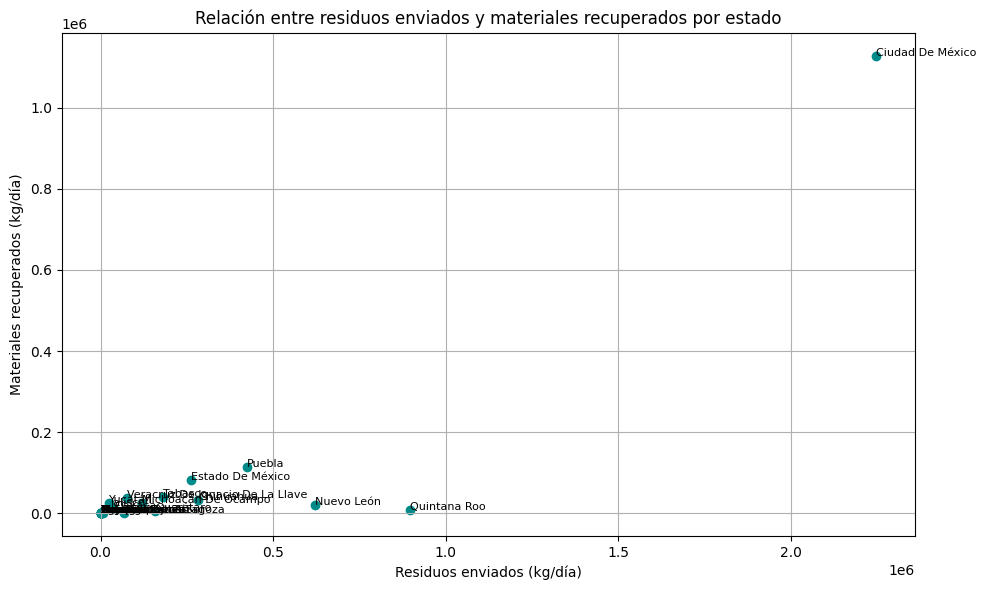

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Cantidad promedio diaria de residuos enviados a planta de tratamiento'],
            df['Cantidad promedio diaria de materiales recuperados en planta de tratamiento'],
            c='darkcyan')

for i, row in df.iterrows():
    plt.text(row['Cantidad promedio diaria de residuos enviados a planta de tratamiento'] + 10,
             row['Cantidad promedio diaria de materiales recuperados en planta de tratamiento'],
             row['Estado'], fontsize=8)

plt.xlabel("Residuos enviados (kg/día)")
plt.ylabel("Materiales recuperados (kg/día)")
plt.title("Relación entre residuos enviados y materiales recuperados por estado")
plt.grid(True)
plt.tight_layout()
plt.show()


REGIMEN DE GESTION PLANTAS DE TRATAMIENTO

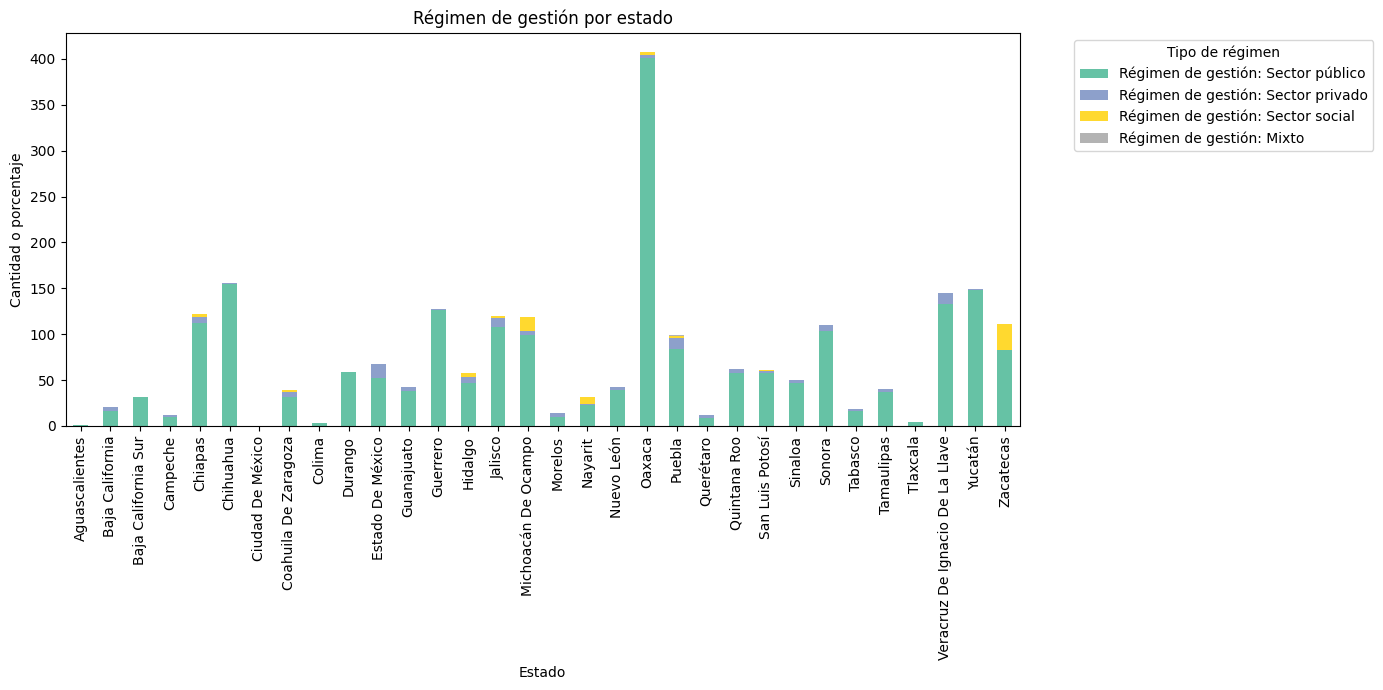

In [ ]:
import matplotlib.pyplot as plt

regimenes = [
    'Régimen de gestión: Sector público',
    'Régimen de gestión: Sector privado',
    'Régimen de gestión: Sector social',
    'Régimen de gestión: Mixto'
]

df_regimenes = df.set_index('Estado')[regimenes]

df_regimenes.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set2')
plt.title("Régimen de gestión por estado")
plt.ylabel("Cantidad o porcentaje")
plt.xticks(rotation=90)
plt.legend(title="Tipo de régimen", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("22barras apiladas recoleccion selectiva.png")
plt.show()


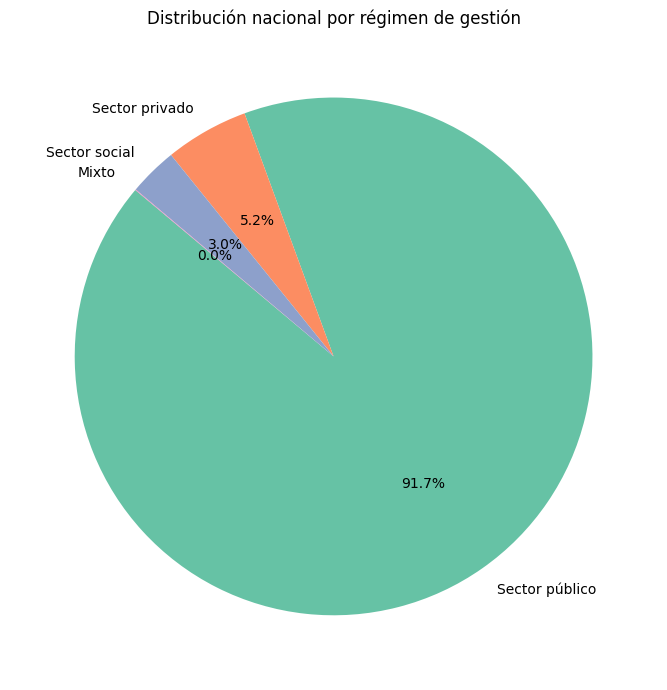

In [ ]:
total_por_regimen = df[regimenes].sum()

plt.figure(figsize=(7, 7))
plt.pie(total_por_regimen, labels=total_por_regimen.index.str.replace('Régimen de gestión: ', ''),
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title("Distribución nacional por régimen de gestión")
plt.tight_layout()
plt.savefig("3pie recoleccion selectiva.png")
plt.show()


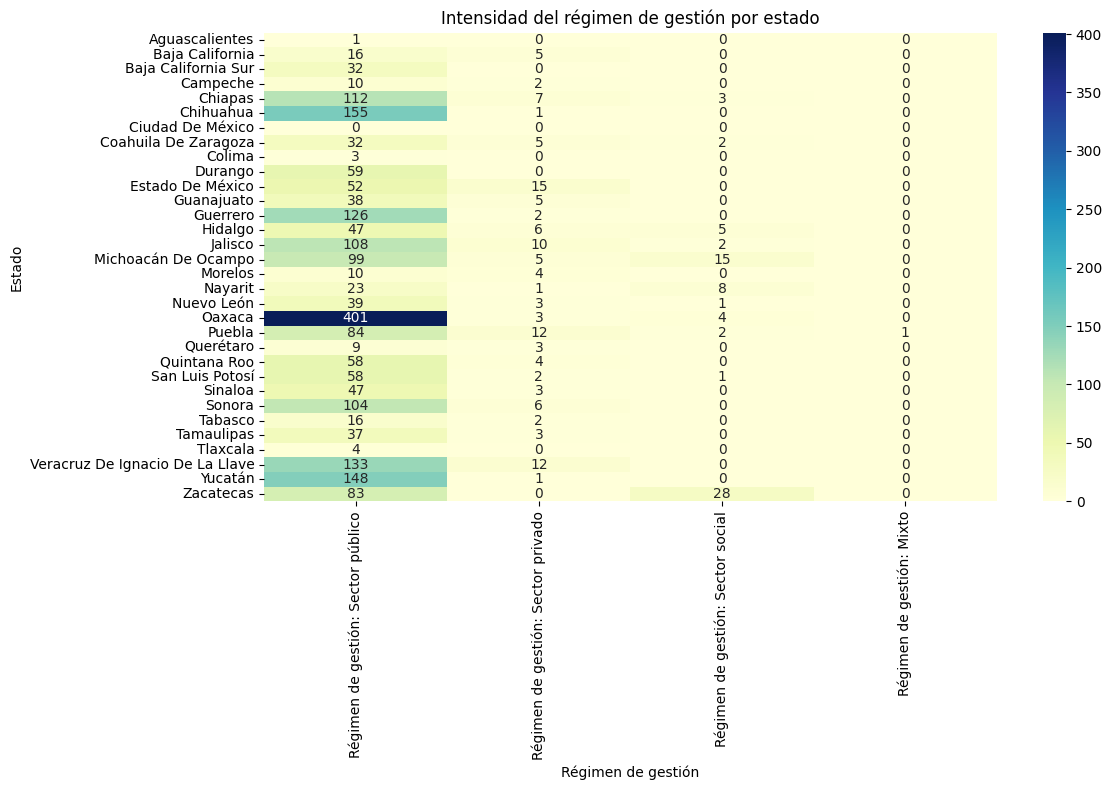

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.set_index('Estado')[regimenes], cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Intensidad del régimen de gestión por estado")
plt.ylabel("Estado")
plt.xlabel("Régimen de gestión")
plt.tight_layout()
plt.savefig("4heatmap recoleccion selectiva.png")
plt.show()


SITIOS DE DISPOSION FINAL

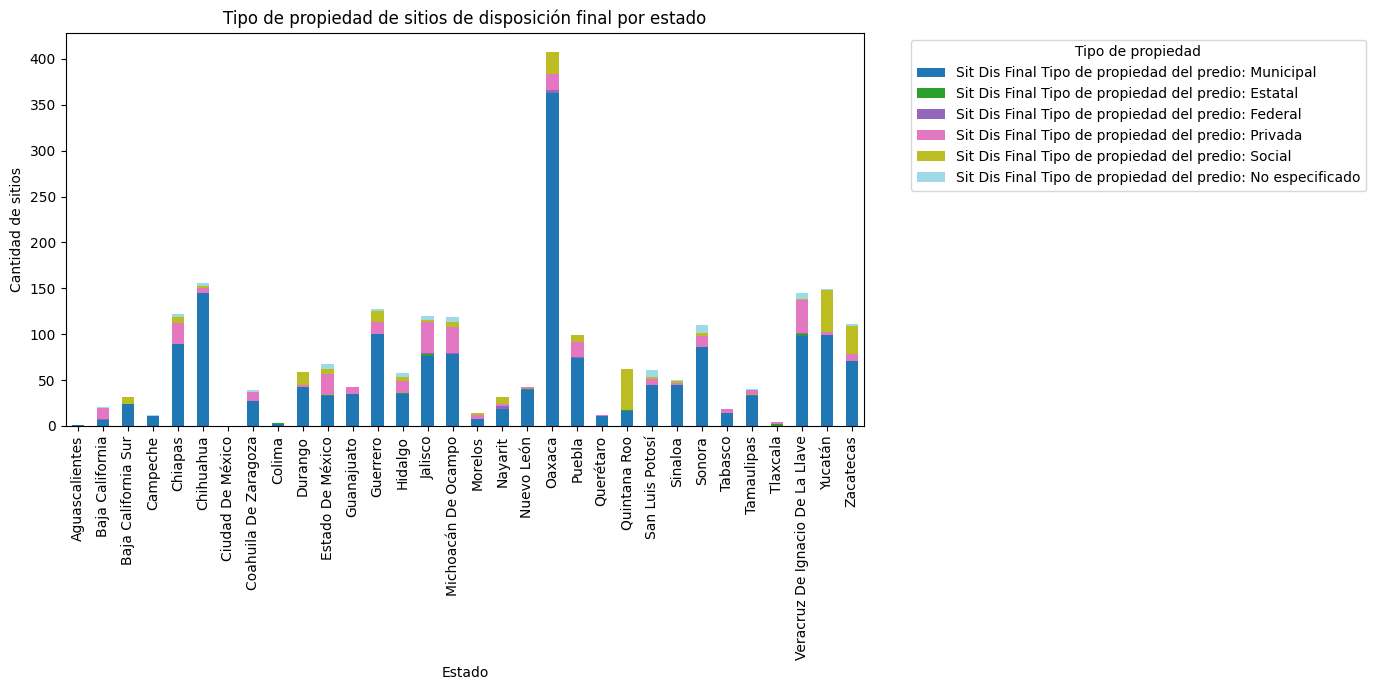

In [ ]:
import matplotlib.pyplot as plt

columnas_propiedad = [
    'Sit Dis Final Tipo de propiedad del predio: Municipal',
    'Sit Dis Final Tipo de propiedad del predio: Estatal',
    'Sit Dis Final Tipo de propiedad del predio: Federal',
    'Sit Dis Final Tipo de propiedad del predio: Privada',
    'Sit Dis Final Tipo de propiedad del predio: Social',
    'Sit Dis Final Tipo de propiedad del predio: No especificado'
]

df.set_index('Estado')[columnas_propiedad].plot(
    kind='bar', stacked=True, figsize=(14, 7), colormap='tab20'
)
plt.title('Tipo de propiedad de sitios de disposición final por estado')
plt.ylabel('Cantidad de sitios')
plt.xticks(rotation=90)
plt.legend(title='Tipo de propiedad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("5barras apiladas recoleccion selectiva.png")
plt.show()


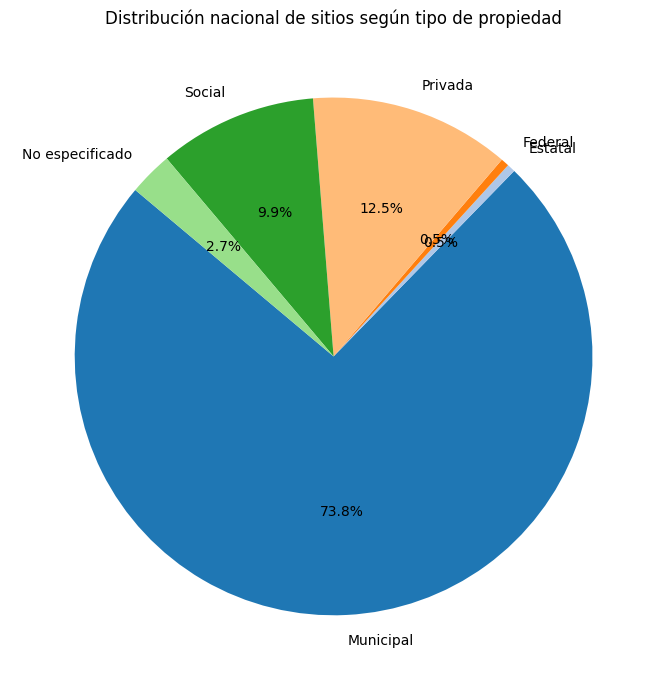

In [ ]:
df_totales = df[columnas_propiedad].sum()

plt.figure(figsize=(7, 7))
plt.pie(df_totales, labels=df_totales.index.str.replace('Sit Dis Final Tipo de propiedad del predio: ', ''),
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribución nacional de sitios según tipo de propiedad')
plt.tight_layout()
plt.savefig("6pie recoleccion selectiva.png")
plt.show()


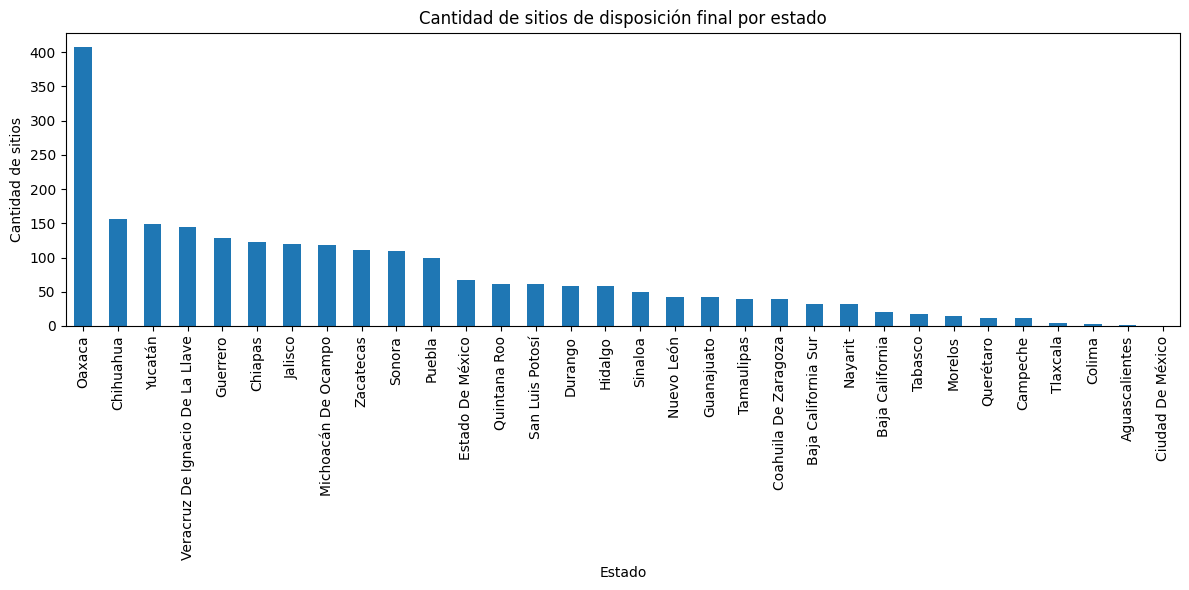

In [ ]:
df[['Estado', 'Cantidad Sitios de disposición final']].set_index('Estado').sort_values(
    by='Cantidad Sitios de disposición final', ascending=False
).plot(kind='bar', figsize=(12, 6), legend=False)
plt.title('Cantidad de sitios de disposición final por estado')
plt.ylabel('Cantidad de sitios')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("7barras apiladas recoleccion selectiva.png")
plt.show()


REGIMEN DE GESTION, SITIOS DE DISPOSION FINAL

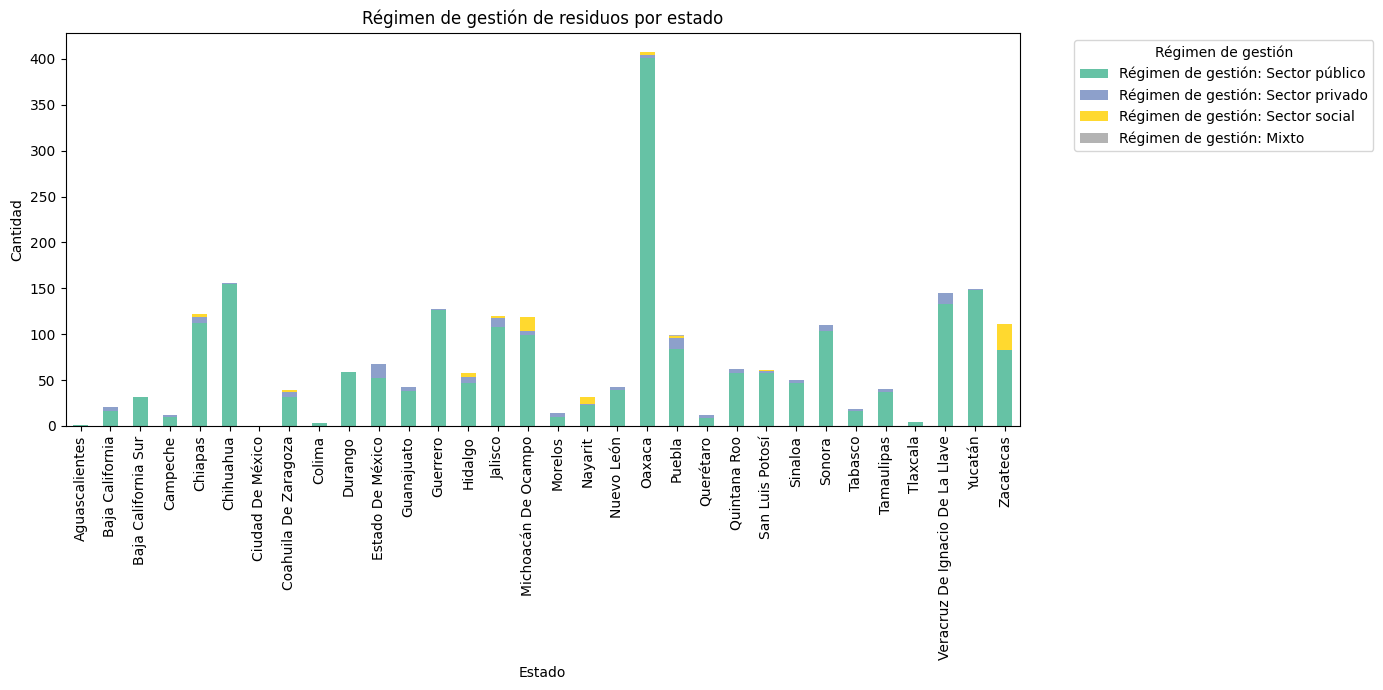

In [ ]:
import matplotlib.pyplot as plt

regimen_cols = [
    'Régimen de gestión: Sector público',
    'Régimen de gestión: Sector privado',
    'Régimen de gestión: Sector social',
    'Régimen de gestión: Mixto'
]

df.set_index('Estado')[regimen_cols].plot(
    kind='bar', stacked=True, figsize=(14, 7), colormap='Set2'
)
plt.title('Régimen de gestión de residuos por estado')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Régimen de gestión', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("8barras apiladas recoleccion selectiva.png")
plt.show()


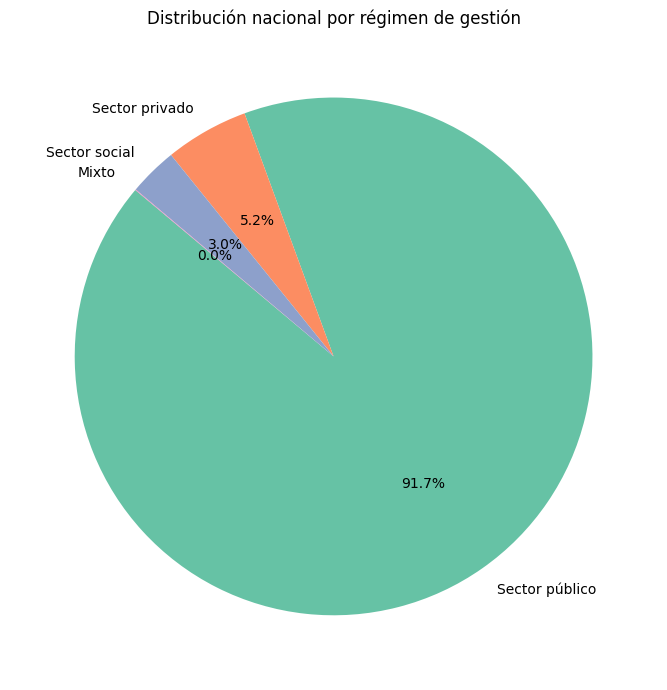

In [ ]:
df_total = df[regimen_cols].sum()

plt.figure(figsize=(7, 7))
plt.pie(df_total, labels=[col.split(": ")[-1] for col in regimen_cols],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Distribución nacional por régimen de gestión')
plt.tight_layout()
plt.savefig("9pie recoleccion selectiva.png")
plt.show()


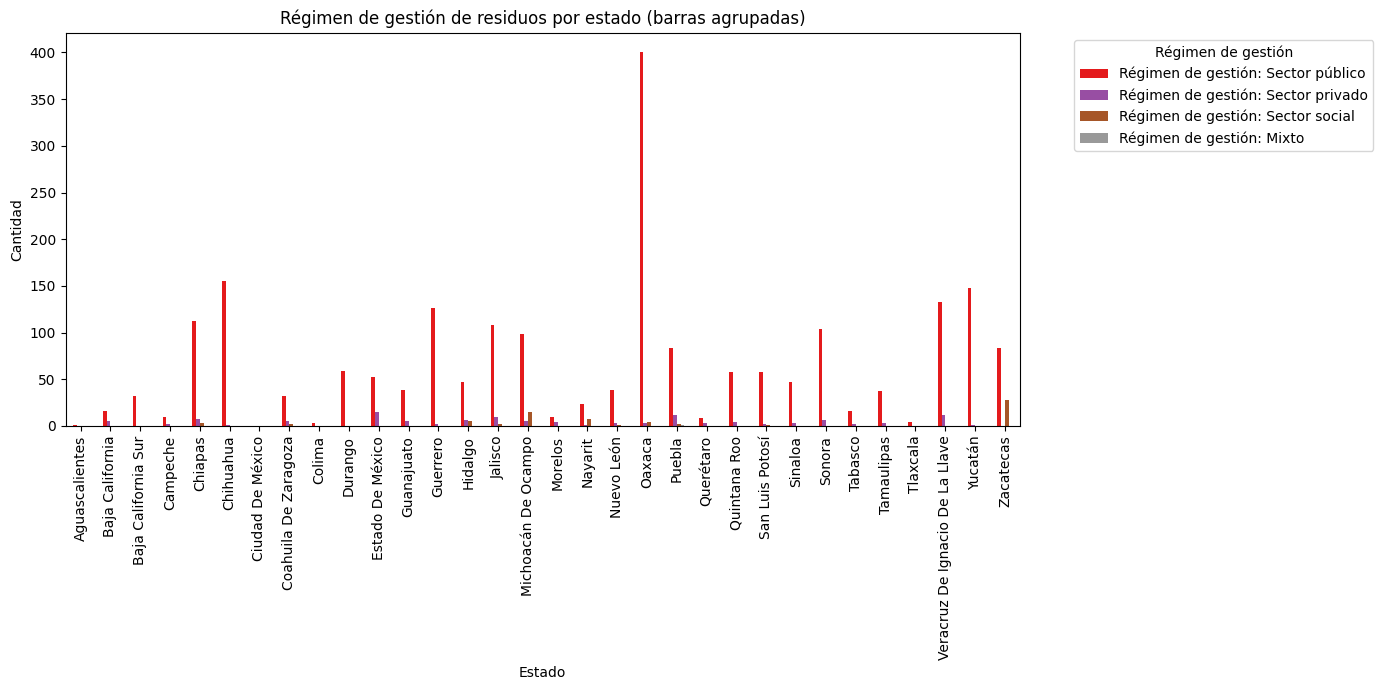

In [ ]:
df.set_index('Estado')[regimen_cols].plot(
    kind='bar', figsize=(14, 7), colormap='Set1'
)
plt.title('Régimen de gestión de residuos por estado (barras agrupadas)')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Régimen de gestión', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("10barras apiladas recoleccion selectiva.png")
plt.show()


DIFUSION Y CONCIENTIZACION AMBIENTAL

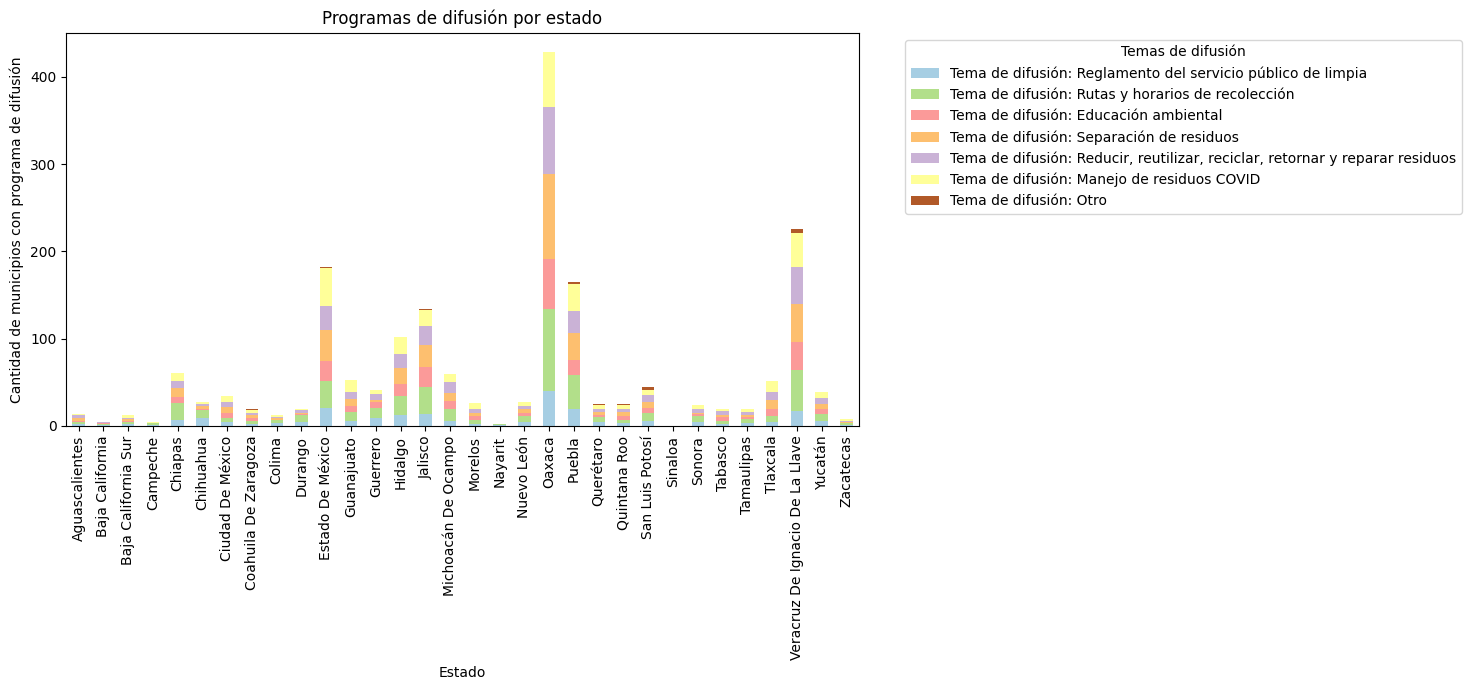

In [ ]:
import matplotlib.pyplot as plt

temas = [
    'Tema de difusión: Reglamento del servicio público de limpia',
    'Tema de difusión: Rutas y horarios de recolección',
    'Tema de difusión: Educación ambiental',
    'Tema de difusión: Separación de residuos',
    'Tema de difusión: Reducir, reutilizar, reciclar, retornar y reparar residuos',
    'Tema de difusión: Manejo de residuos COVID',
    'Tema de difusión: Otro'
]

df.set_index('Estado')[temas].plot(
    kind='bar', stacked=True, figsize=(15, 7), colormap='Paired'
)
plt.title('Programas de difusión por estado')
plt.ylabel('Cantidad de municipios con programa de difusión')
plt.xticks(rotation=90)
plt.legend(title='Temas de difusión', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("11barras apiladas recoleccion selectiva.png")
plt.show()


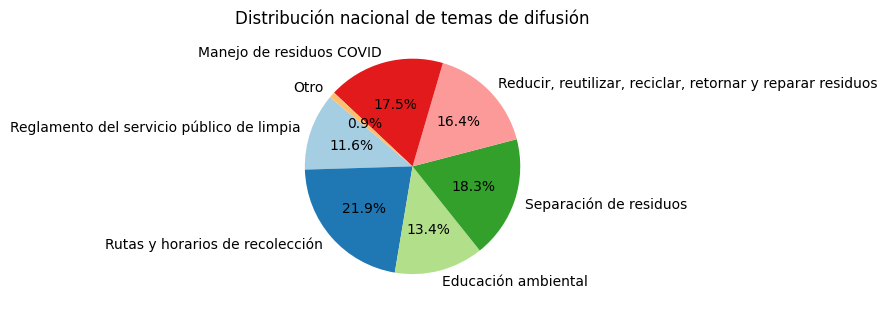

In [ ]:
df_total = df[temas].sum()

plt.figure(figsize=(8, 8))
plt.pie(df_total, labels=[col.split(": ")[-1] for col in temas],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribución nacional de temas de difusión')
plt.tight_layout()
plt.savefig("12pie recoleccion selectiva.png")
plt.show()


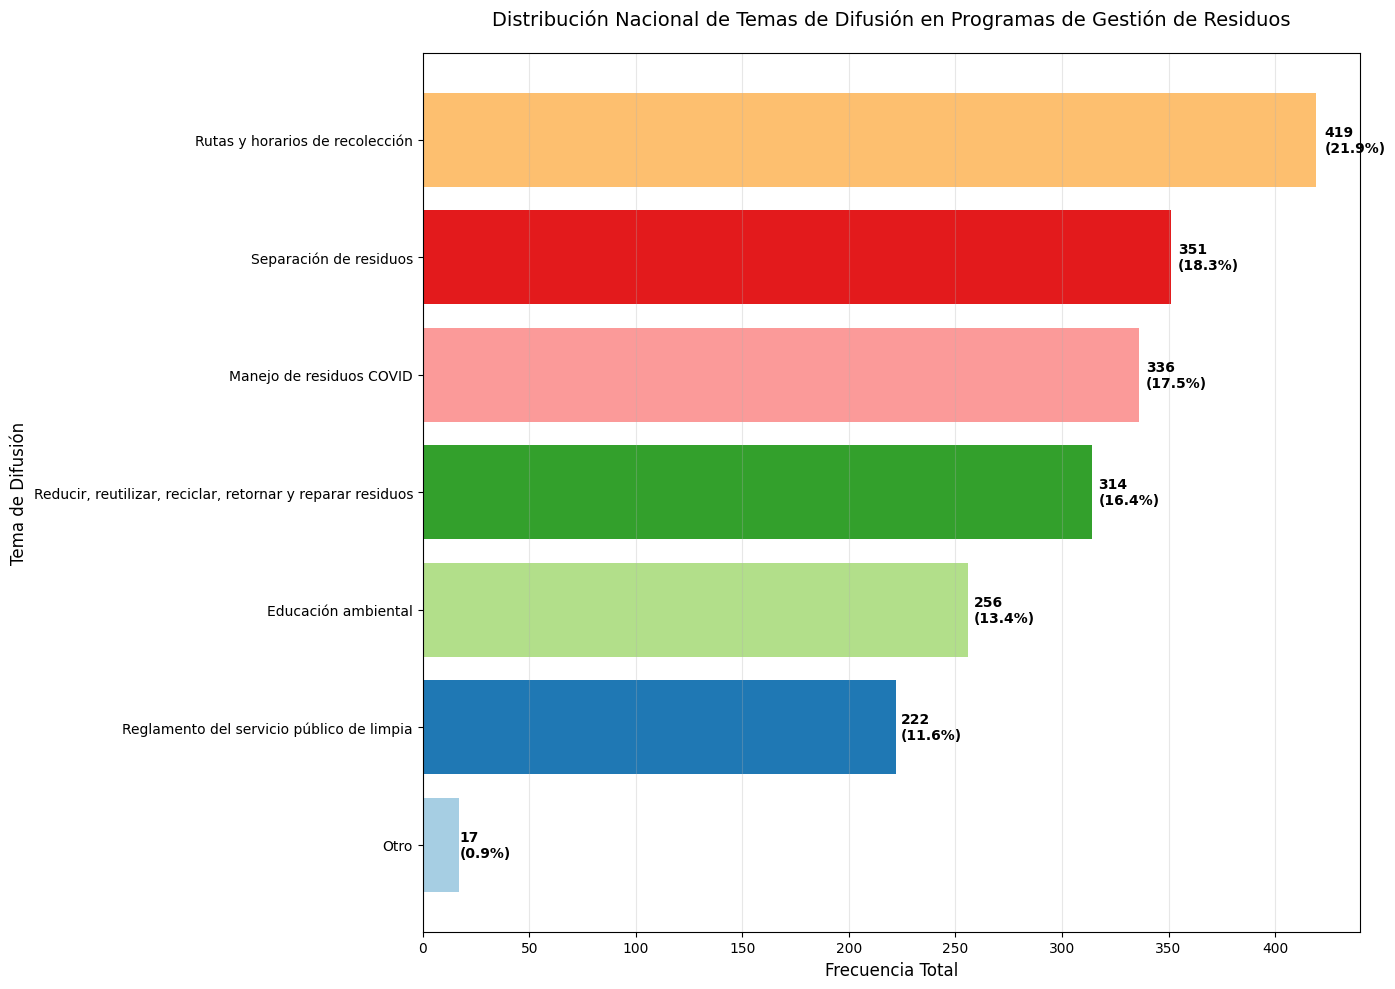

Resumen de Temas de Difusión:
                                                      Tema  Cantidad
                           Rutas y horarios de recolección       419
                                    Separación de residuos       351
                                  Manejo de residuos COVID       336
Reducir, reutilizar, reciclar, retornar y reparar residuos       314
                                       Educación ambiental       256
                 Reglamento del servicio público de limpia       222
                                                      Otro        17


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar datos
df_total = df[temas].sum()

# Limpiar nombres de temas
temas_limpios = [col.split(": ")[-1] for col in temas]

# Crear DataFrame ordenado
df_plot = pd.DataFrame({
    'Tema': temas_limpios,
    'Cantidad': df_total.values
}).sort_values('Cantidad', ascending=True)  # Ordenar de menor a mayor

# Gráfico de barras horizontales
plt.figure(figsize=(14, 10))
bars = plt.barh(df_plot['Tema'], df_plot['Cantidad'],
                color=plt.cm.Paired(range(len(df_plot))))

# Añadir valores y porcentajes en las barras
total = df_plot['Cantidad'].sum()
for bar in bars:
    width = bar.get_width()
    porcentaje = (width / total) * 100
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}\n({porcentaje:.1f}%)',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.xlabel('Frecuencia Total', fontsize=12)
plt.ylabel('Tema de Difusión', fontsize=12)
plt.title('Distribución Nacional de Temas de Difusión en Programas de Gestión de Residuos',
          fontsize=14, pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig("barras_temas_difusion.png", dpi=300, bbox_inches='tight')
plt.show()

# Mostrar tabla resumen
print("Resumen de Temas de Difusión:")
print(df_plot.sort_values('Cantidad', ascending=False).to_string(index=False))

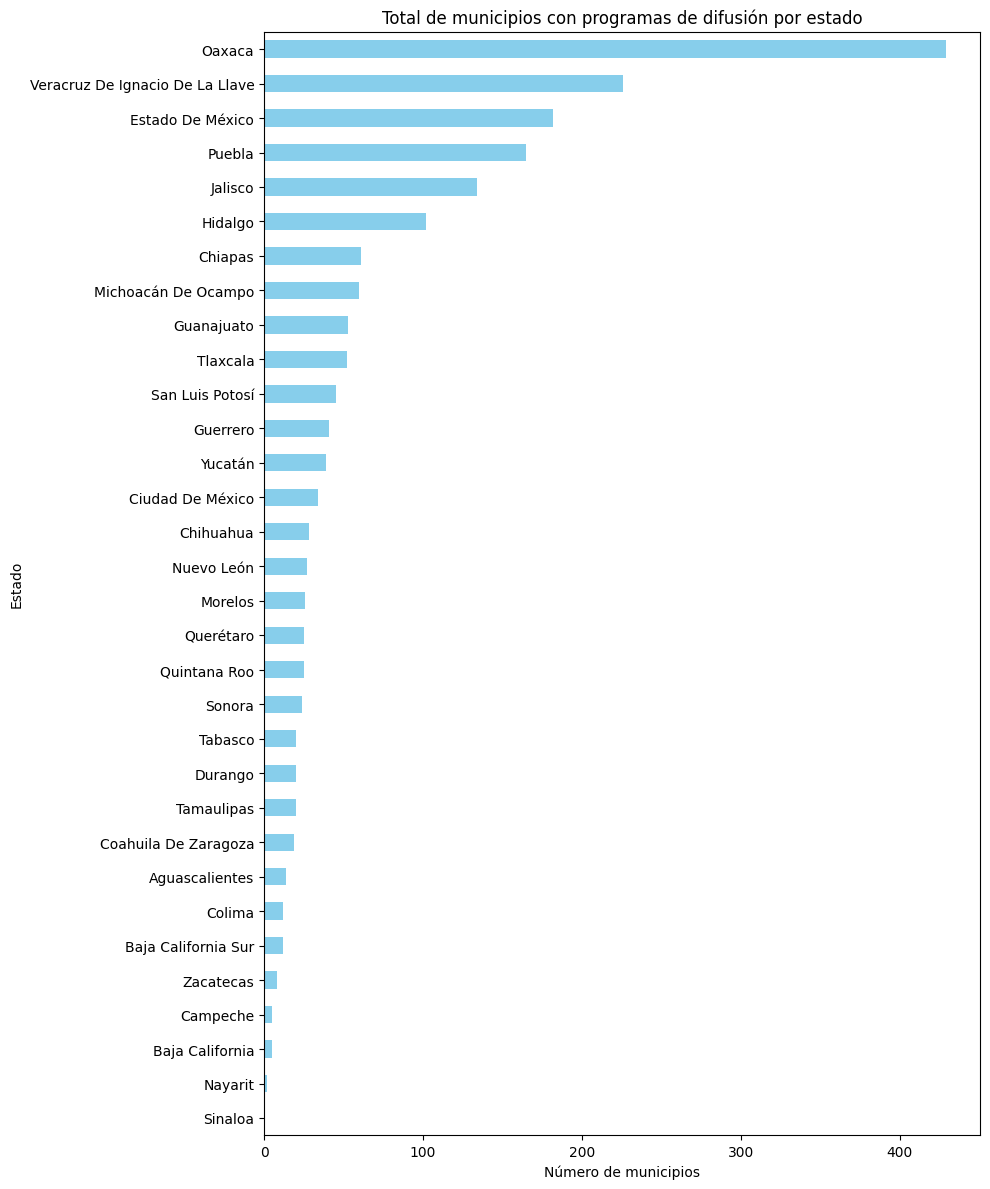

In [ ]:
df['Total programas difusión'] = df[temas].sum(axis=1)
df.sort_values('Total programas difusión', ascending=True).plot(
    x='Estado', y='Total programas difusión', kind='barh',
    figsize=(10, 12), color='skyblue', legend=False
)
plt.title('Total de municipios con programas de difusión por estado')
plt.xlabel('Número de municipios')
plt.tight_layout()
plt.savefig("13barras apiladas recoleccion selectiva.png")
plt.show()


SEGUIMIENTO DE RESIDUOS SOLIDOS URBANOS

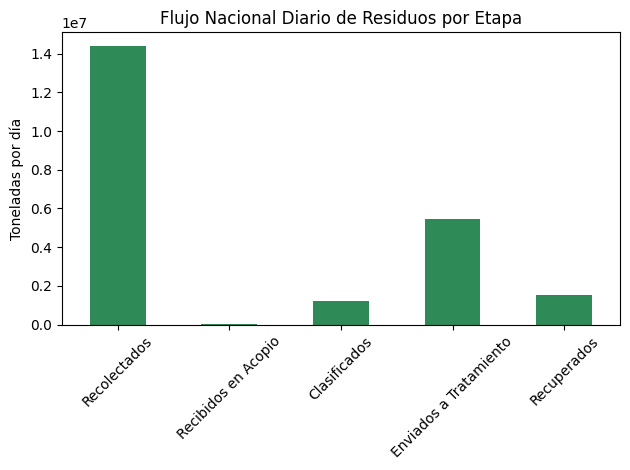

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

columnas_flujo = [
    'Cantidad promedio diaria de residuos recolectados de manera selectiva',
    'Cantidad promedio diaria de materiales reciclables recibidos (kilogramos)',
    'Cantidad promedio diaria de materiales clasificados (kilogramos)',
    'Cantidad promedio diaria de residuos enviados a planta de tratamiento',
    'Cantidad promedio diaria de materiales recuperados en planta de tratamiento'
]

df_flujo = df[columnas_flujo].sum().rename({
    'Cantidad promedio diaria de residuos recolectados de manera selectiva': 'Recolectados',
    'Cantidad promedio diaria de materiales reciclables recibidos (kilogramos)': 'Recibidos en Acopio',
    'Cantidad promedio diaria de materiales clasificados (kilogramos)': 'Clasificados',
    'Cantidad promedio diaria de residuos enviados a planta de tratamiento': 'Enviados a Tratamiento',
    'Cantidad promedio diaria de materiales recuperados en planta de tratamiento': 'Recuperados'
})

df_flujo.plot(kind='bar', color='seagreen', title='Flujo Nacional Diario de Residuos por Etapa')
plt.ylabel('Toneladas por día')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("14barras apiladas recoleccion selectiva.png")
plt.show()


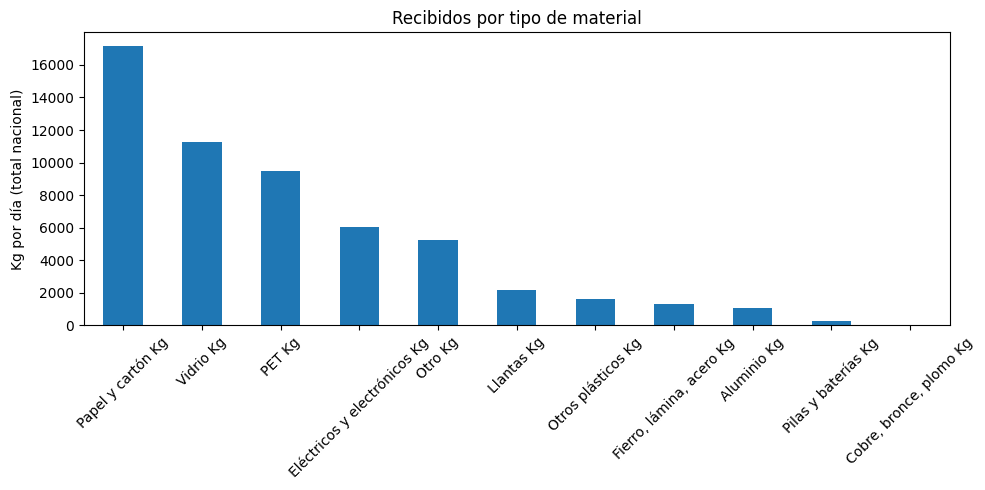

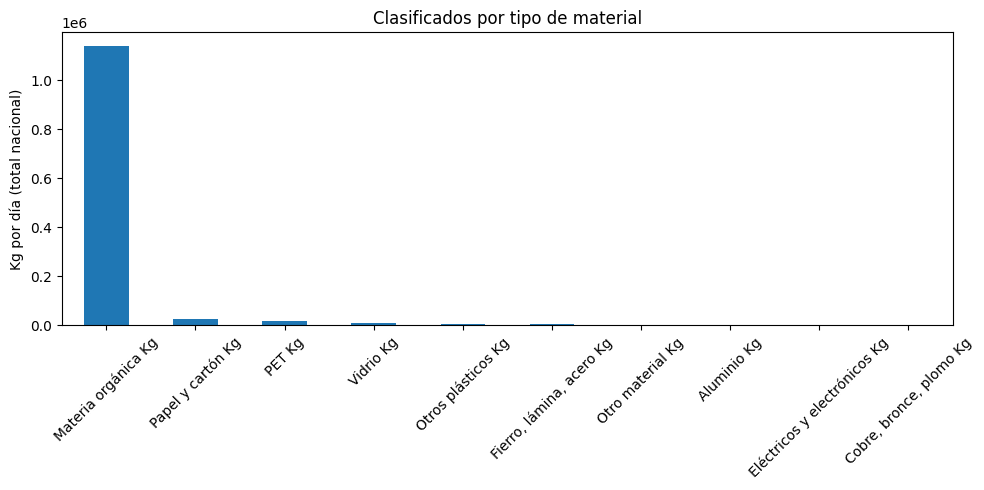

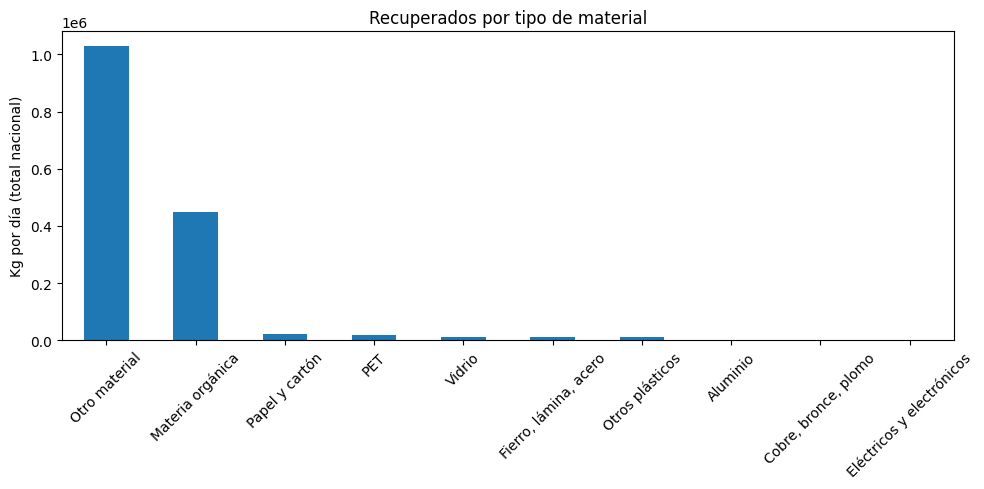

In [ ]:
materiales = {
    'Recibidos': df.filter(like='Prom Diario Mat Rec recibidos:'),
    'Clasificados': df.filter(like='Prom Dia Mat Clas:'),
    'Recuperados': df.filter(like='Tipo de material Recuperado Plant Trat:')
}

for etapa, data in materiales.items():
    suma_etapa = data.sum().sort_values(ascending=False)
    suma_etapa.index = [col.split(":")[-1].strip() for col in suma_etapa.index]
    suma_etapa.plot(kind='bar', title=f'{etapa} por tipo de material', figsize=(10,5))
    plt.ylabel('Kg por día (total nacional)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("15barras apiladas recoleccion selectiva.png")
    plt.show()


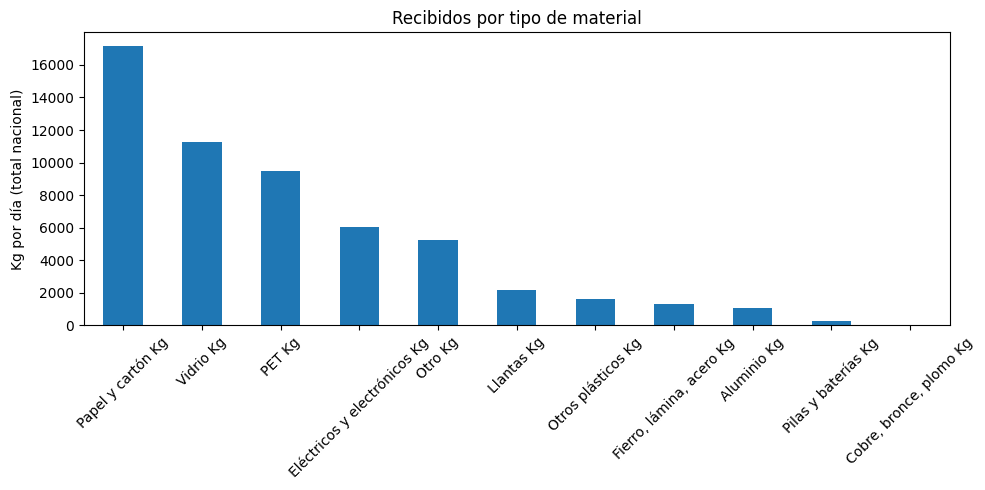

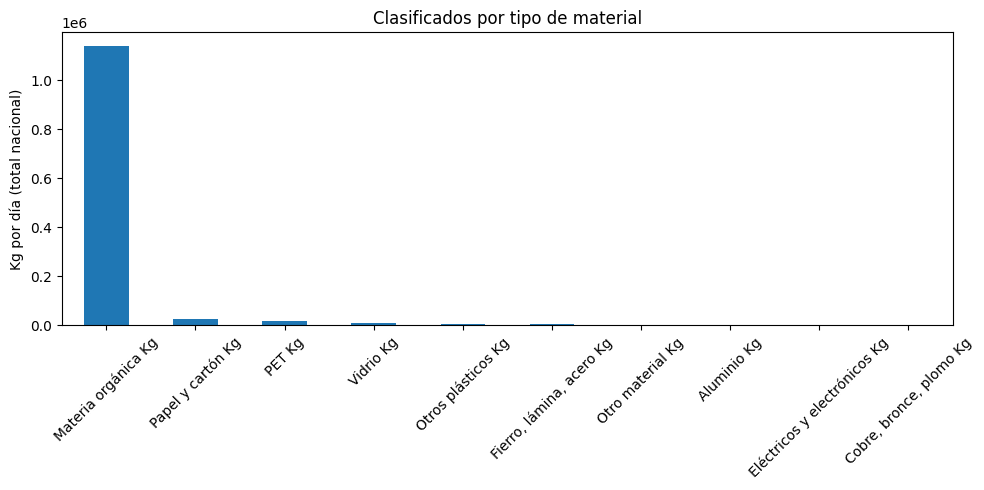

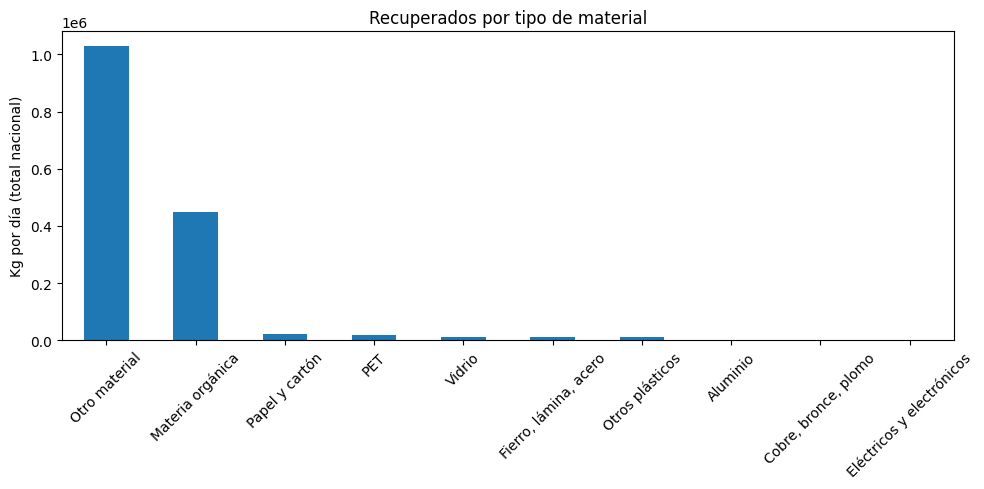

In [ ]:
import matplotlib.pyplot as plt

materiales = {
    'Recibidos': df.filter(like='Prom Diario Mat Rec recibidos:'),
    'Clasificados': df.filter(like='Prom Dia Mat Clas:'),
    'Recuperados': df.filter(like='Tipo de material Recuperado Plant Trat:')
}

for etapa, data in materiales.items():
    suma_etapa = data.sum().sort_values(ascending=False)
    suma_etapa.index = [col.split(":")[-1].strip() for col in suma_etapa.index]

    # Crear figura
    plt.figure(figsize=(10,5))

    # Generar gráfico
    suma_etapa.plot(kind='bar', title=f'{etapa} por tipo de material')
    plt.ylabel('Kg por día (total nacional)')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Guardar con nombre único
    nombre_archivo = f"grafico_{etapa.lower()}.png"  # Ej: grafico_recibidos.png
    plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')

    # Mostrar y cerrar
    plt.show()
    plt.close()  # Importante para liberar memoria

In [ ]:
df['eficiencia_recuperacion'] = df['Cantidad promedio diaria de materiales recuperados en planta de tratamiento'] / df['Cantidad promedio diaria de residuos enviados a planta de tratamiento']


INDICADORES ECONOMIA CIRCULAR

In [ ]:
nombres_columnas = df.columns
print("Método 1:", df.columns)

Método 1: Index(['Año', 'Estado',
       'Promedio diario de residuos sólidos urbanos recolectados', 'pea',
       'grado_escolar', 'idh', 'PIB', 'Poblacion', 'tot_viv_hab',
       'Con servicios de recoleccion residuos solidos urbanos',
       ...
       'Tema de difusión: Manejo de residuos COVID', 'Tema de difusión: Otro',
       'Cluster', 'Municipios con servicio por 100 mil habitantes',
       'Municipios con servicio por residuos generados',
       'Total materiales recibidos', 'Total disposición final',
       'Régimen predominante', 'Total programas difusión',
       'eficiencia_recuperacion'],
      dtype='object', length=121)


In [ ]:
df["Tasa_recoleccion_selectiva"] = df["Cantidad promedio diaria de residuos recolectados de manera selectiva"] / df["Cantidad promedio diaria de residuos solidos urbanos recolectados"]
df["Tasa_clasificacion"] = df["Cantidad promedio diaria de materiales clasificados (kilogramos)"] / df["Cantidad promedio diaria de residuos recolectados de manera selectiva"]
df["Tasa_entrada_planta"] = df["Cantidad promedio diaria de residuos enviados a planta de tratamiento"] / df["Cantidad promedio diaria de residuos solidos urbanos recolectados"]
df["Tasa_recuperacion_planta"] = df["Cantidad promedio diaria de materiales recuperados en planta de tratamiento"] / df["Cantidad promedio diaria de residuos enviados a planta de tratamiento"]
df["Indice_circularidad"] = df["Cantidad promedio diaria de materiales recuperados en planta de tratamiento"] / df["Cantidad promedio diaria de residuos solidos urbanos recolectados"]


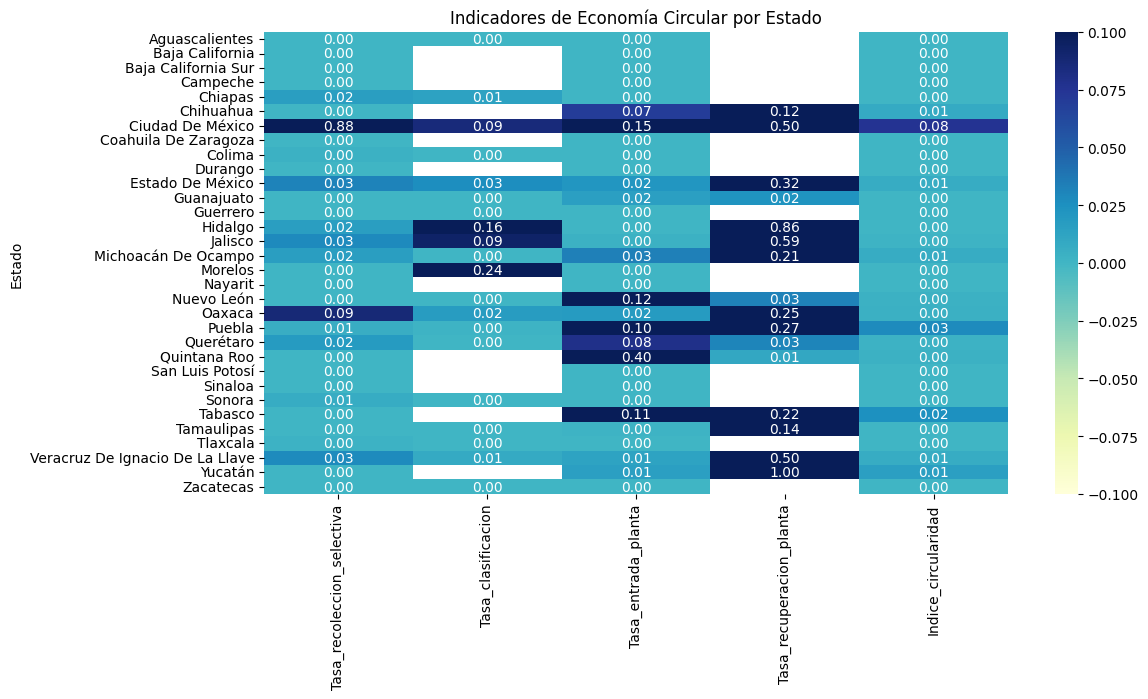

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

indicadores = ["Tasa_recoleccion_selectiva", "Tasa_clasificacion", "Tasa_entrada_planta", "Tasa_recuperacion_planta", "Indice_circularidad"]
plt.figure(figsize=(12, 6))
sns.heatmap(df.set_index("Estado")[indicadores], cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Indicadores de Economía Circular por Estado")
plt.savefig("16heatmap recoleccion selectiva.png")
plt.show()


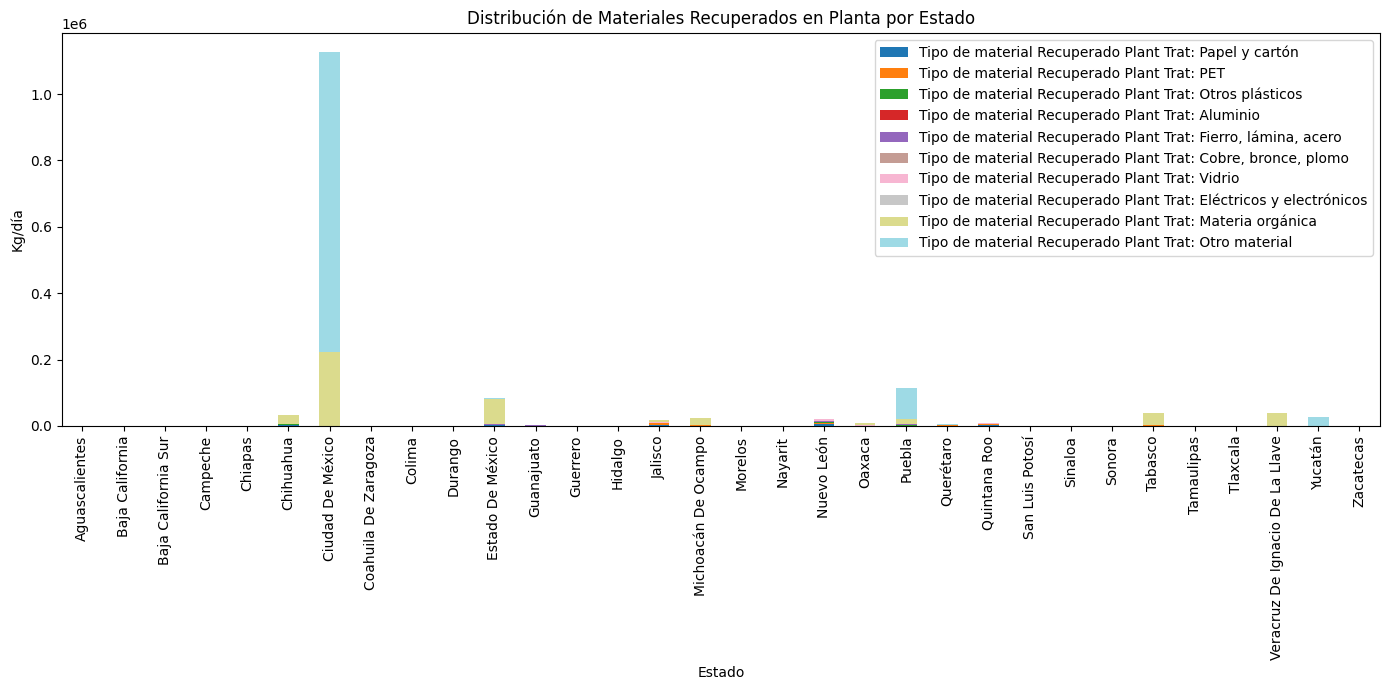

In [ ]:
materiales_recuperados = [
    "Tipo de material Recuperado Plant Trat: Papel y cartón",
    "Tipo de material Recuperado Plant Trat: PET",
    "Tipo de material Recuperado Plant Trat: Otros plásticos",
    "Tipo de material Recuperado Plant Trat: Aluminio",
    "Tipo de material Recuperado Plant Trat: Fierro, lámina, acero",
    "Tipo de material Recuperado Plant Trat: Cobre, bronce, plomo",
    "Tipo de material Recuperado Plant Trat: Vidrio",
    "Tipo de material Recuperado Plant Trat: Eléctricos y electrónicos",
    "Tipo de material Recuperado Plant Trat: Materia orgánica",
    "Tipo de material Recuperado Plant Trat: Otro material",
]

df_materiales = df[["Estado"] + materiales_recuperados].set_index("Estado")
df_materiales.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab20")
plt.title("Distribución de Materiales Recuperados en Planta por Estado")
plt.ylabel("Kg/día")
plt.xlabel("Estado")
plt.tight_layout()
plt.savefig("17barras apiladas recoleccion selectiva.png")
plt.show()


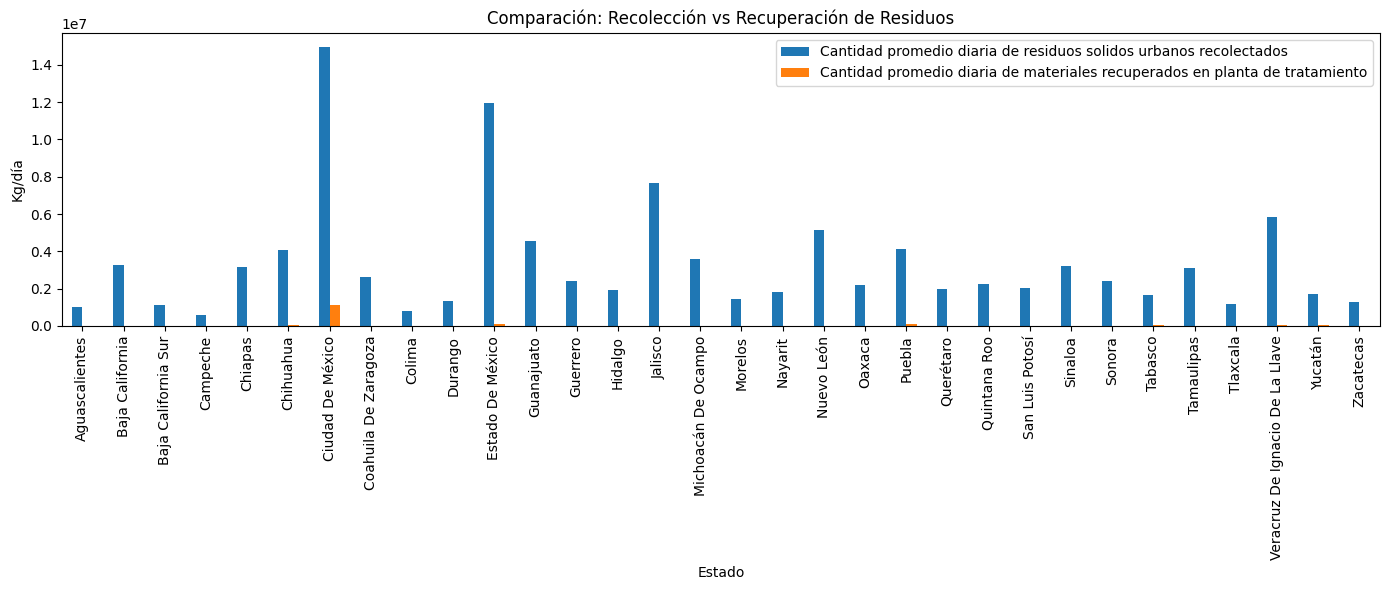

In [ ]:
df.plot(
    x="Estado",
    y=[
        "Cantidad promedio diaria de residuos solidos urbanos recolectados",
        "Cantidad promedio diaria de materiales recuperados en planta de tratamiento"
    ],
    kind="bar",
    figsize=(14, 6)
)
plt.title("Comparación: Recolección vs Recuperación de Residuos")
plt.ylabel("Kg/día")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("18barras apiladas recoleccion selectiva.png")
plt.show()
